# ELECTION PREDICTION PROJECT

#NAME: SHREYAS CHATE 
#EMAIL: chateshreyas231@gmail.com
#BATCH: VSML02 
#CLASS 4: MACHINE LEARNING 5TH JUNE TO 5TH JULY 2020



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

df=pd.read_csv('election.csv')
df.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+          318665   
2  Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+          314057   
3                          NaN                          NaN           13030   
4  Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [2]:
df.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [4]:
df.describe()

WINNER          AGE  GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
count  2263.000000  2018.000000    2.263000e+03    2263.000000  2.263000e+03   
mean      0.238179    52.273538    2.615991e+05     990.710561  2.625898e+05   
std       0.426064    11.869373    2.549906e+05    1602.839174  2.559822e+05   
min       0.000000    25.000000    1.339000e+03       0.000000  1.342000e+03   
25%       0.000000    43.250000    2.103450e+04      57.000000  2.116250e+04   
50%       0.000000    52.000000    1.539340e+05     316.000000  1.544890e+05   
75%       0.000000    61.000000    4.858040e+05    1385.000000  4.872315e+05   
max       1.000000    86.000000    1.066824e+06   19367.000000  1.068569e+06   

       OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
count                            2263.000000   
mean                               15.811412   
std                                14.962861   
min                                 0.097941   
25%                                 1.296518   
50%                                10.510553   
75%                                29.468185   
max                                51.951012   

       OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
count                                2263.000000    2.263000e+03  
mean                                   23.190525    1.658016e+06  
std                                    21.564758    3.145187e+05  
min                                     1.000039    5.518900e+04  
25%                                     1.899502    1.530014e+06  
50%                                    16.221721    1.679030e+06  
75%                                    42.590233    1.816857e+06  
max                                    74.411856    3.150313e+06

In [5]:
#DROPPING UNNECESSARY COLUMNS

#we have name of party so symbol of party is not so important
#also gender,category and age does'nt matter in the elections
#criminal cases is not shown while people vote in voting system, 
#also there are poeple with higher criminal cases and are still won the election ,so keeping that column will lower the quality of dataset
#Also Assets and Liabilities are not essentia for prediction of the winner in election

df=df.drop(["SYMBOL","GENDER","CRIMINAL\nCASES","AGE","CATEGORY","EDUCATION","ASSETS","LIABILITIES"],axis=1)

In [6]:
df.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   
3      Telangana     ADILABAD                   NOTA       0  NOTA   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP   

   GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
0          376892            482        377374   
1          318665            149        318814   
2          314057            181        314238   
3           13030              6         13036   
4          644459           2416        646875   

   OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0                              25.330684   
1                              21.399929   
2                              21.092771   
3                               0.875023   
4                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [7]:
df.describe()

WINNER  GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
count  2263.000000    2.263000e+03    2263.000000  2.263000e+03   
mean      0.238179    2.615991e+05     990.710561  2.625898e+05   
std       0.426064    2.549906e+05    1602.839174  2.559822e+05   
min       0.000000    1.339000e+03       0.000000  1.342000e+03   
25%       0.000000    2.103450e+04      57.000000  2.116250e+04   
50%       0.000000    1.539340e+05     316.000000  1.544890e+05   
75%       0.000000    4.858040e+05    1385.000000  4.872315e+05   
max       1.000000    1.066824e+06   19367.000000  1.068569e+06   

       OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
count                            2263.000000   
mean                               15.811412   
std                                14.962861   
min                                 0.097941   
25%                                 1.296518   
50%                                10.510553   
75%                                29.468185   
max                                51.951012   

       OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
count                                2263.000000    2.263000e+03  
mean                                   23.190525    1.658016e+06  
std                                    21.564758    3.145187e+05  
min                                     1.000039    5.518900e+04  
25%                                     1.899502    1.530014e+06  
50%                                    16.221721    1.679030e+06  
75%                                    42.590233    1.816857e+06  
max                                    74.411856    3.150313e+06

In [8]:
#seperating inputs and outputs 
X=df.drop('WINNER',axis=1)
y=df['WINNER']

In [9]:
X.head()

STATE CONSTITUENCY                   NAME PARTY  GENERAL\nVOTES  \
0      Telangana     ADILABAD         SOYAM BAPU RAO   BJP          376892   
1      Telangana     ADILABAD           Godam Nagesh   TRS          318665   
2      Telangana     ADILABAD          RATHOD RAMESH   INC          314057   
3      Telangana     ADILABAD                   NOTA  NOTA           13030   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel   BJP          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

In [10]:
df.info()

#Using LabelEncoder for converting categorical columns to numerical form
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   GENERAL
VOTES                             2263 non-null   int64  
 6   POSTAL
VOTES                              2263 non-null   int64  
 7   TOTAL
VOTES                               2263 non-null   int64  
 8   OVER TOTAL ELECTORS 
IN CONSTITUENCY      2263 non-null   float64
 9   OVER TOTAL VOTES POLLED 
IN CONSTITUENCY  2263 non-null   float64
 10  TOTAL ELECTORS                      

In [11]:
#Training of Model  
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#Applying Standard Scaler to Normalize Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
#Applying Logistic Regression Algorithm to Train the Model
from sklearn.linear_model import LogisticRegression
my_model_0 = LogisticRegression()
result_0 = my_model_0.fit(X_train, y_train)
predictions_0 = result_0.predict(X_test)

In [14]:
#Applying Decision Tree Classifier to Train the Model
from sklearn.tree import DecisionTreeClassifier
my_model_1 = DecisionTreeClassifier(random_state=0)
result_1 = my_model_1.fit(X_train,y_train)
predictions_1 = result_1.predict(X_test)

In [15]:
#Applying Random Forest Classifier to Train the Model
from sklearn.ensemble import RandomForestClassifier
my_model_2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result_2=my_model_2.fit(X_train, y_train)
predictions_2 = result_2.predict(X_test)

In [16]:
#Applying SVC to Train the Model
from sklearn.svm import SVC
my_model_3 = SVC(kernel = 'rbf', random_state = 0)
result_3 = my_model_3.fit(X_train, y_train)
predictions_3 = result_3.predict(X_test)

In [17]:
#Applying K Neighbors Classifiers to Train the Model
from sklearn.neighbors import KNeighborsClassifier
my_model_4 = KNeighborsClassifier(n_neighbors = 3)
result_4 = my_model_4.fit(X_train,y_train)
predictions_4= result_4.predict(X_test)

In [18]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,accuracy_score

Acc_Err=[[metrics.accuracy_score(y_test, predictions_0),mean_absolute_error(y_test, predictions_0)],
    [metrics.accuracy_score(y_test, predictions_1),mean_absolute_error(y_test, predictions_1)],
           [metrics.accuracy_score(y_test, predictions_2),mean_absolute_error(y_test, predictions_2)],
           [metrics.accuracy_score(y_test, predictions_3),mean_absolute_error(y_test, predictions_3)],
           [metrics.accuracy_score(y_test, predictions_4),mean_absolute_error(y_test, predictions_4)]]
df_1=pd.DataFrame(Acc_Err,index=['Logistic reg','Decision tree','Random Forest','SVM ','KNN '],
                  columns=['ACCURACY SCORE','ERROR SCORE'])
print(df_1)

               ACCURACY SCORE  ERROR SCORE
Logistic reg         0.962472     0.037528
Decision tree        0.944812     0.055188
Random Forest        0.964680     0.035320
SVM                  0.951435     0.048565
KNN                  0.935982     0.064018


In [19]:
df_1

ACCURACY SCORE  ERROR SCORE
Logistic reg         0.962472     0.037528
Decision tree        0.944812     0.055188
Random Forest        0.964680     0.035320
SVM                  0.951435     0.048565
KNN                  0.935982     0.064018

In [20]:
print("CLASSIFICATION REPORT ARE AS FOLLOWS:\n",
       100*"=","\n\t \t\tLOGISTIC REGRESSION:\n\n",metrics.classification_report(y_test,predictions_0),
       100*"=","\n\n\t \t\tDECSION TREE CLASSIFIER:\n\n",metrics.classification_report(y_test,predictions_1),
       100*"=","\n\t \t\tRANDOM FOREST TREE:\n\n",metrics.classification_report(y_test,predictions_2),
       100*"=","T\n\t \t\tSVM:\n\n",metrics.classification_report(y_test,predictions_3),
       100*"=","\n\t \t\tKNN:\n\n",metrics.classification_report(y_test,predictions_4))

CLASSIFICATION REPORT ARE AS FOLLOWS:
	 		LOGISTIC REGRESSION:

               precision    recall  f1-score   support

           0       0.99      0.96      0.98       359
           1       0.87      0.96      0.91        94

    accuracy                           0.96       453
   macro avg       0.93      0.96      0.94       453
weighted avg       0.96      0.96      0.96       453

	 		DECSION TREE CLASSIFIER:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96       359
           1       0.85      0.89      0.87        94

    accuracy                           0.94       453
   macro avg       0.91      0.93      0.92       453
weighted avg       0.95      0.94      0.95       453
	 		RANDOM FOREST TREE:

               precision    recall  f1-score   support

           0       0.98      0.97      0.98       359
           1       0.91      0.93      0.92        94

    accuracy                           0.96       453
   macr

		< < < < CONFUSION MATRIX FOR LOGISTIC REGRESSION > > > > >
 ****************************************************************************************************


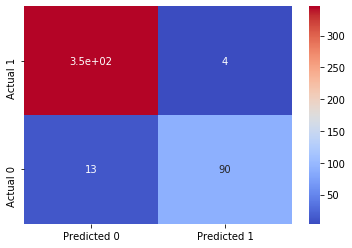

In [21]:
from sklearn.metrics import confusion_matrix
print("\t\t< < < < CONFUSION MATRIX FOR LOGISTIC REGRESSION > > > > >\n",100*'*')
conf_matrix_0 =confusion_matrix(predictions_0,y_test)
confusion_df_0 = pd.DataFrame(conf_matrix_0, index=['Actual 1','Actual 0'], columns=['Predicted 0','Predicted 1'])
sn.heatmap(confusion_df_0, cmap='coolwarm', annot=True)

			< < < < CONFUSION MATRIX FOR DECSION TREE CLASSIFIER > > > > >
 ****************************************************************************************************


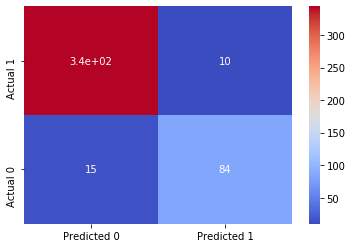

In [22]:
print("\t\t\t< < < < CONFUSION MATRIX FOR DECSION TREE CLASSIFIER > > > > >\n",100*'*')
conf_matrix_1 =confusion_matrix(predictions_1,y_test)
confusion_df_1 = pd.DataFrame(conf_matrix_1, index=['Actual 1','Actual 0'], columns=['Predicted 0','Predicted 1'])
sn.heatmap(confusion_df_1, cmap='coolwarm', annot=True)

			< < < < CONFUSION MATRIX FOR RANDOM FOREST TREE > > > > >
 ****************************************************************************************************


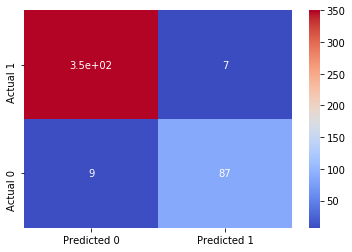

In [23]:
print("\t\t\t< < < < CONFUSION MATRIX FOR RANDOM FOREST TREE > > > > >\n",100*'*')
conf_matrix_2 =confusion_matrix(predictions_2,y_test)
confusion_df_2 = pd.DataFrame(conf_matrix_2, index=['Actual 1','Actual 0'], columns=['Predicted 0','Predicted 1'])
sn.heatmap(confusion_df_2, cmap='coolwarm', annot=True)

		< < < < CONFUSION MATRIX FOR SUPPORT VECTOR MACHINE > > > > >
 ****************************************************************************************************


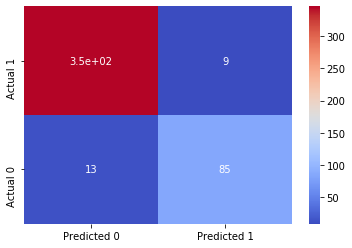

In [24]:
print("\t\t< < < < CONFUSION MATRIX FOR SUPPORT VECTOR MACHINE > > > > >\n",100*'*')
conf_matrix_3 =confusion_matrix(predictions_3,y_test)
confusion_df_3 = pd.DataFrame(conf_matrix_3, index=['Actual 1','Actual 0'], columns=['Predicted 0','Predicted 1'])
sn.heatmap(confusion_df_3, cmap='coolwarm', annot=True)

		< < < < CONFUSION MATRIX FOR K NEAREST NEIGHBOUR > > > > >
 ****************************************************************************************************


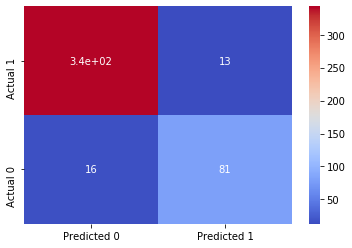

In [25]:
print("\t\t< < < < CONFUSION MATRIX FOR K NEAREST NEIGHBOUR > > > > >\n",100*'*')
conf_matrix_4 =confusion_matrix(predictions_4,y_test)
confusion_df_4 = pd.DataFrame(conf_matrix_4, index=['Actual 1','Actual 0'], columns=['Predicted 0','Predicted 1'])
sn.heatmap(confusion_df_4, cmap='coolwarm', annot=True)

In [26]:
print(100*"*",
        "\nFROM ALL THE ABOVE APPLIED ALGORITHMS THE MOST ACCURATE IS "
        "\n1.LOGISTIC REGRESSION"
        "\n2.RANDOM FOREST CLASSIFIER"
        "\nSO WE ARE GOING TO APPLY *** RANDOM FOREST CLASSIFIER *** FOR PREDICTION IN OUR MODEL FURTHER ")

**************************************************************************************************** 
FROM ALL THE ABOVE APPLIED ALGORITHMS THE MOST ACCURATE IS 
1.LOGISTIC REGRESSION
2.RANDOM FOREST CLASSIFIER
SO WE ARE GOING TO APPLY *** RANDOM FOREST CLASSIFIER *** FOR PREDICTION IN OUR MODEL FURTHER 


In [27]:
print("***** SOME VISUALISATIONS AND PROJECTIONS *****")

***** SOME VISUALISATIONS AND PROJECTIONS *****


*** BOX PLOT *** FOR A PARTICULAR STATE EX: UTTAR PRADESH OF EACH PARTY VS TOTAL VOTES


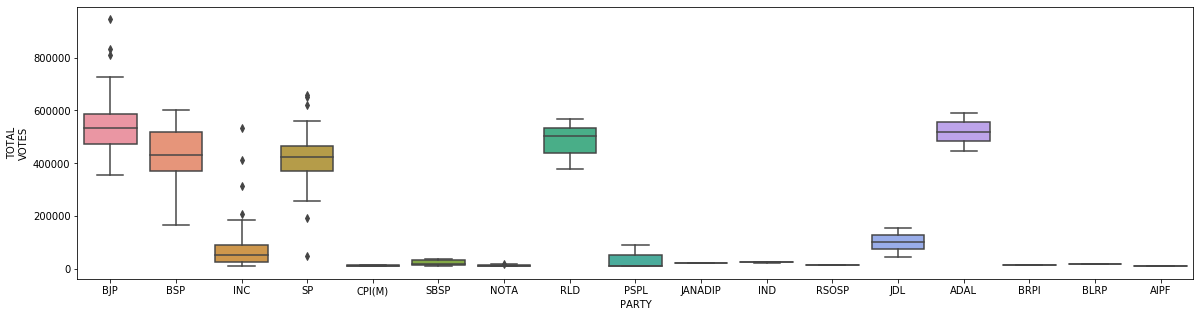

In [28]:
import seaborn as sns
print("*** BOX PLOT *** FOR A PARTICULAR STATE EX: UTTAR PRADESH OF EACH PARTY VS TOTAL VOTES")
plt.figure(figsize=(20,5))
sns.boxplot(x='PARTY',y='TOTAL\nVOTES',data=df[df['STATE']=='Uttar Pradesh'])

		\t		STATE COUNTS


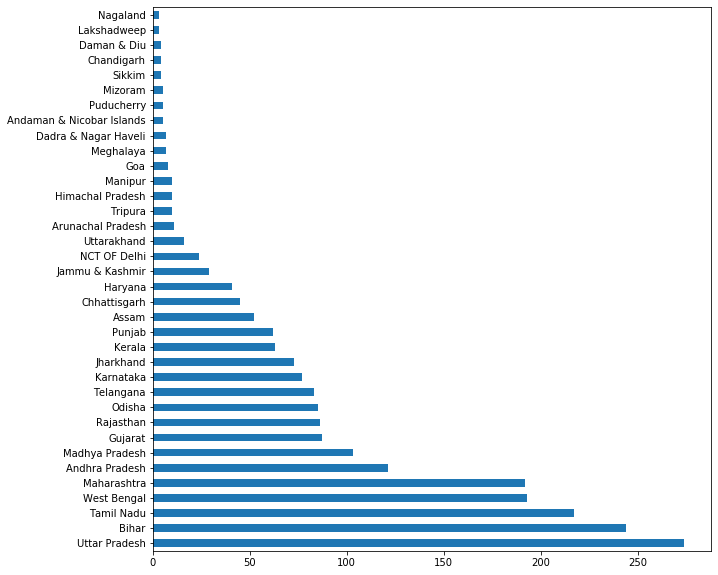

In [29]:
import matplotlib.pyplot as plt
print("\t\t\\t\t\tSTATE COUNTS")
df['STATE'].value_counts().plot(kind='barh', figsize=(10,10))

				VALUE COUNTS FOR THE PARTY IN FIRST 300 RECORDS


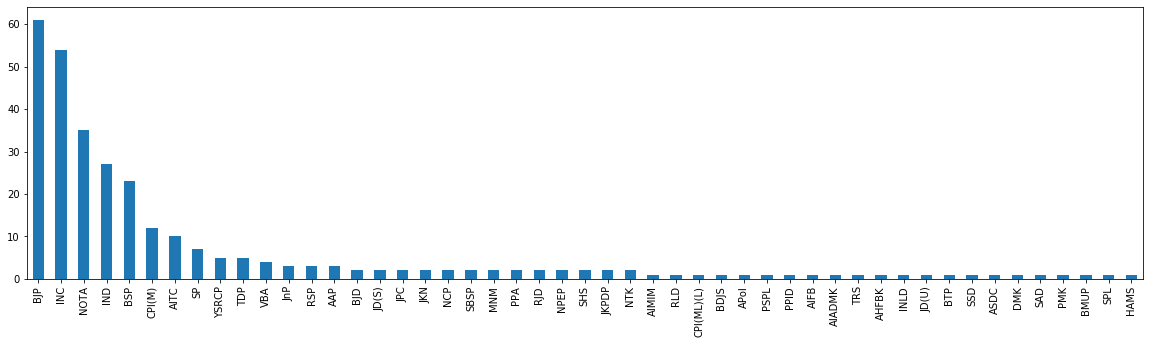

In [30]:
print("\t\t\t\tVALUE COUNTS FOR THE PARTY IN FIRST 300 RECORDS")
df['PARTY'][:300].value_counts().plot(kind='bar', figsize=(20,5))

				 ALL COUNTS FOR A PARTICULAR PARTY EX: BJP FOR FIRST 10 RECORDS


C:\Users\Shruti\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


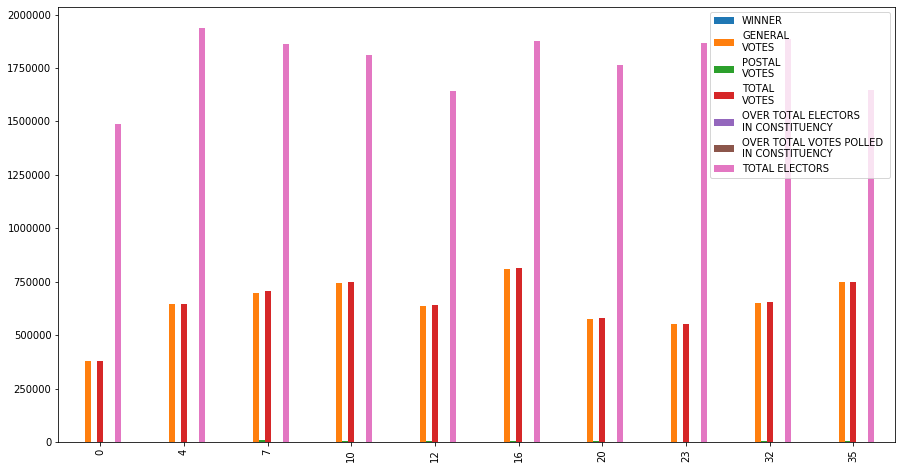

In [31]:
print("\t\t\t\t ALL COUNTS FOR A PARTICULAR PARTY EX: BJP FOR FIRST 10 RECORDS")
r=df.CONSTITUENCY
q=df[df.PARTY=='BJP'][df.WINNER==1]

q.head(10).plot(kind='bar', figsize=(15,8))

In [32]:
print("GIVE INPUTS ACCORING TO THIS SEQUENCE AS IT IS \n ***",X.columns,"***")
lst = [] 
n = 10
print("For Example: ['Maharashta', 'Pune', 'Supriya Sule', 'NCP', '15000', '13000', '28000', '20000', '30000', '50000']\n")
for i in range(0, n):
    ele = input()
    lst.append(ele) 

print(lst)
lst = Encoder_X.fit_transform(lst)
print("after transforming",lst)
pred_new=my_model_2.predict([lst])
pred_new

if pred_new == [0]:
    print("\n\n *** CAN'T WIN ***")
else:
    print('\n\n*** CAN WIN ***')

GIVE INPUTS ACCORING TO THIS SEQUENCE AS IT IS 
 *** Index(['STATE', 'CONSTITUENCY', 'NAME', 'PARTY', 'GENERAL\nVOTES',
       'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object') ***
For Example: ['Maharashta', 'Pune', 'Supriya Sule', 'NCP', '15000', '13000', '28000', '20000', '30000', '50000']

Madhya Pradesh
Chindwara
Sanjay Chate
NCP
4
10
14
53
64
117
['Madhya Pradesh', 'Chindwara', 'Sanjay Chate', 'NCP', '4', '10', '14', '53', '64', '117']
after transforming [7 6 9 8 3 0 2 4 5 1]


*** CAN WIN ***


# OUTPUT>>>>>>>>>

"""GIVE INPUTS ACCORING TO THIS SEQUENCE AS IT IS 
 *** Index(['STATE', 'CONSTITUENCY', 'NAME', 'PARTY', 'GENERAL\nVOTES',
       'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object') ***
For Example: ['Maharashta', 'Pune', 'Supriya Sule', 'NCP', '15000', '13000', '28000', '20000', '30000', '50000']

Maharashtra
Pune
Supriya Sule
NCP
15000
13000
28000
20000
30000
50000
['Maharashtra', 'Pune', 'Supriya Sule', 'NCP', '15000', '13000', '28000', '20000', '30000', '50000']
after transforming [6 8 9 7 1 0 3 2 4 5]
CAN WIN
"""

In [33]:
dff=df.groupby(['STATE'[:300],'PARTY'])

C:\Users\Shruti\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


STATE                      PARTY  
Andaman & Nicobar Islands  AAP        AxesSubplot(0.125,0.125;0.775x0.755)
                           BJP        AxesSubplot(0.125,0.125;0.775x0.755)
                           BSP        AxesSubplot(0.125,0.125;0.775x0.755)
                           INC        AxesSubplot(0.125,0.125;0.775x0.755)
                           IND        AxesSubplot(0.125,0.125;0.775x0.755)
                                                      ...                 
West Bengal                NOTA       AxesSubplot(0.125,0.125;0.775x0.755)
                           RSP        AxesSubplot(0.125,0.125;0.775x0.755)
                           RVNP       AxesSubplot(0.125,0.125;0.775x0.755)
                           SUCI(C)    AxesSubplot(0.125,0.125;0.775x0.755)
                           WPOI       AxesSubplot(0.125,0.125;0.775x0.755)
Length: 328, dtype: object

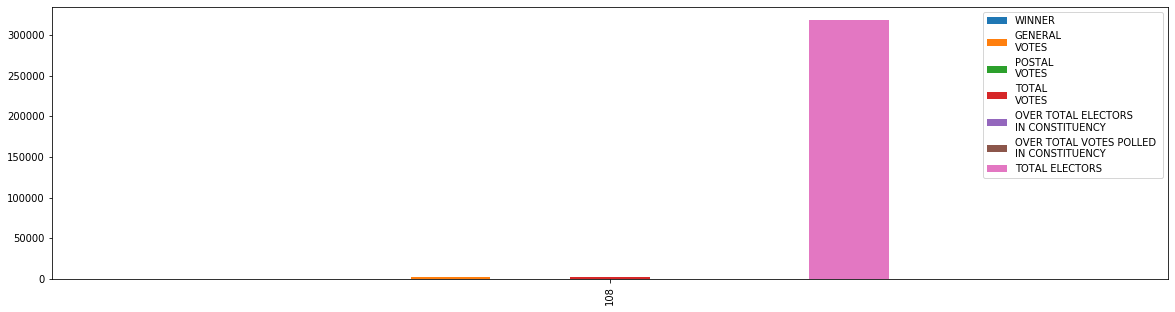

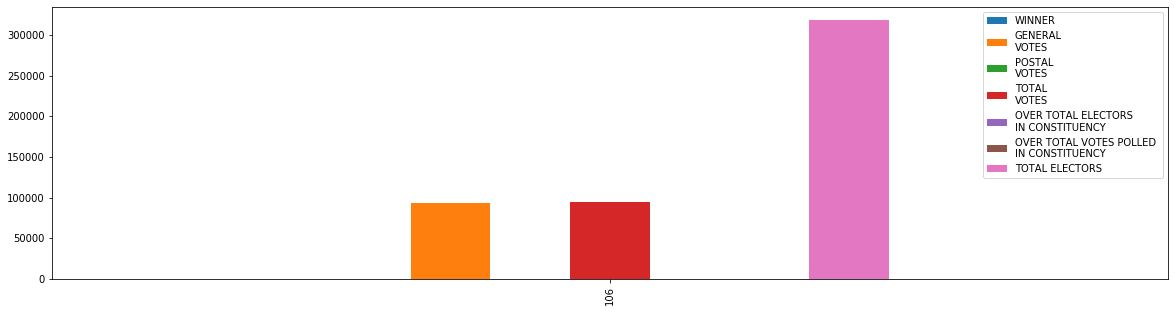

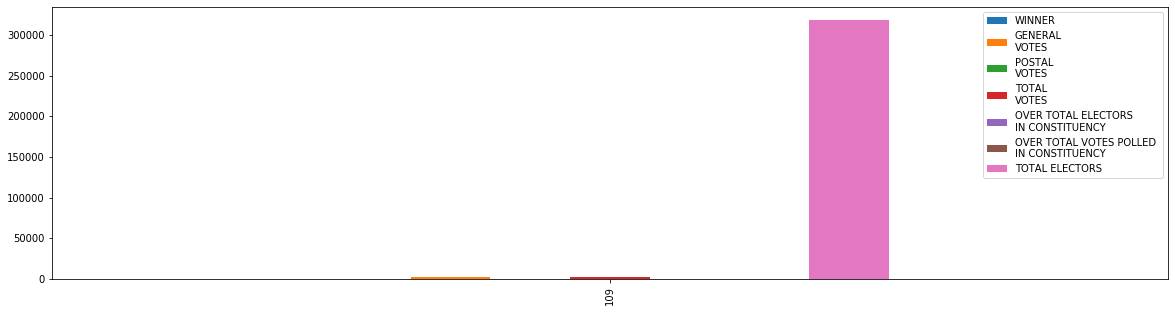

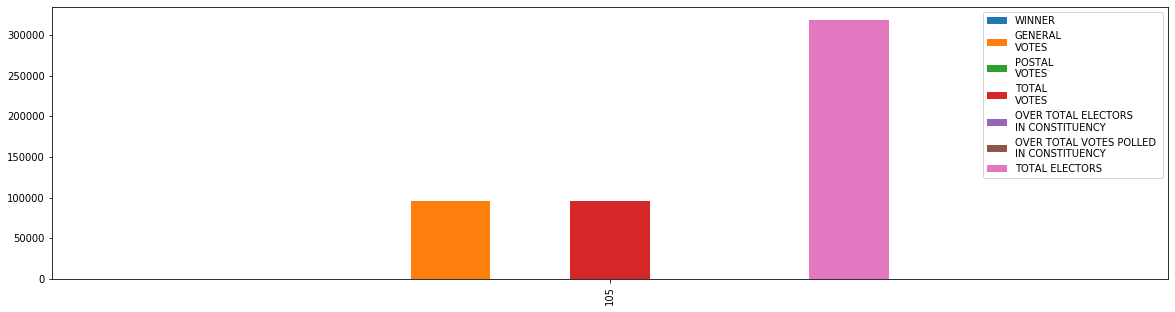

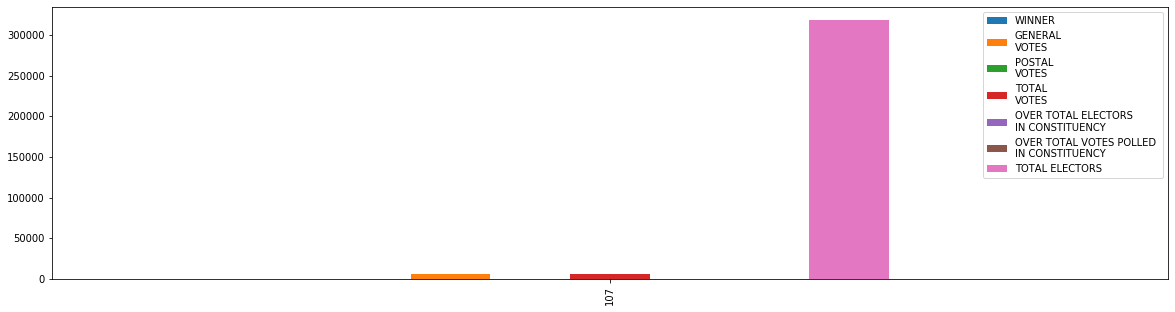

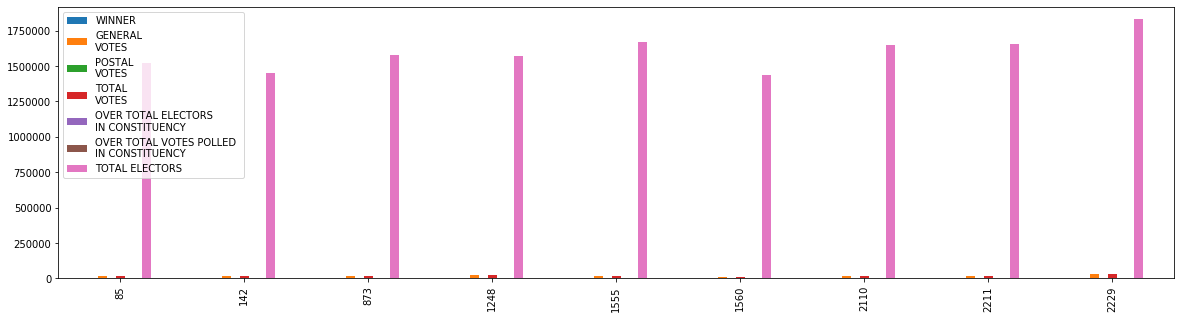

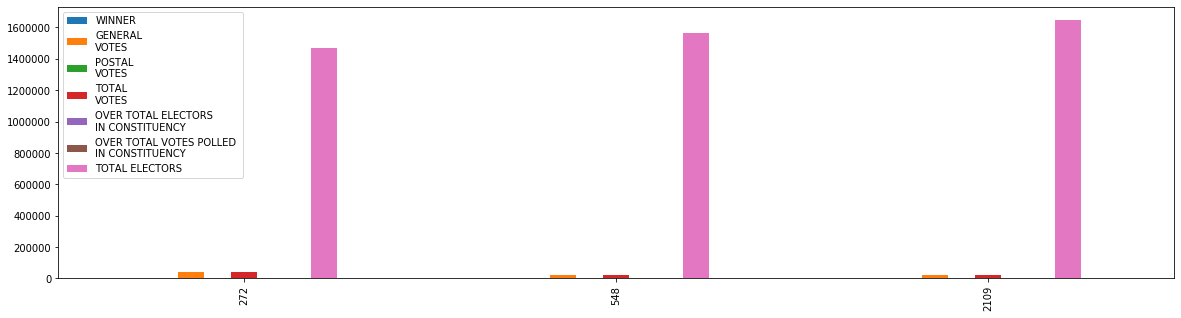

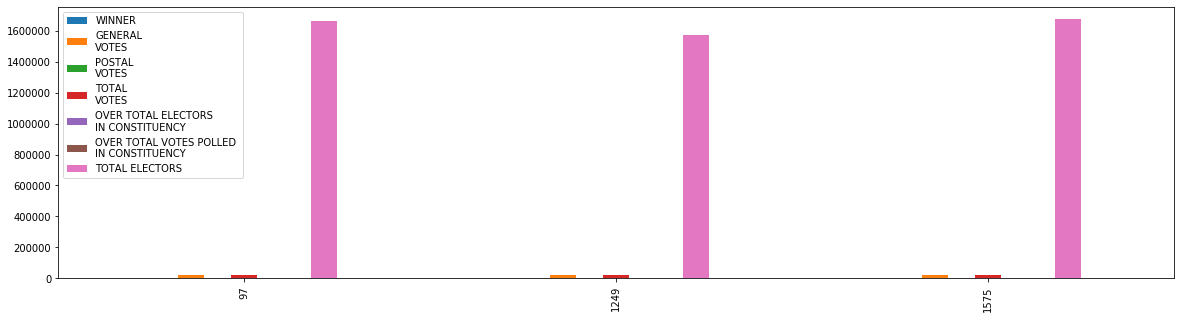

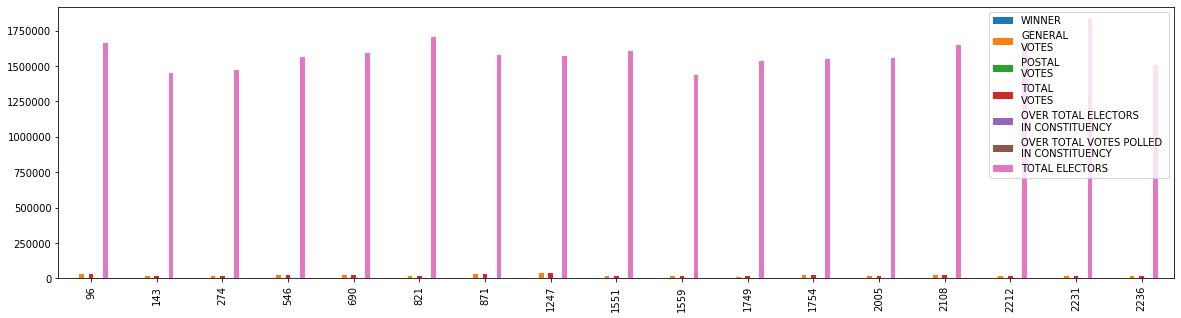

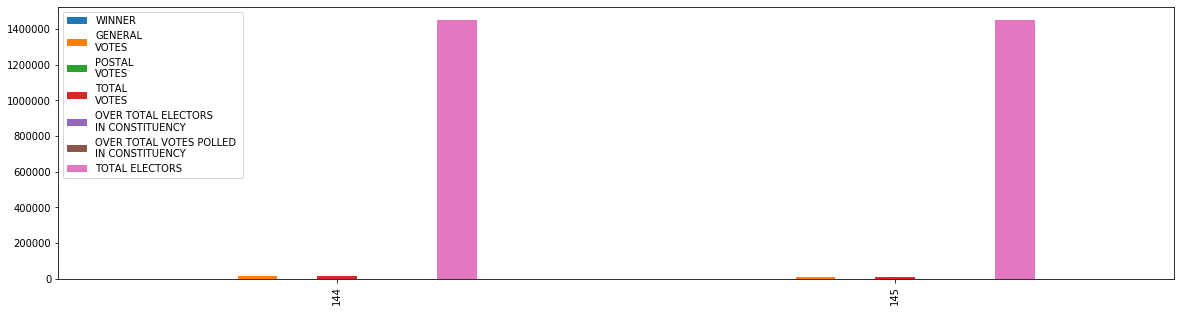

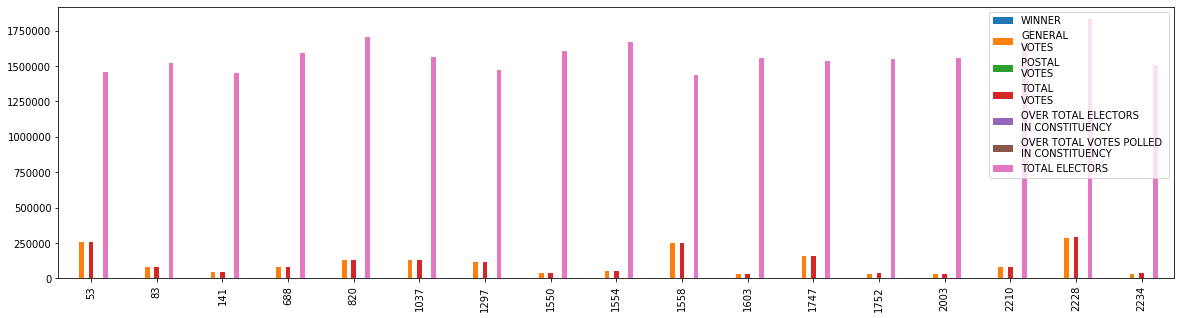

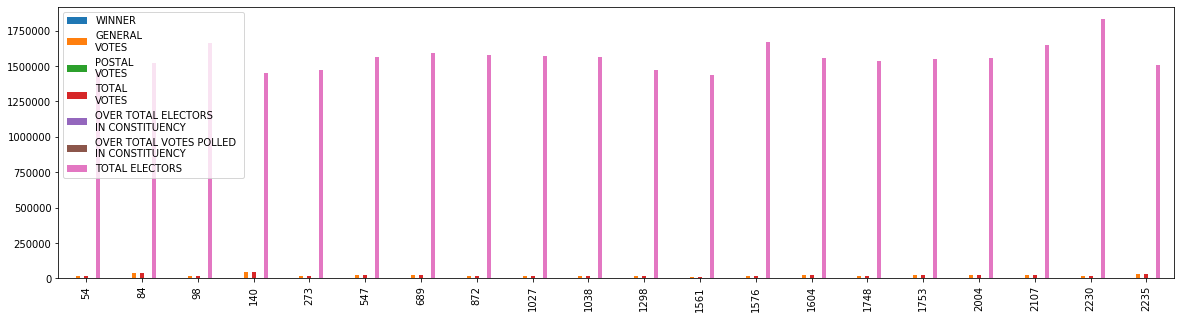

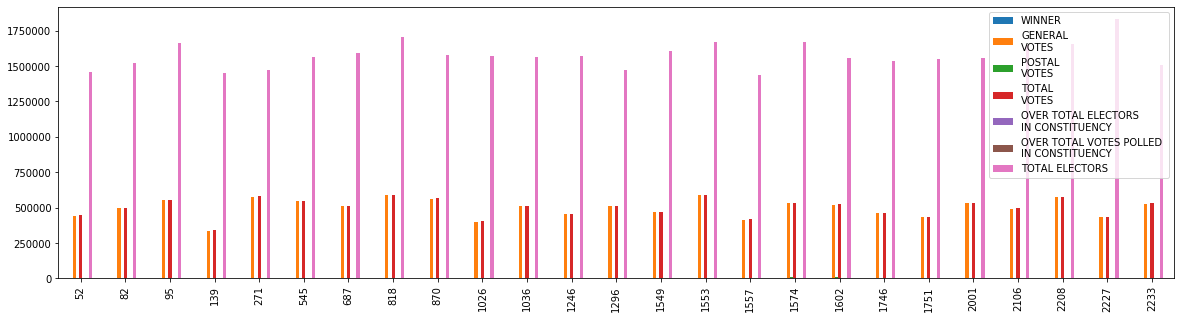

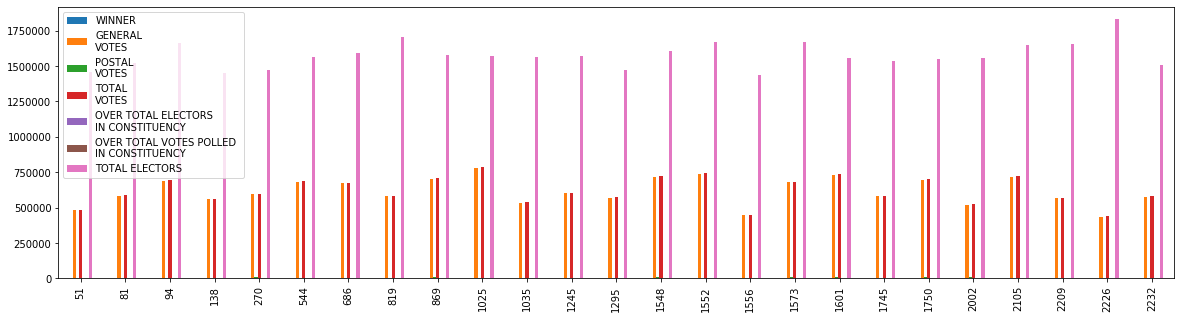

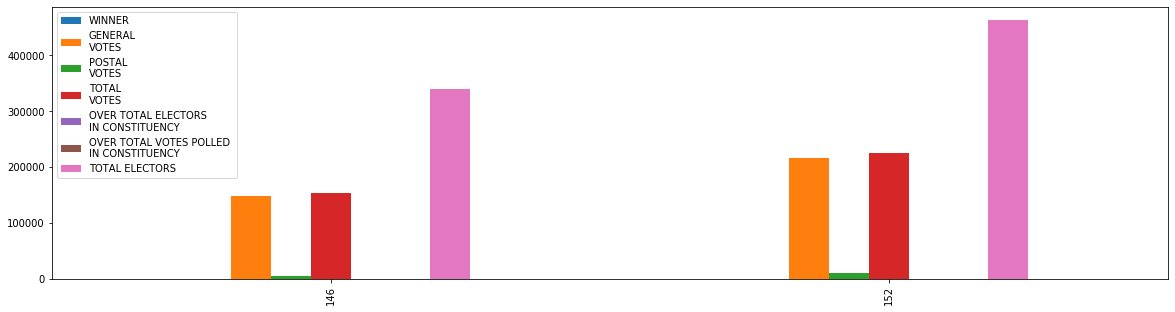

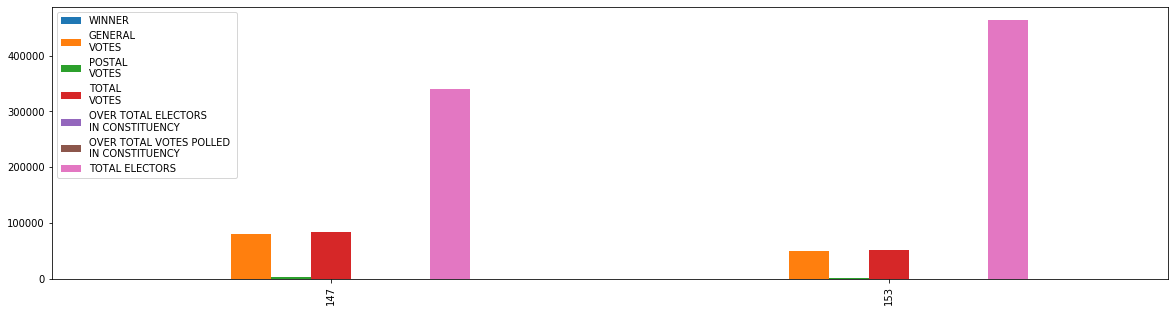

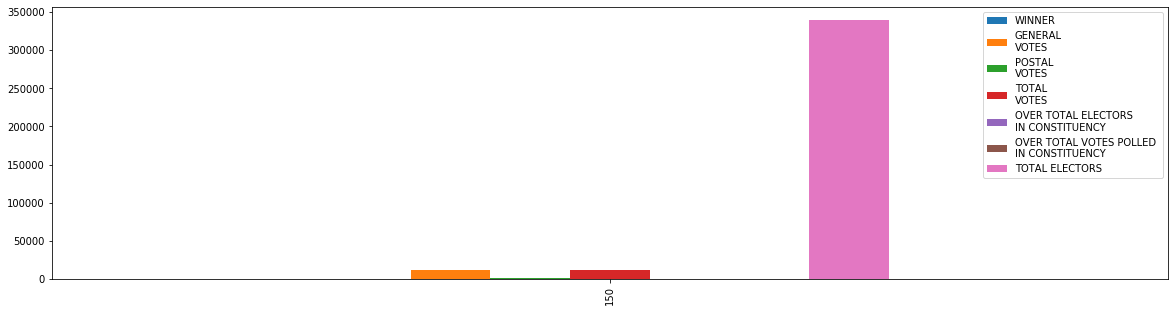

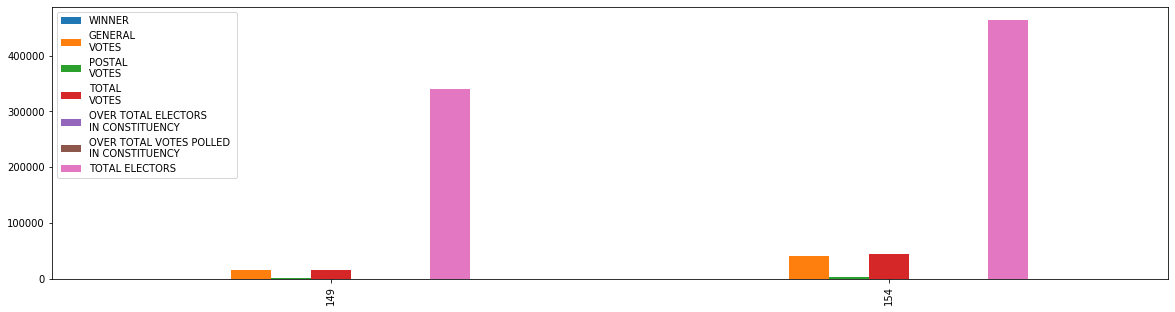

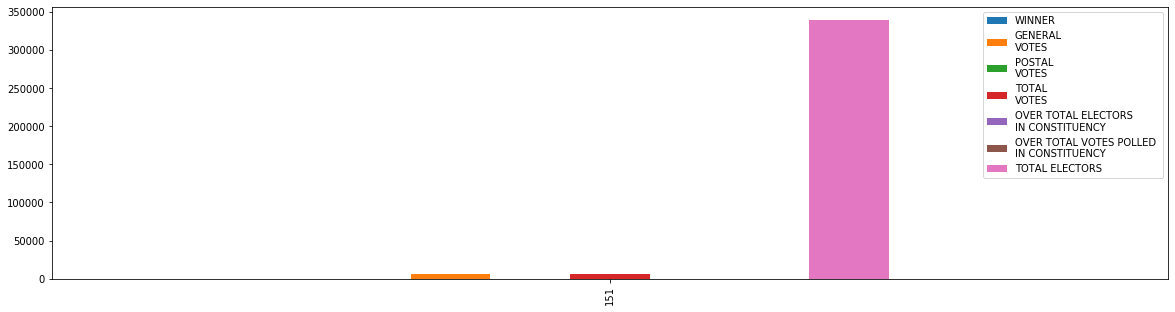

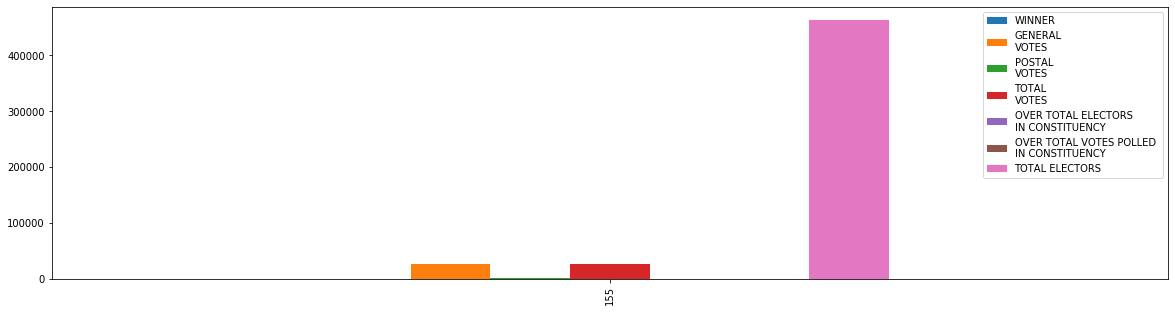

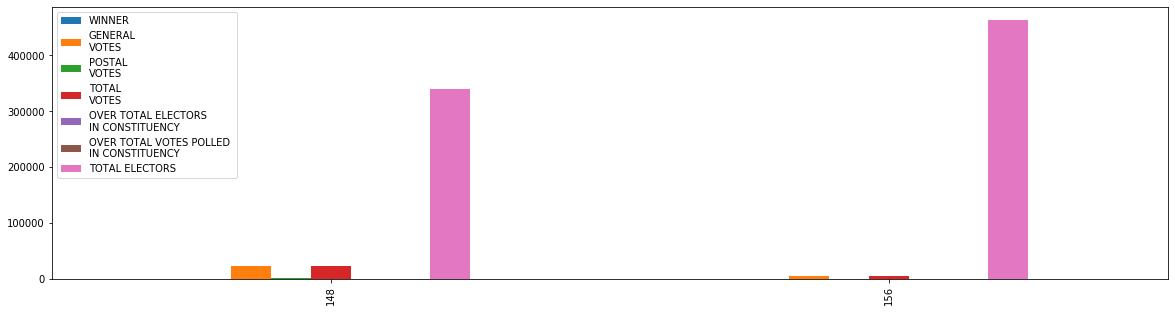

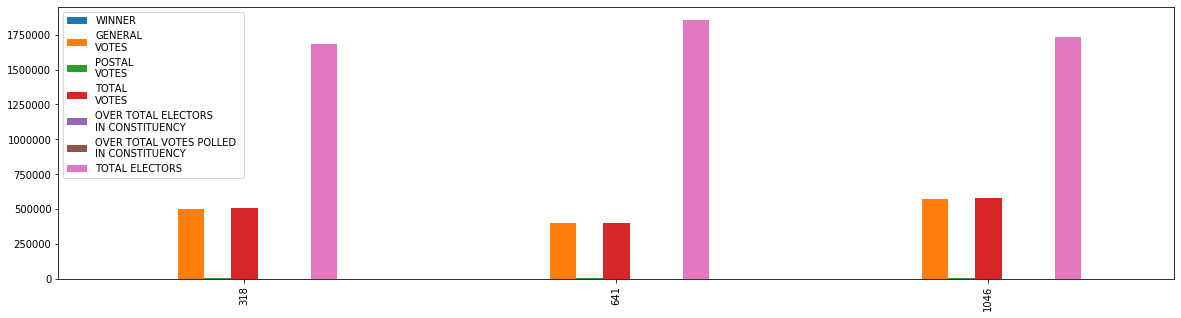

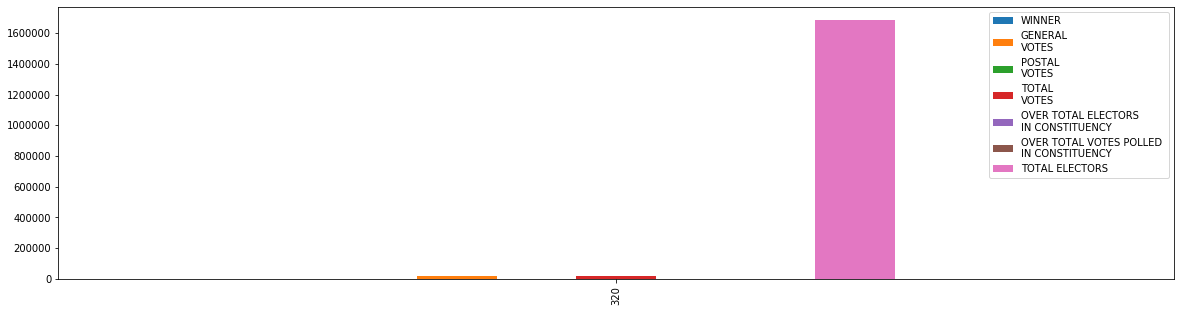

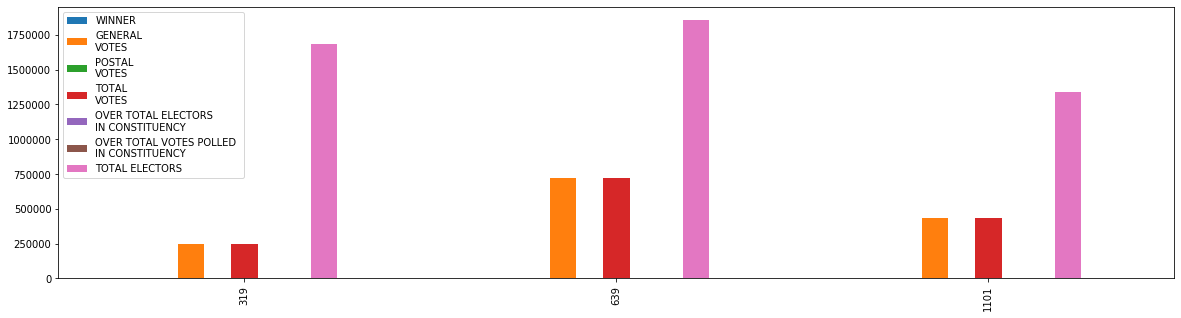

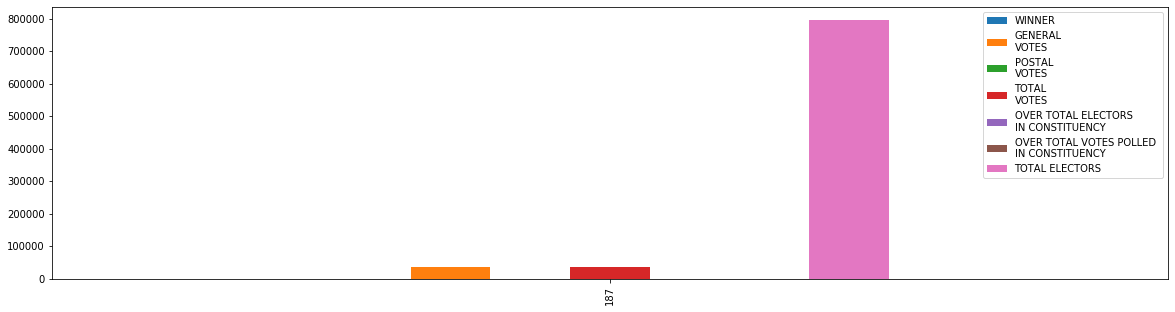

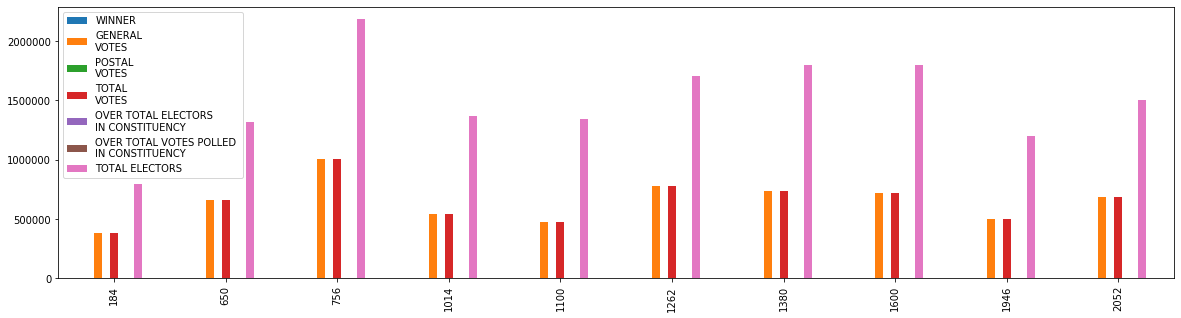

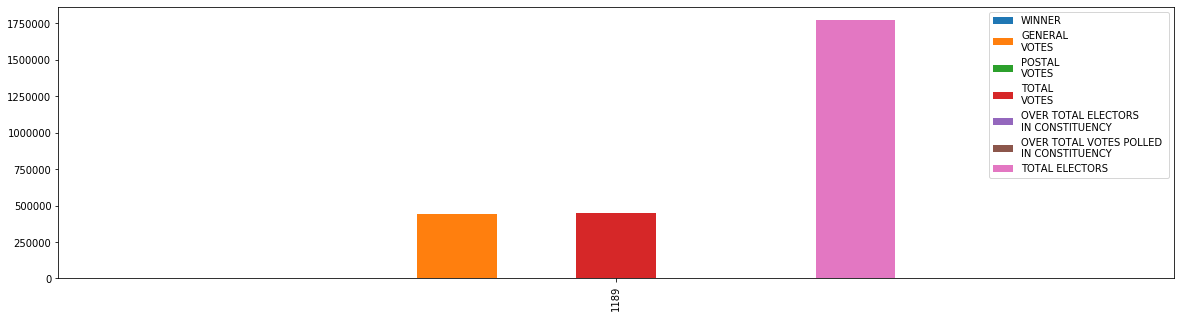

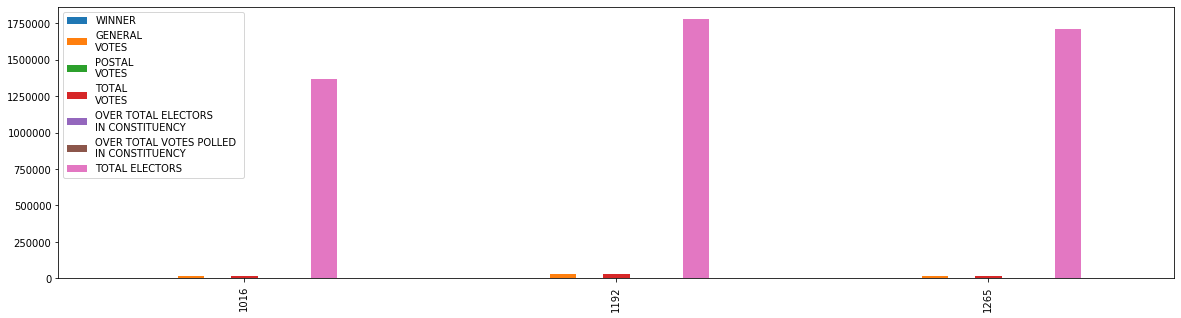

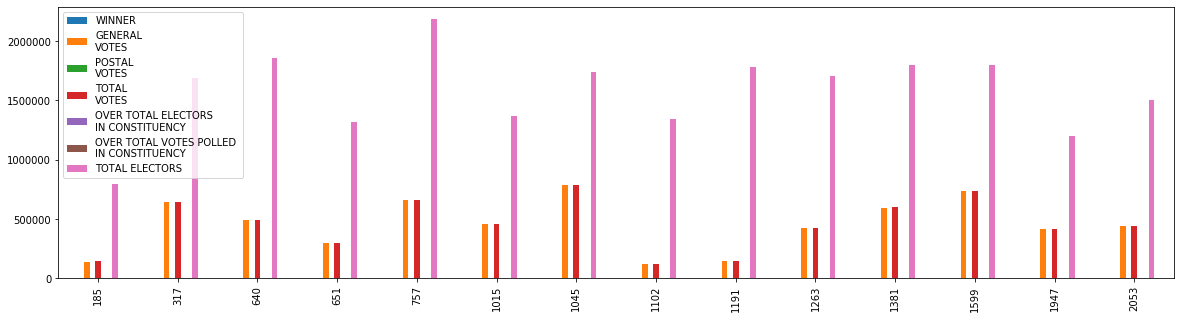

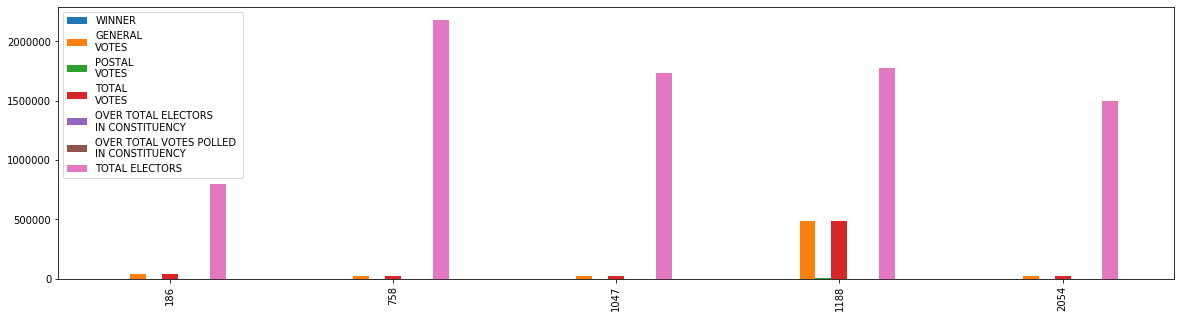

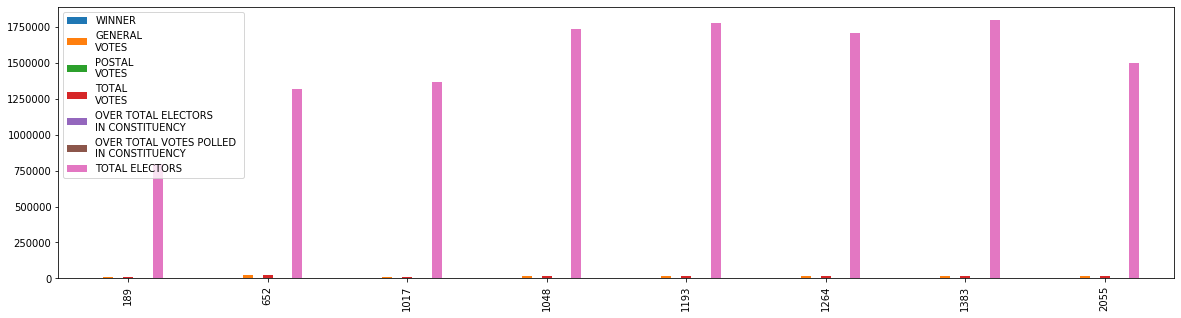

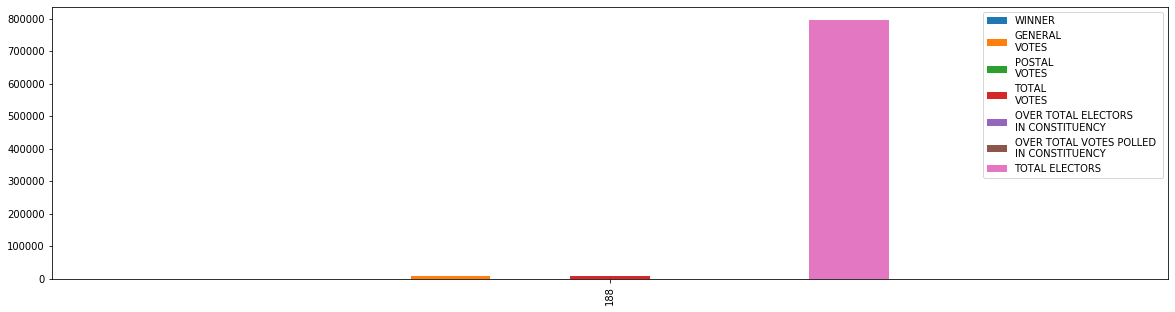

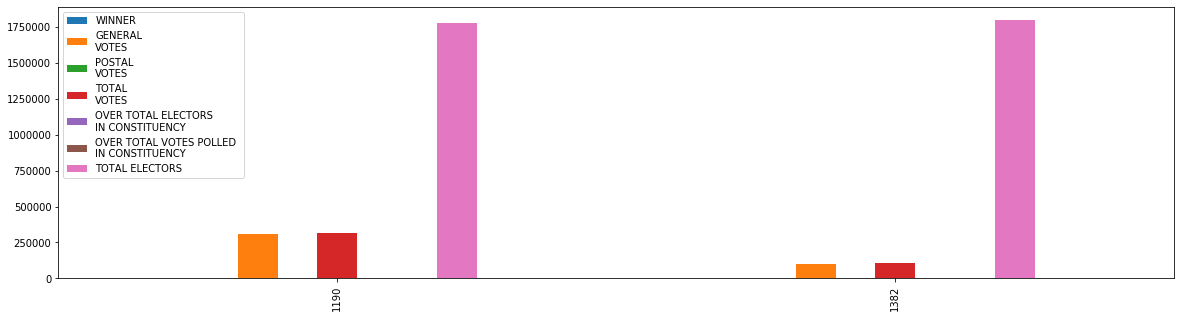

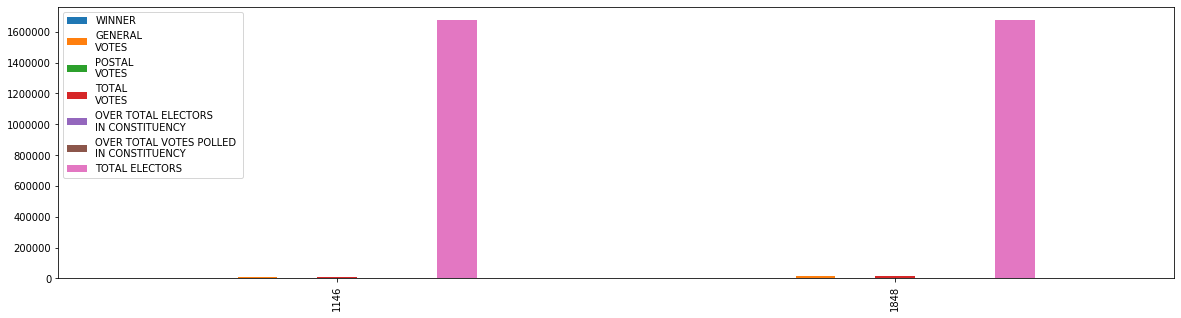

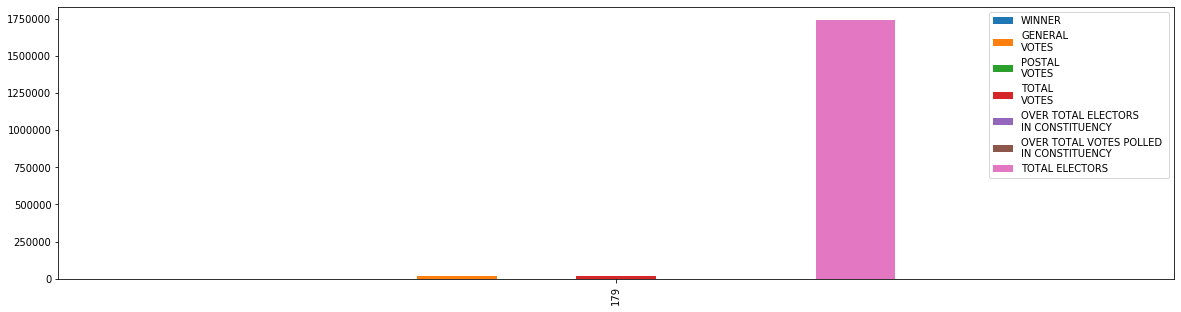

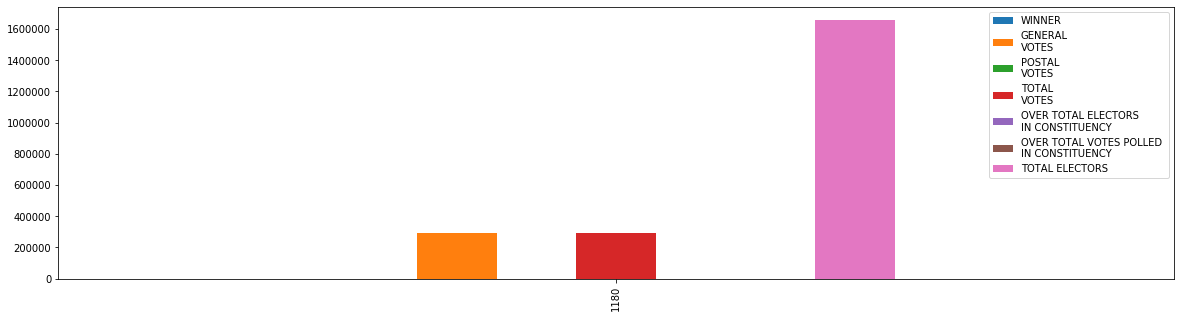

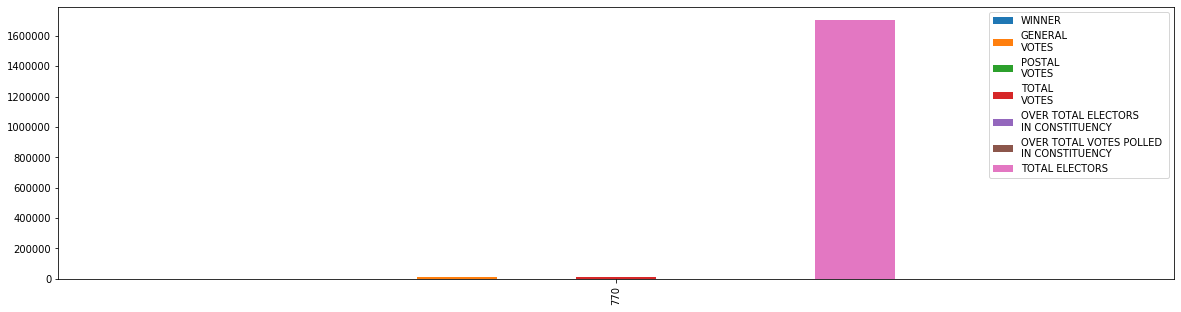

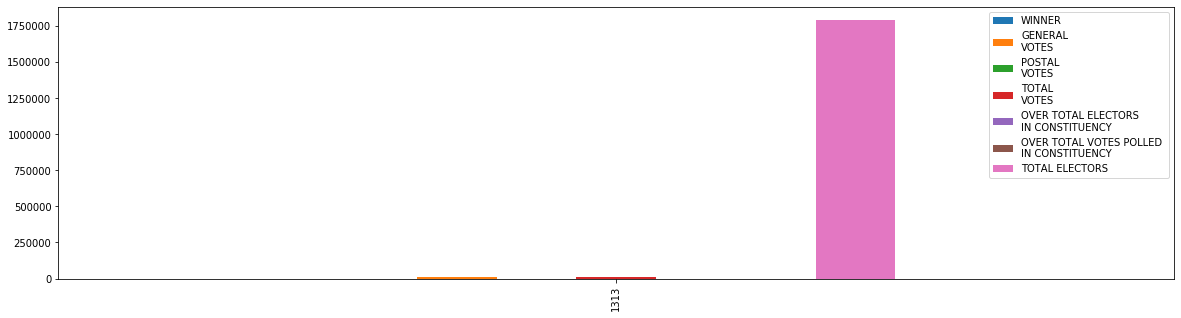

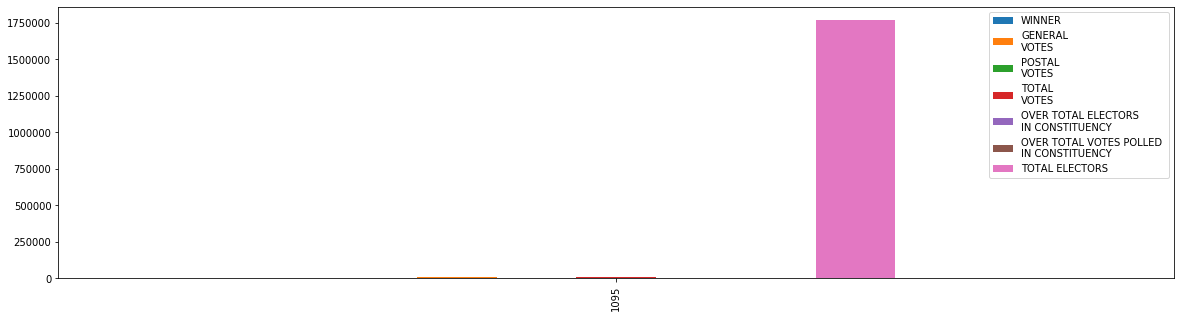

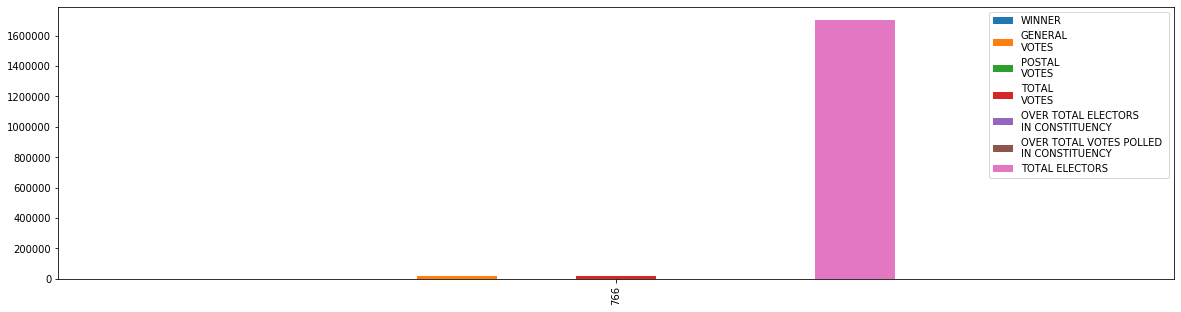

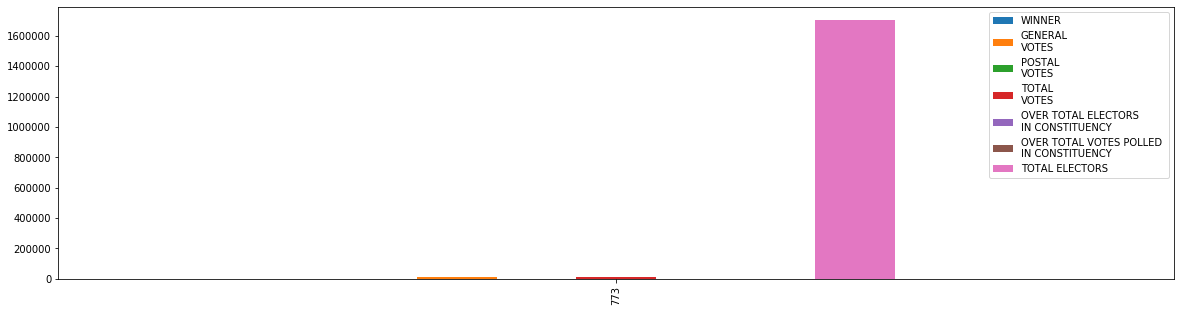

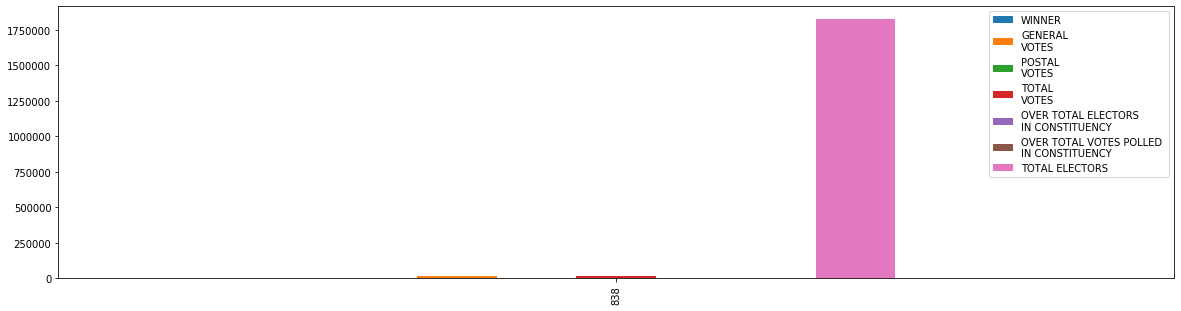

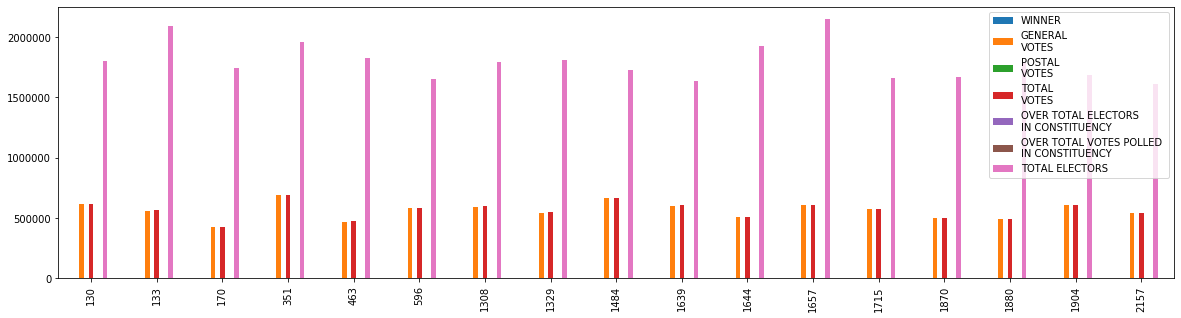

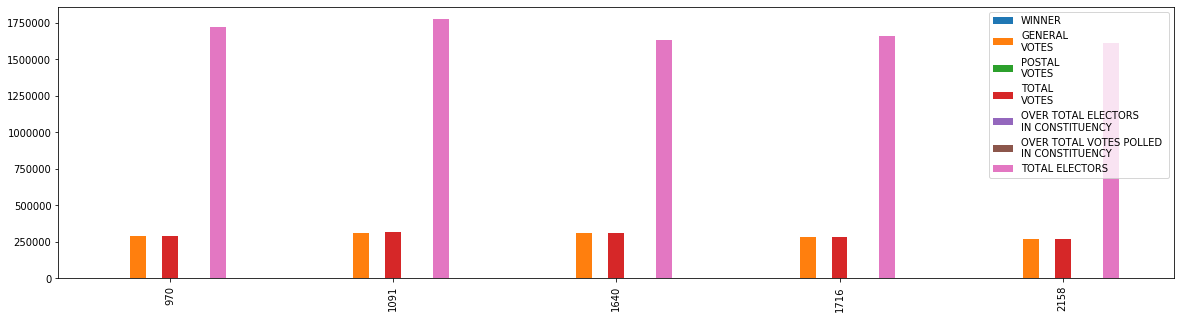

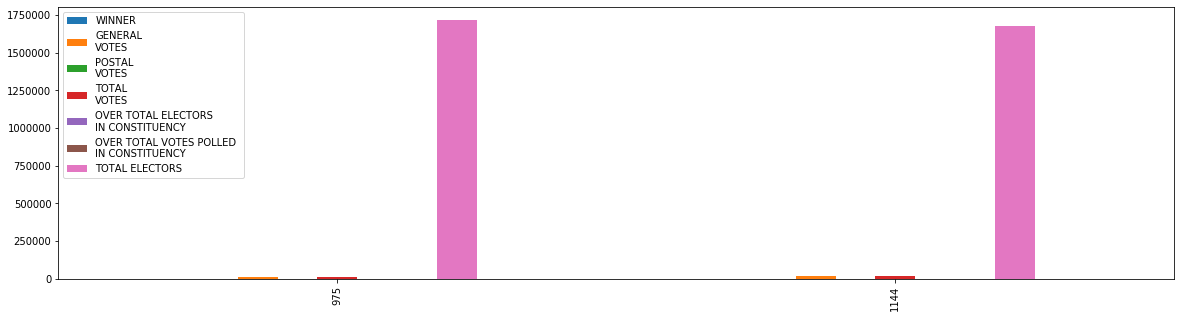

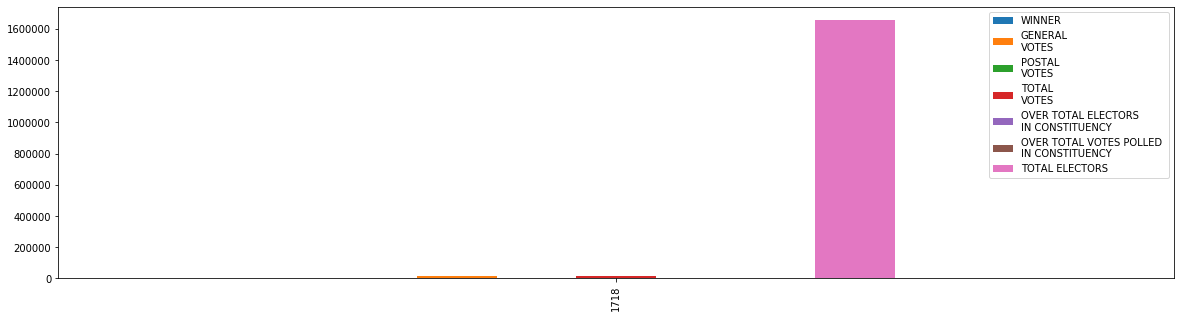

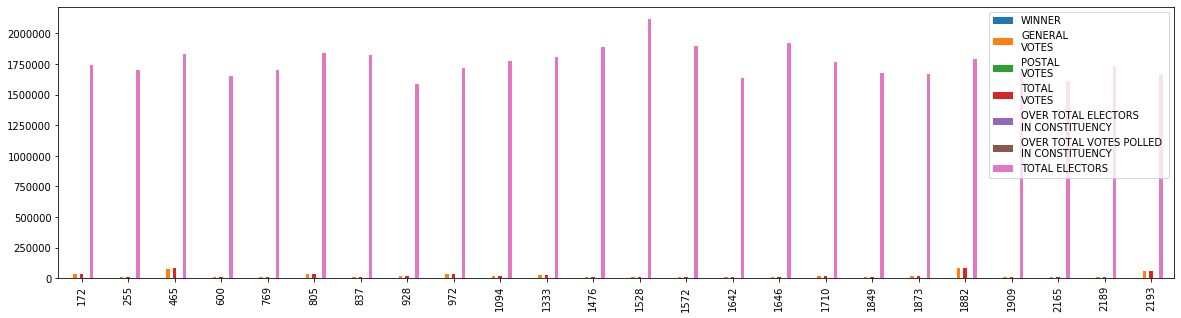

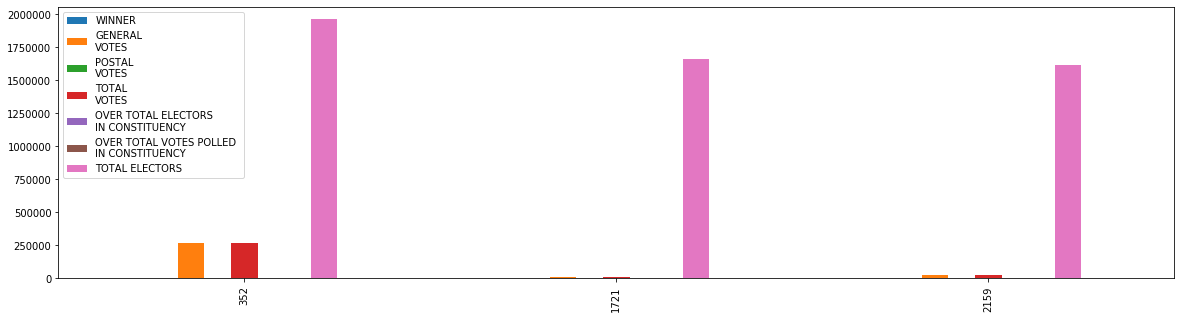

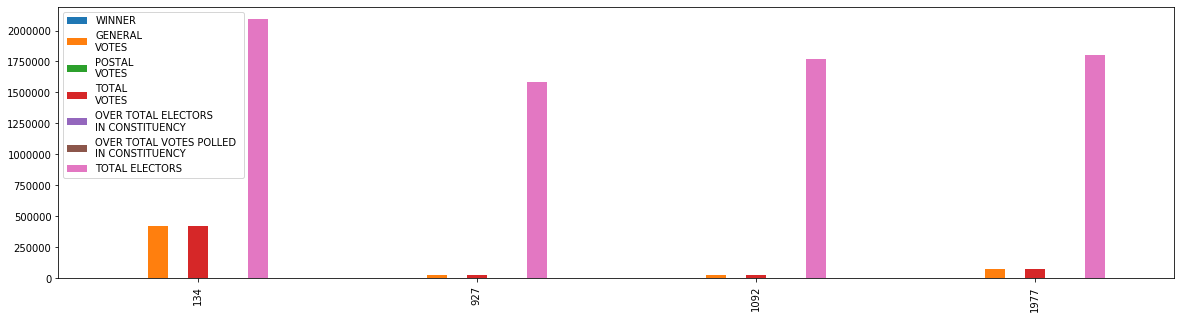

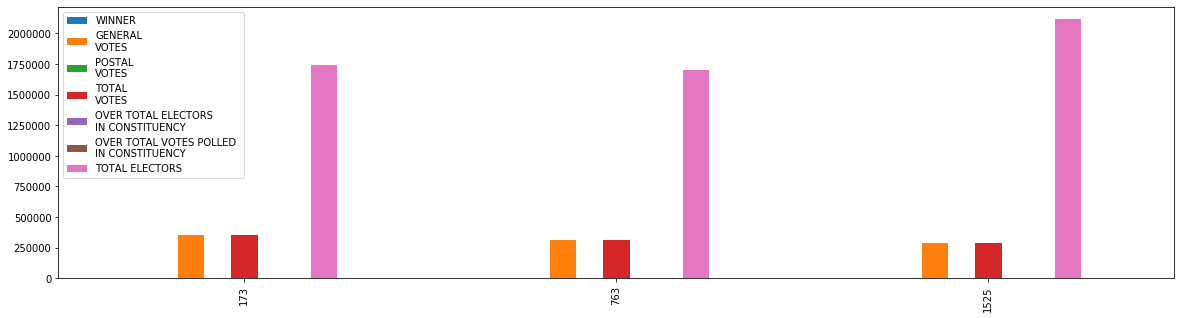

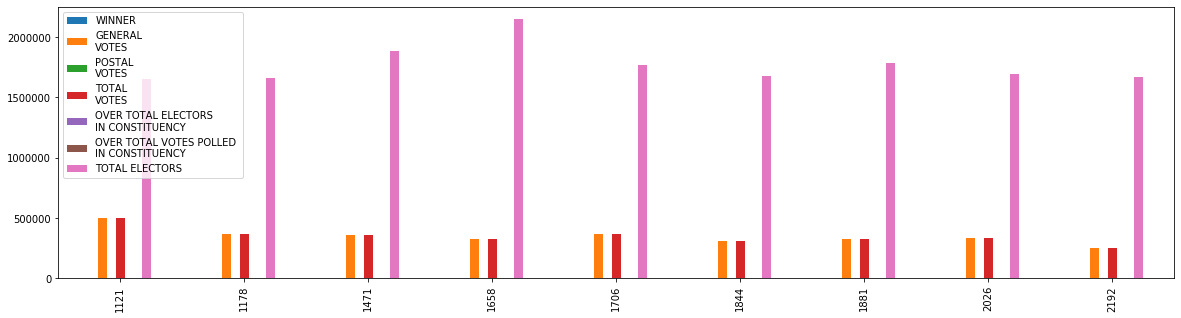

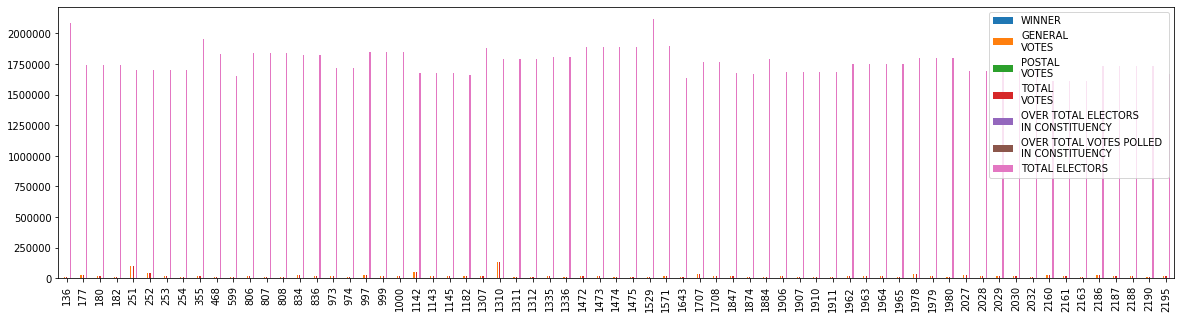

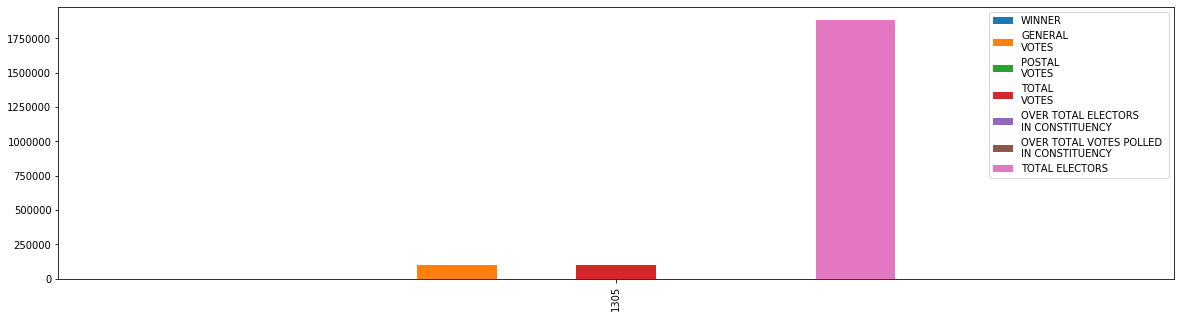

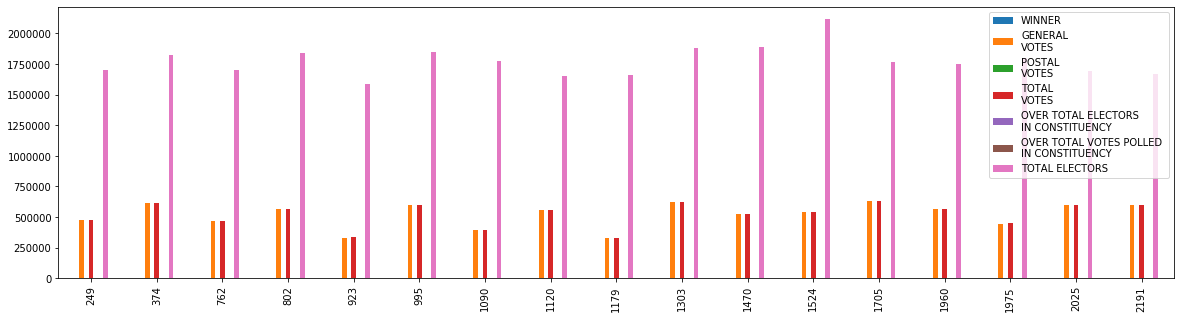

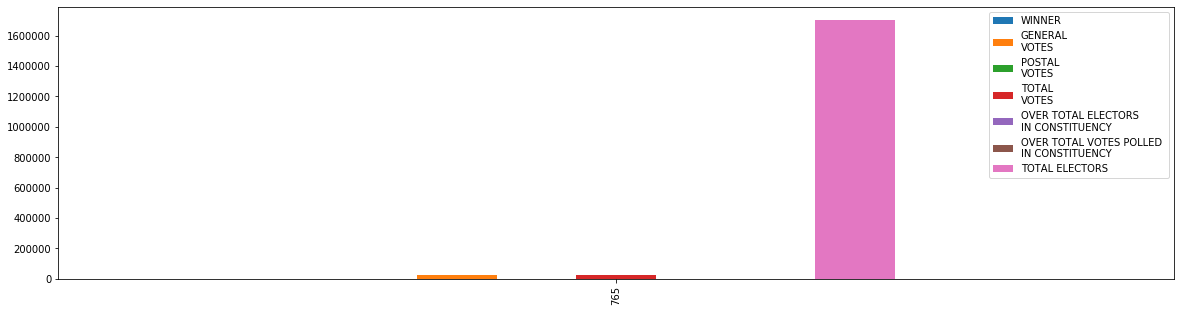

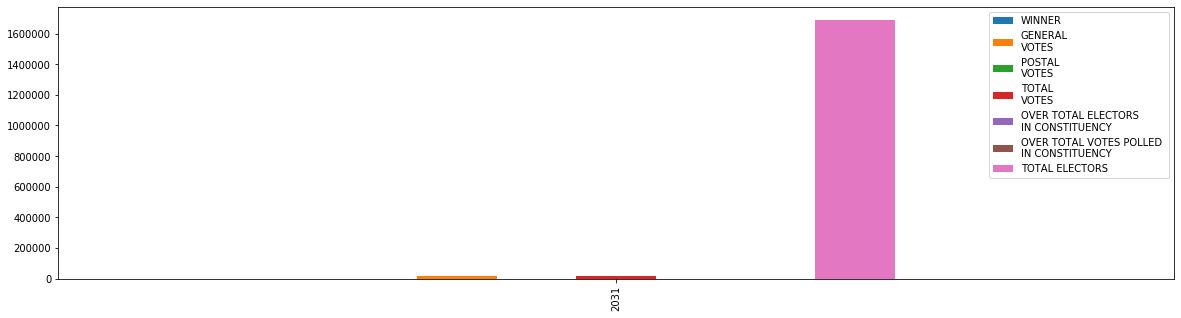

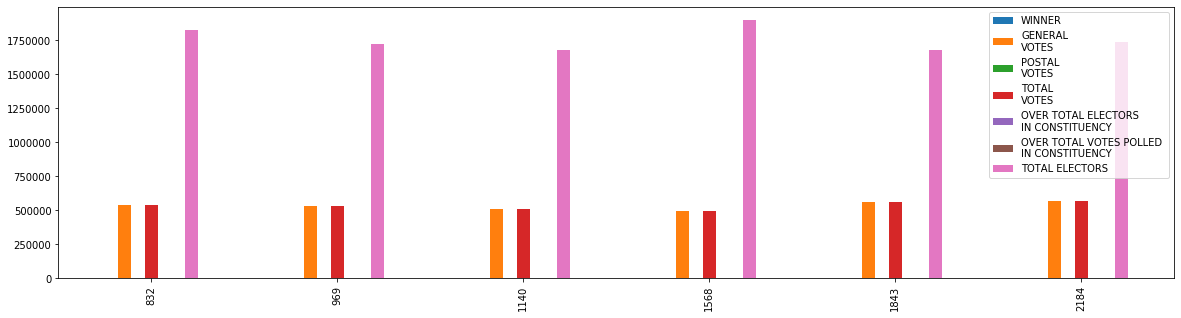

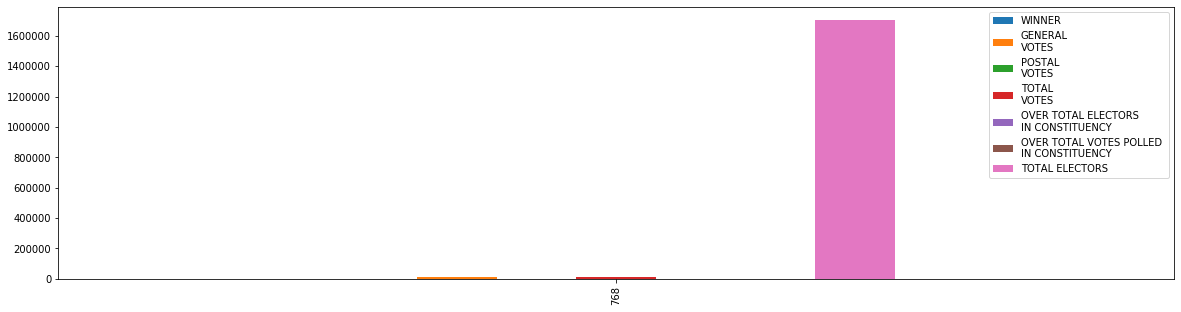

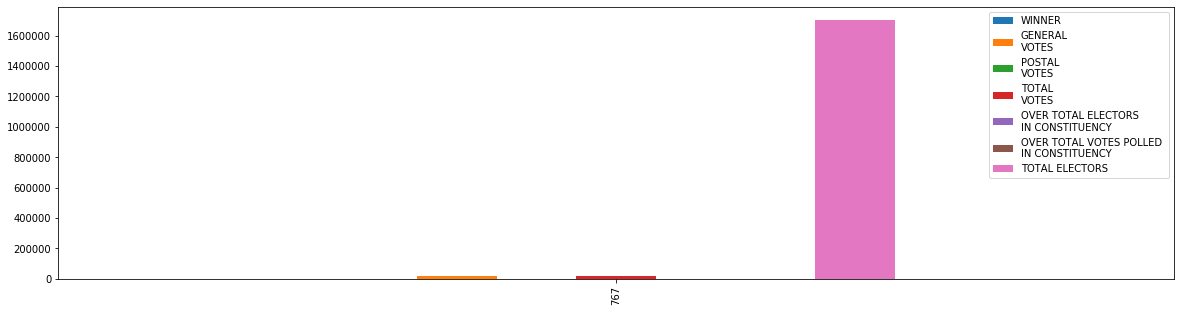

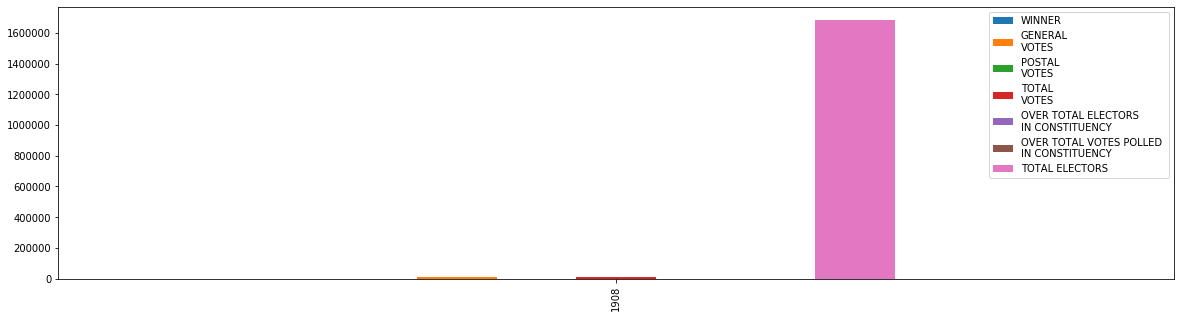

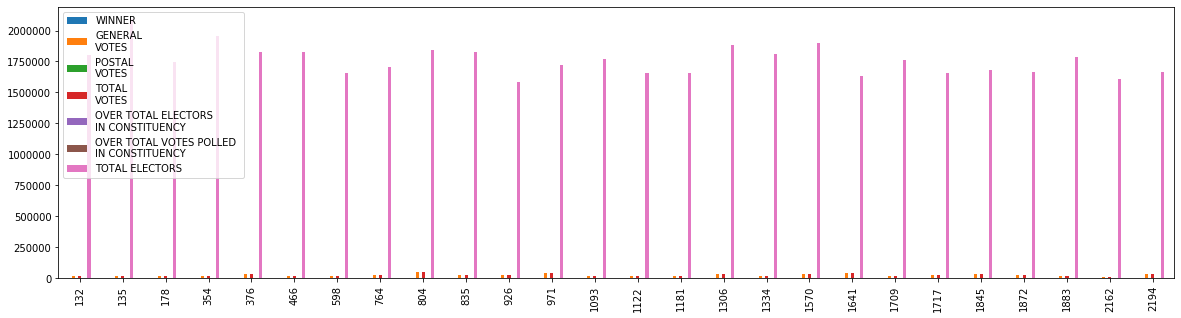

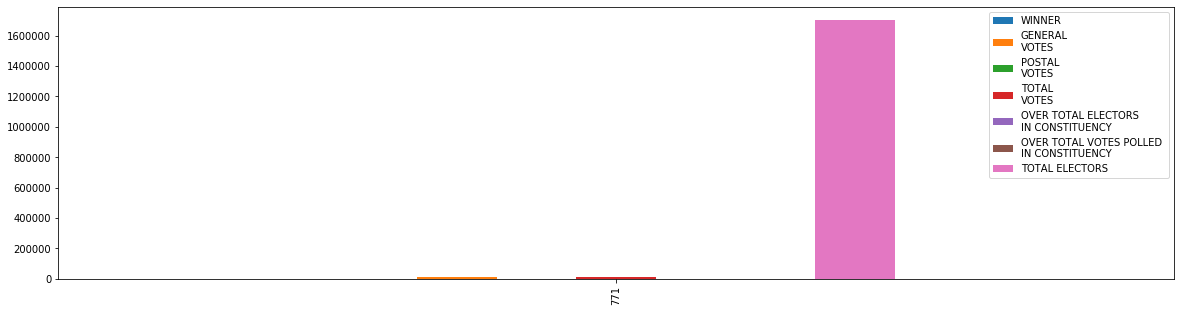

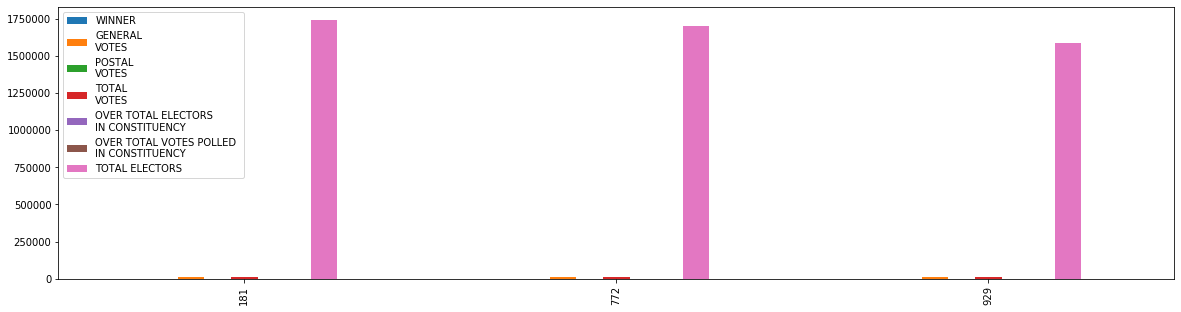

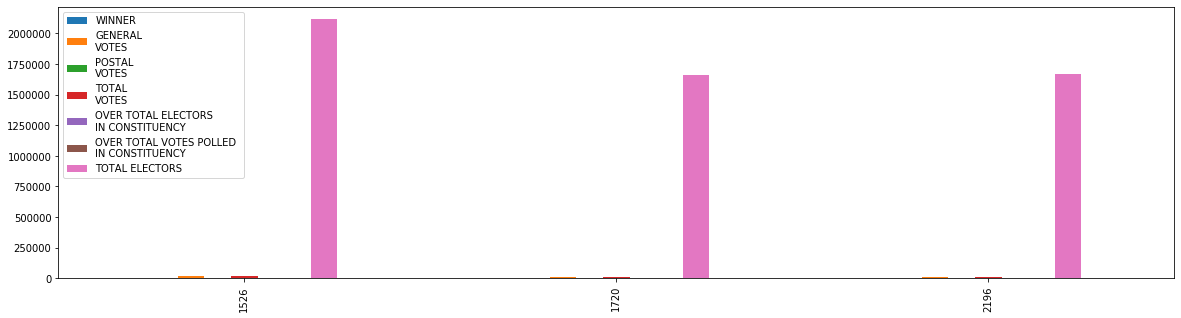

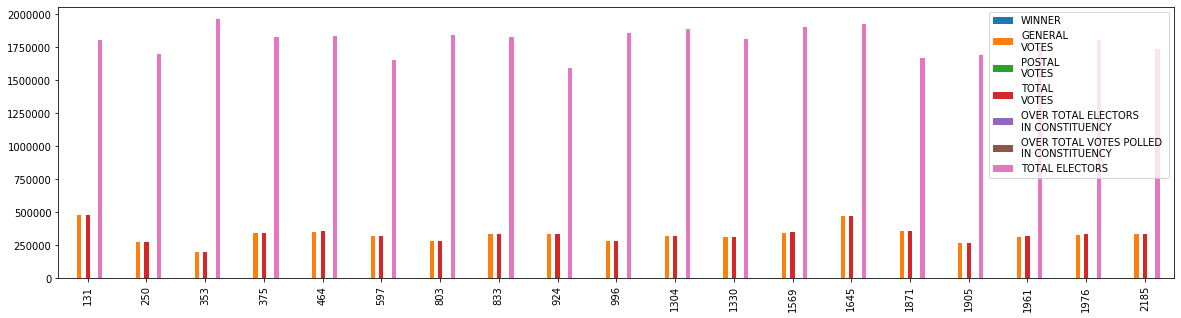

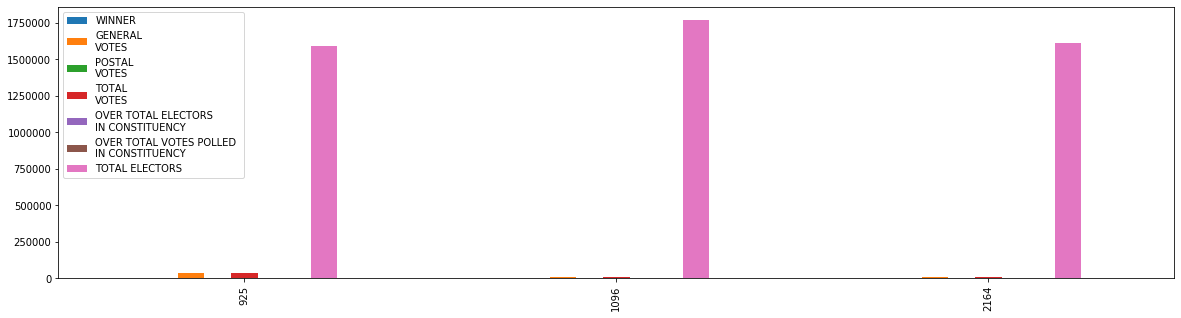

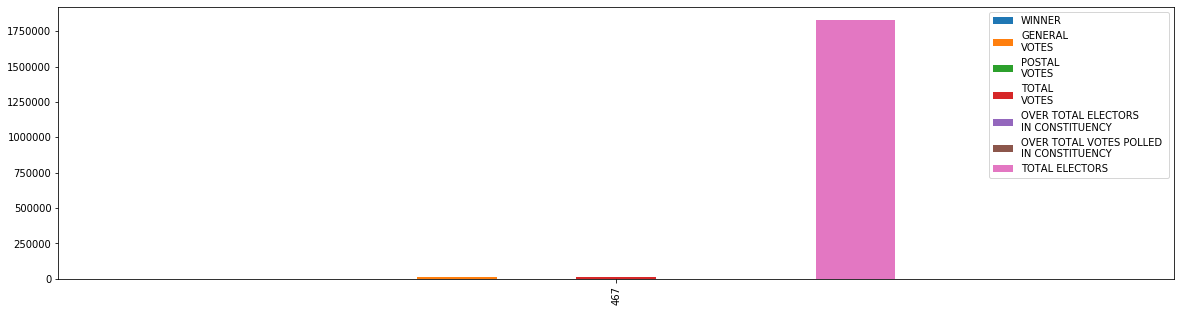

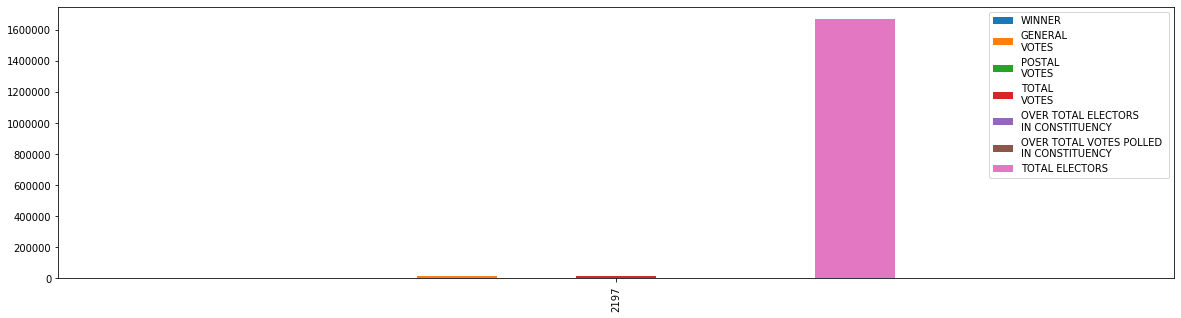

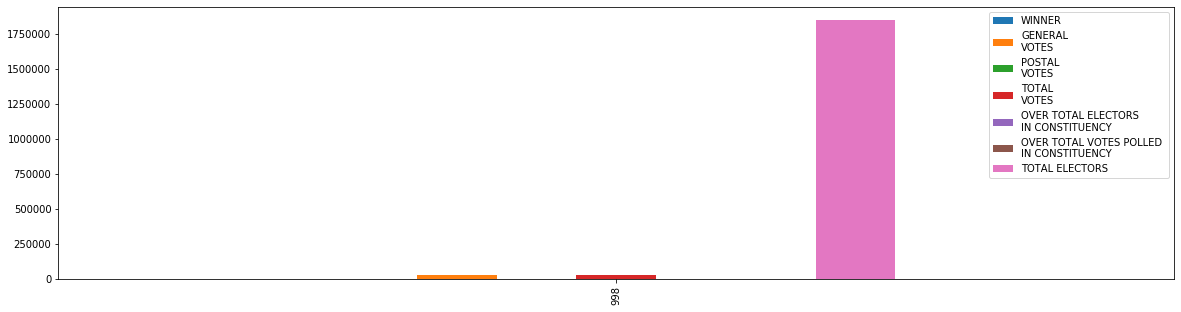

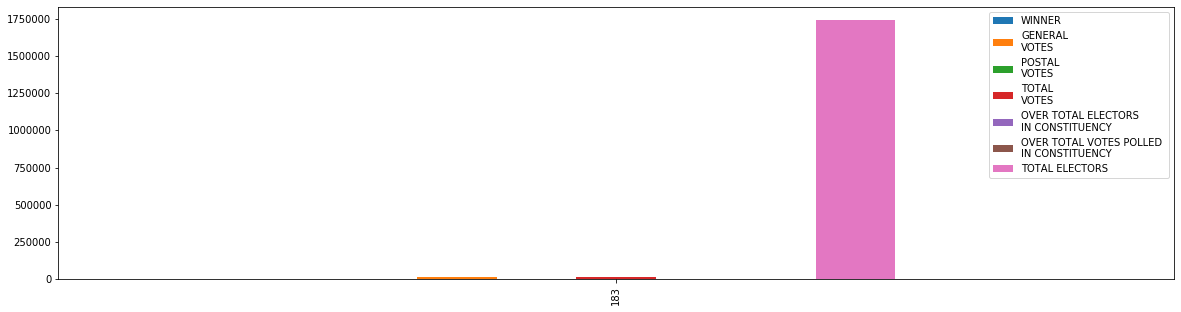

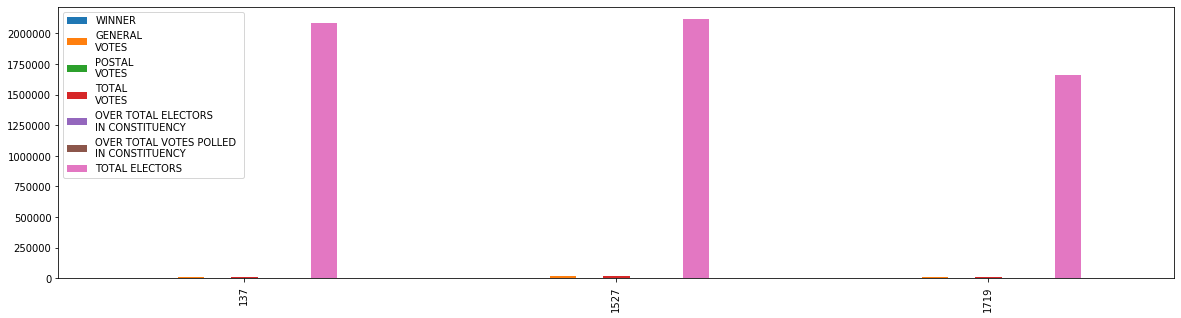

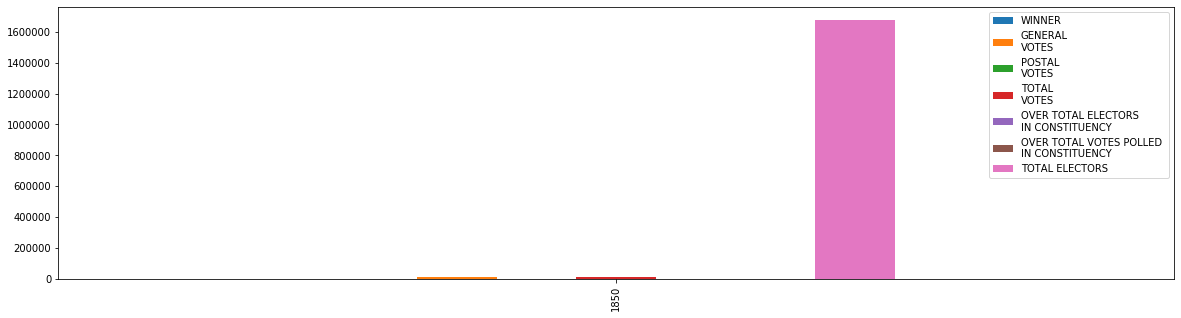

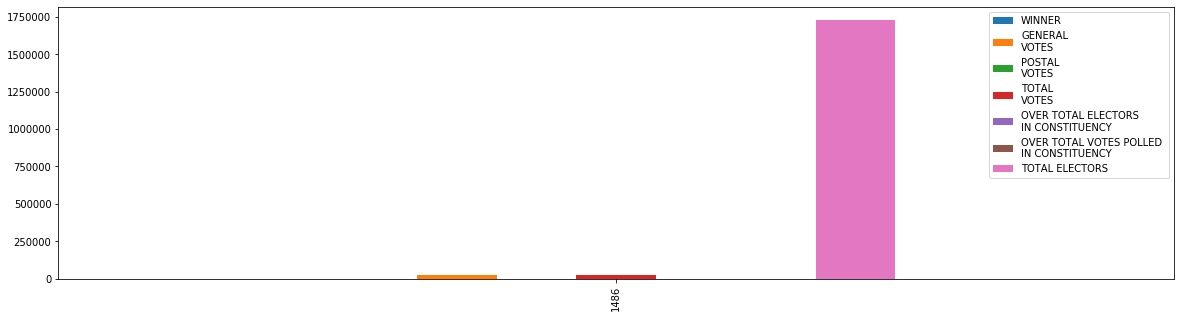

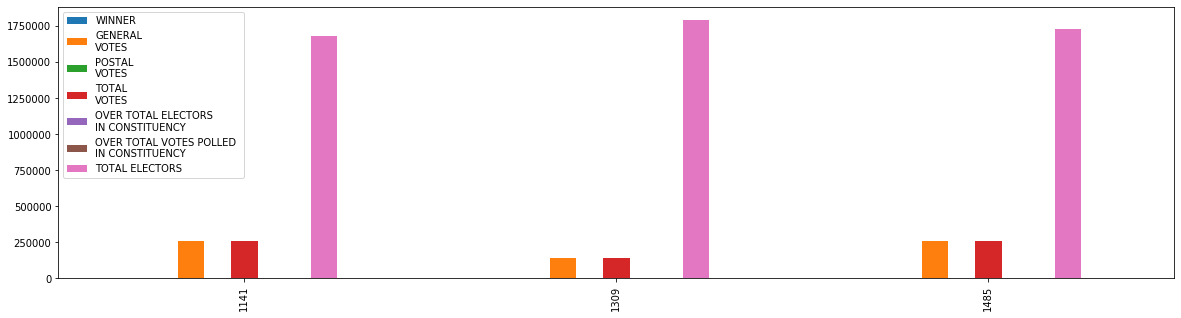

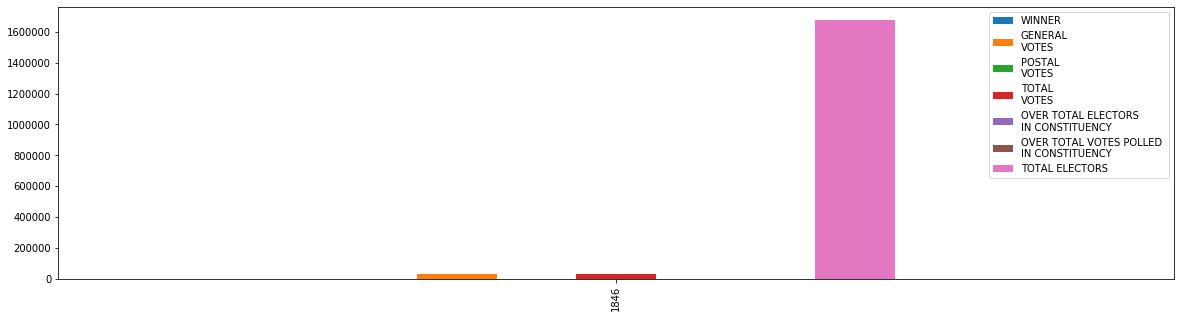

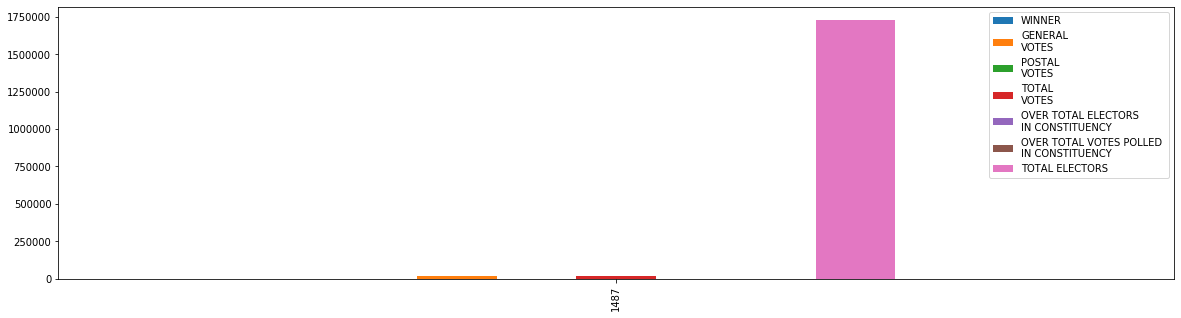

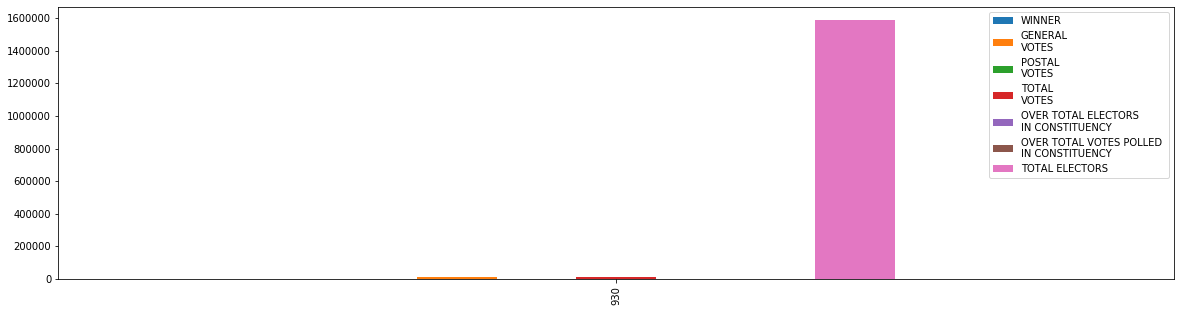

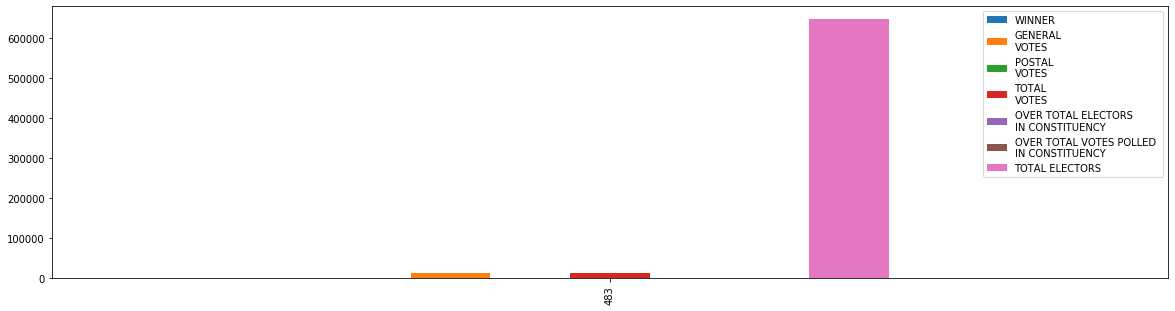

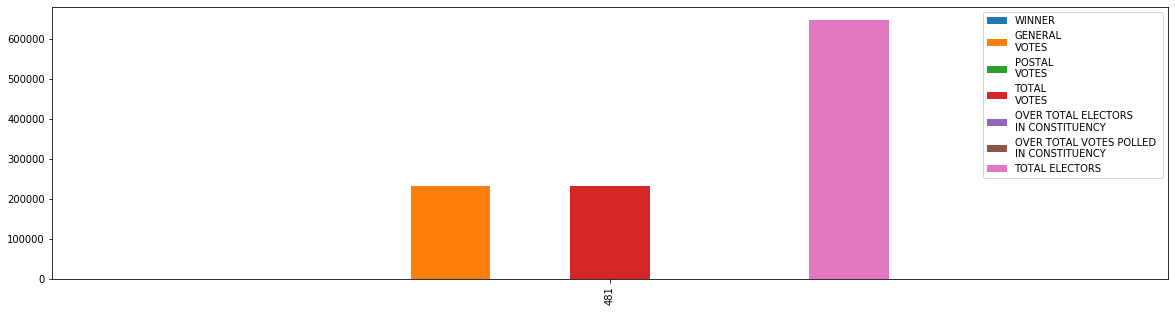

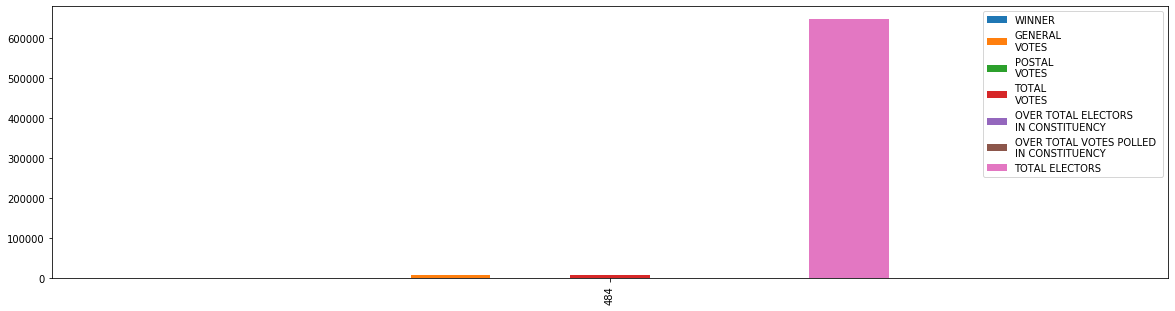

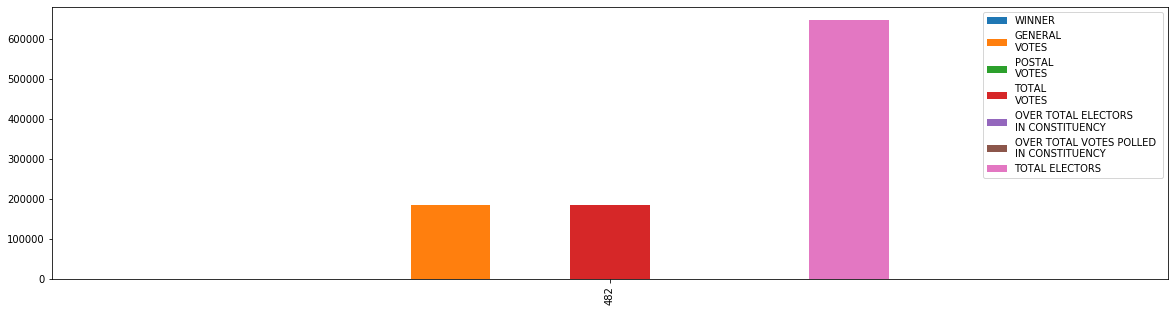

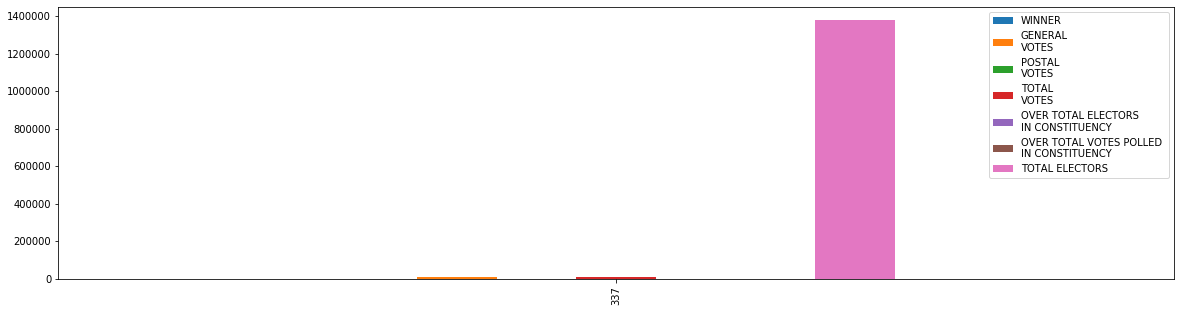

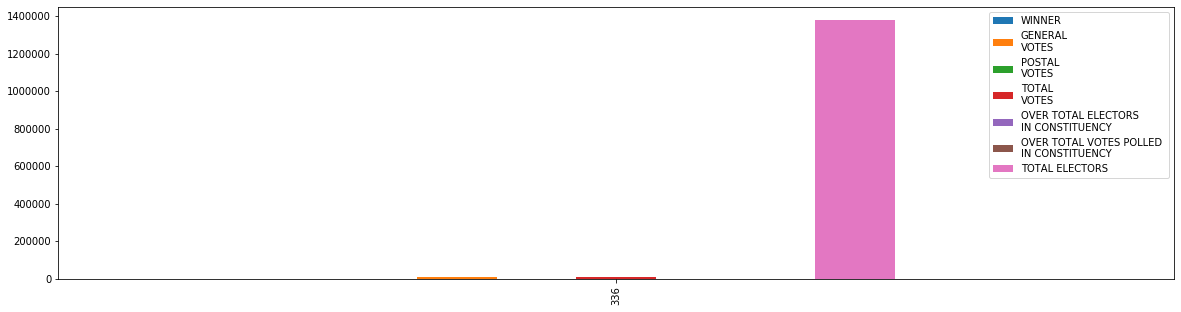

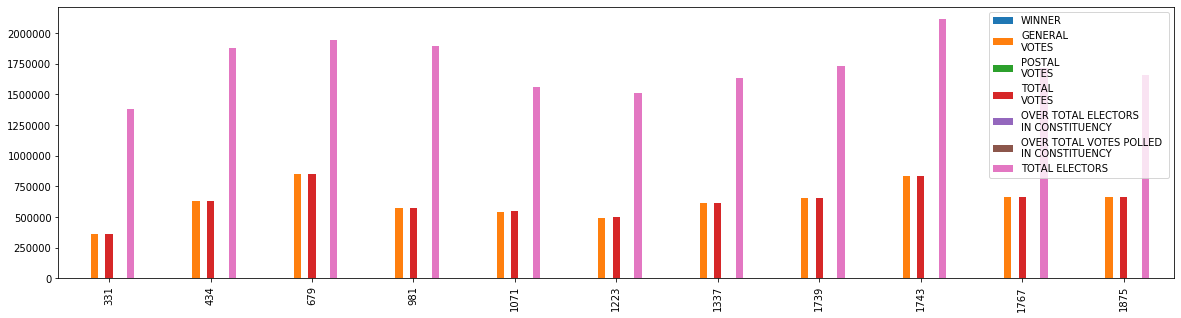

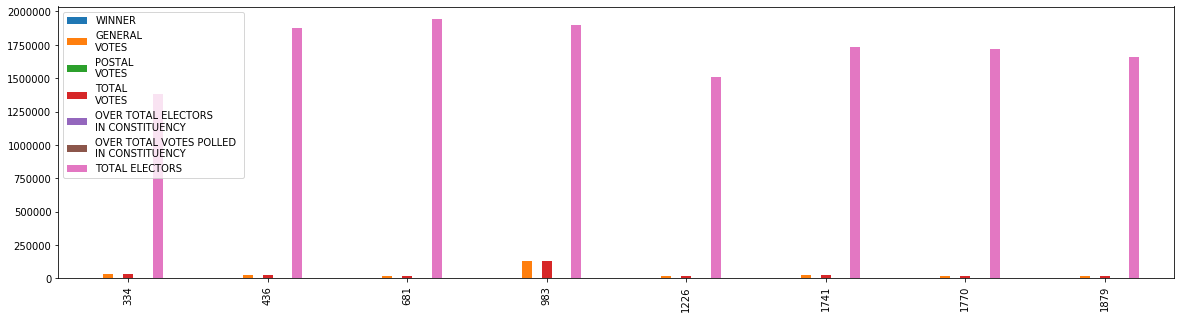

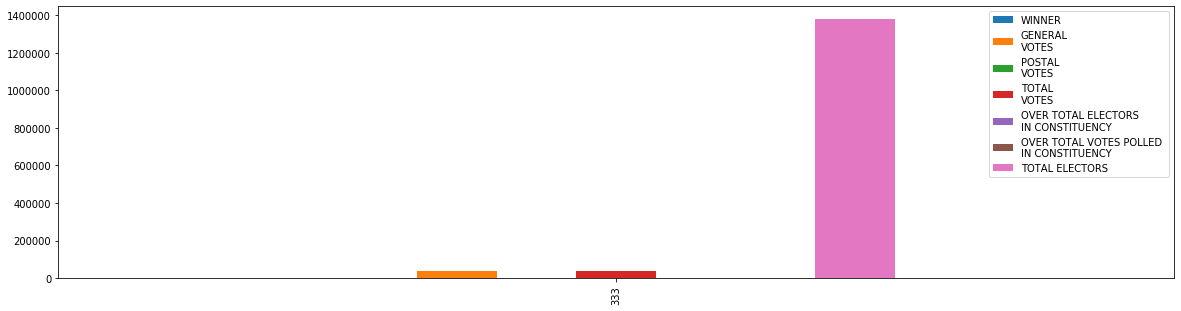

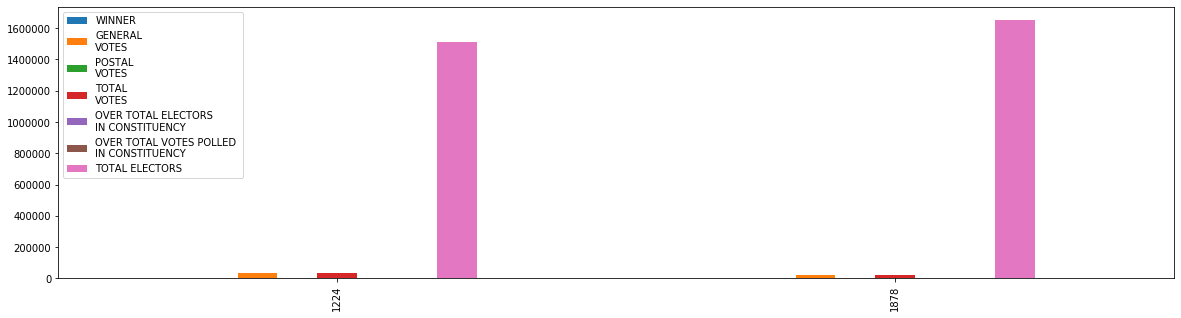

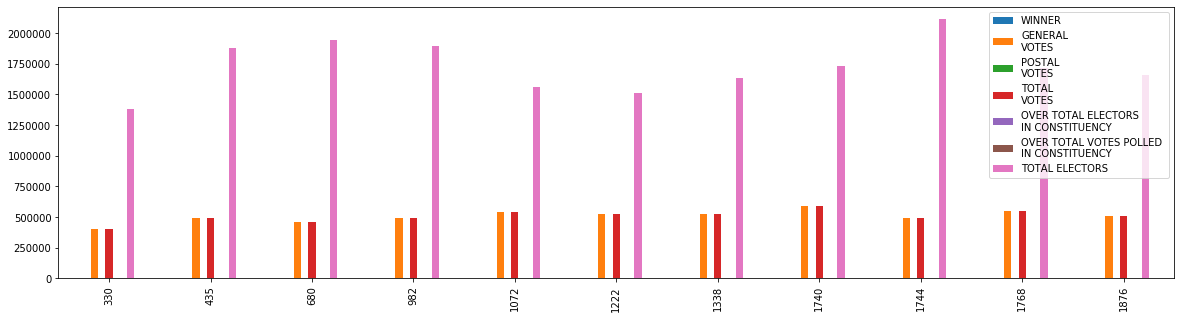

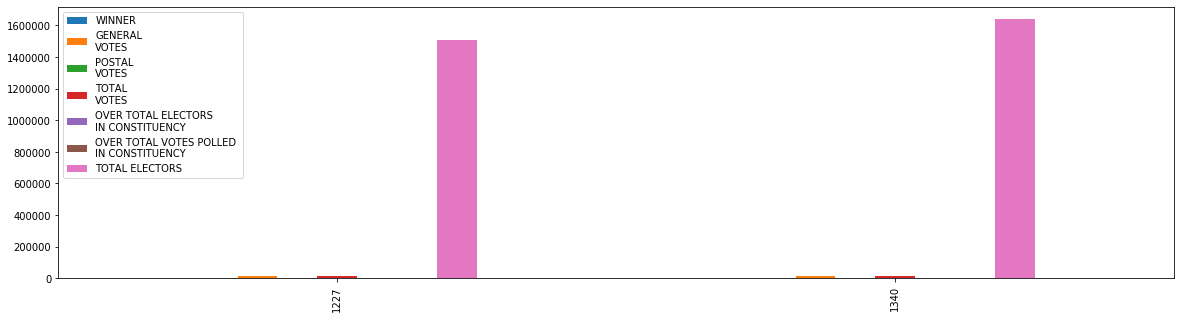

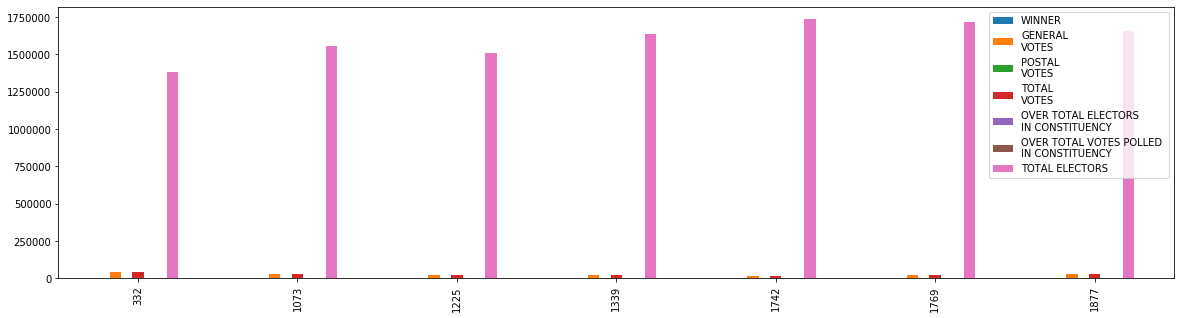

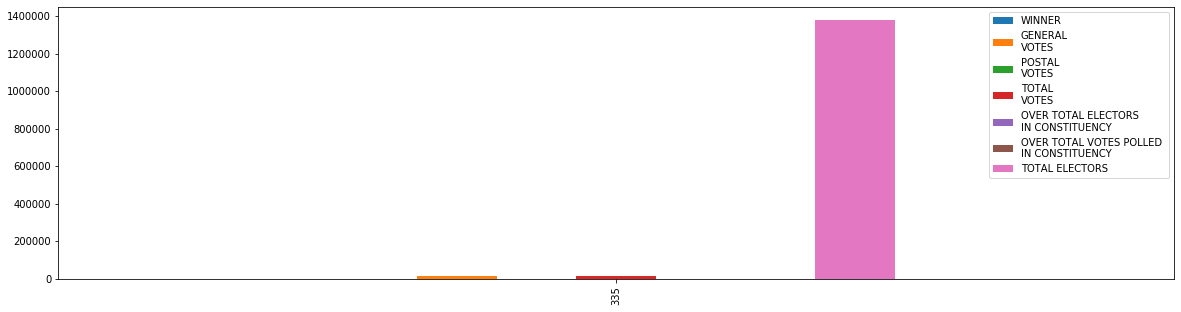

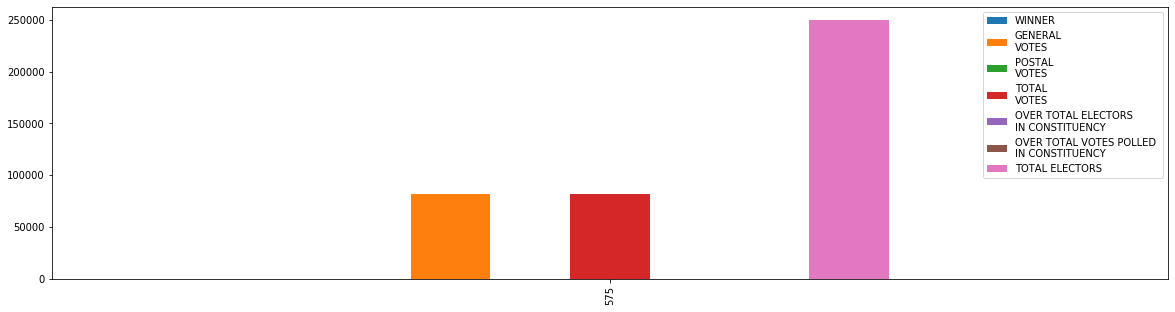

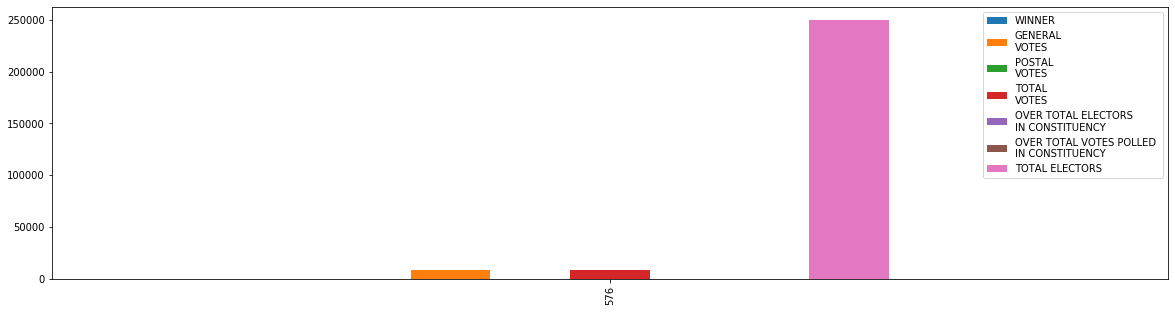

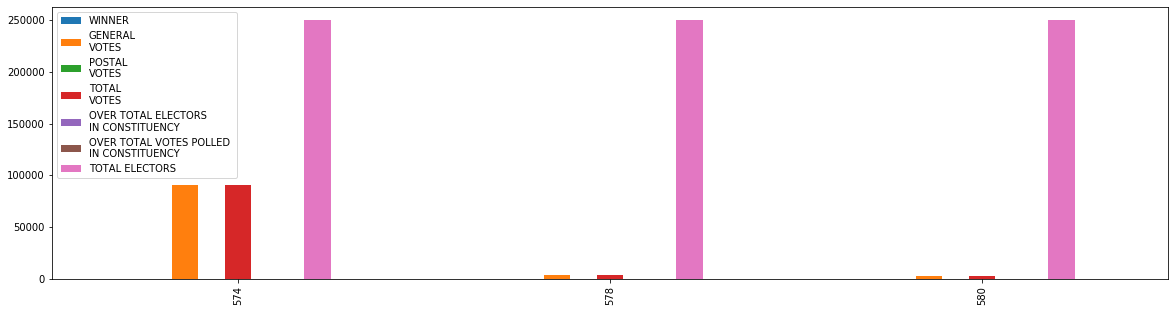

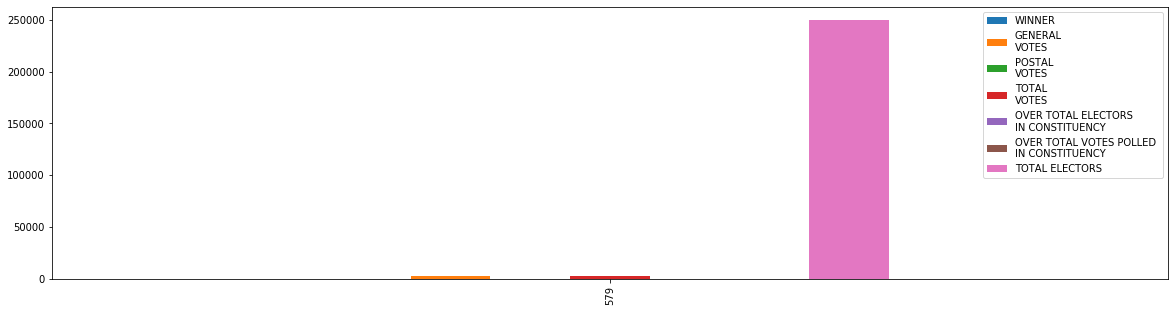

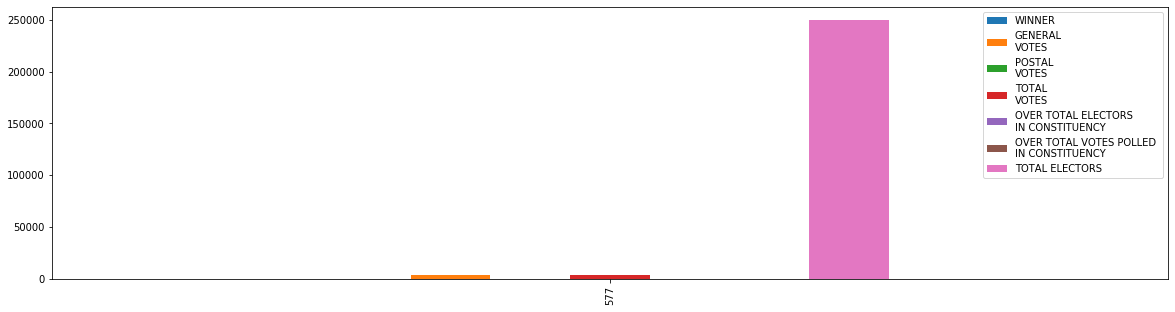

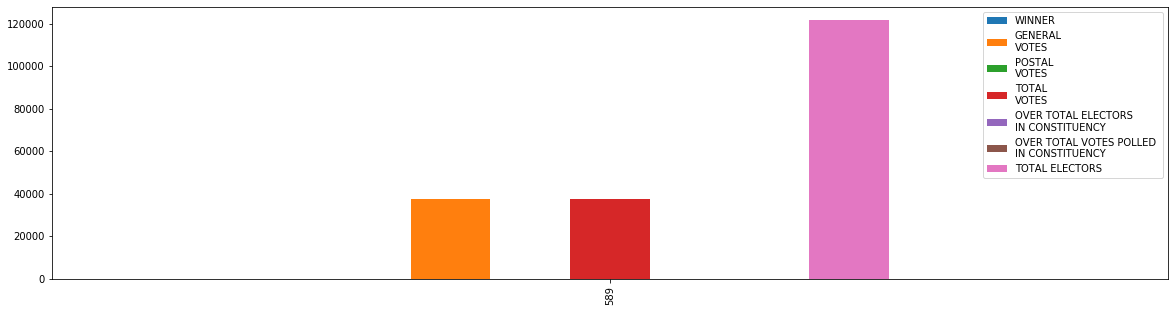

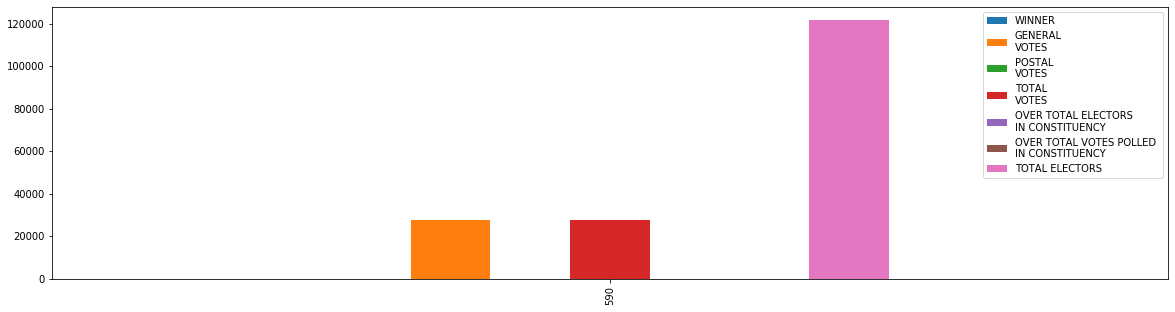

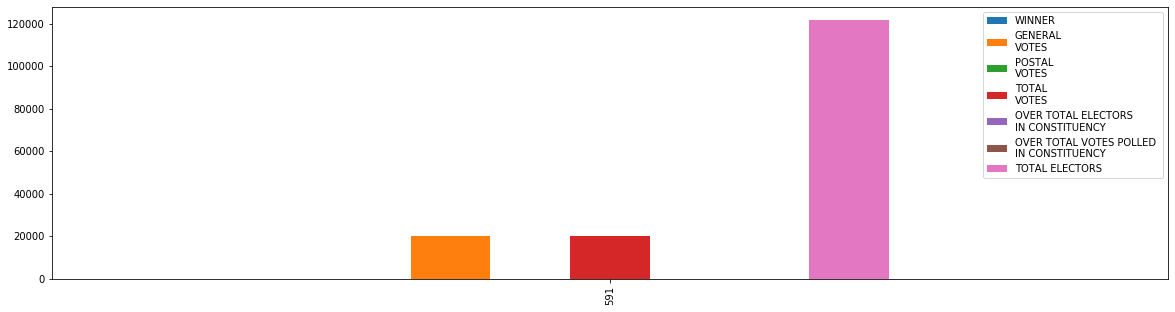

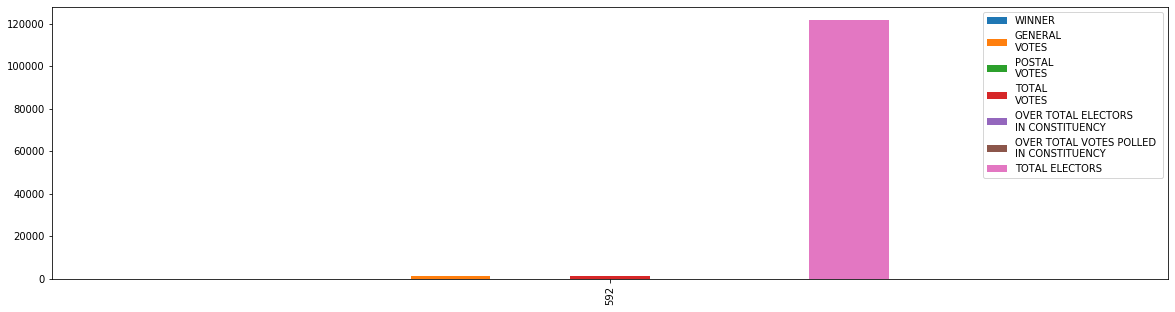

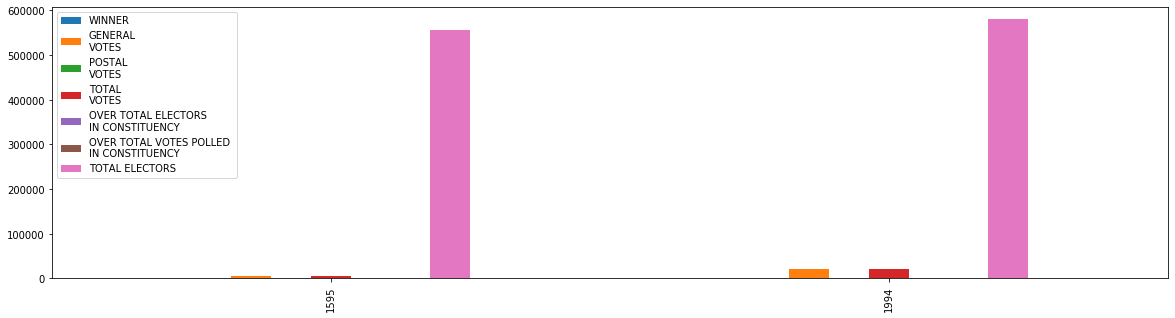

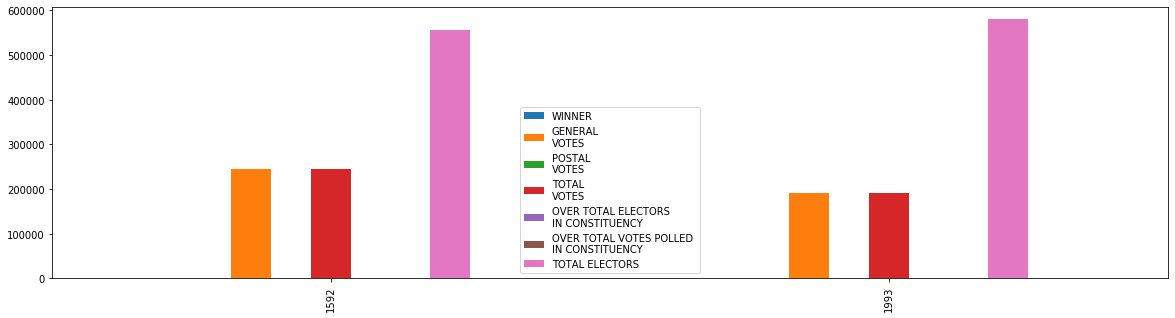

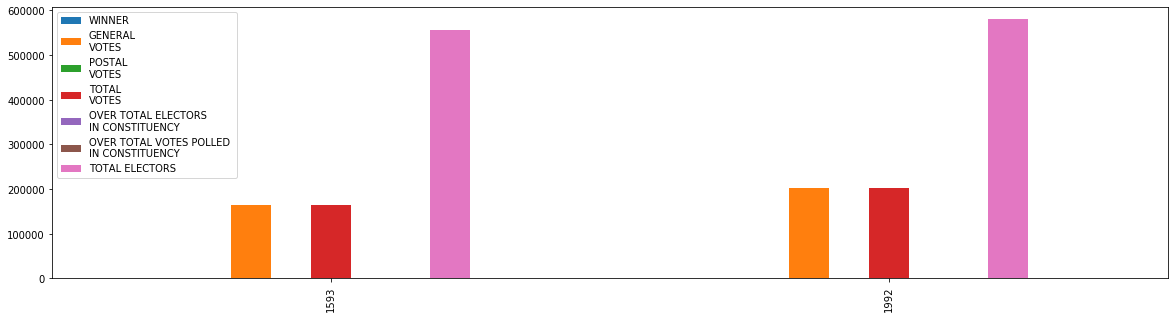

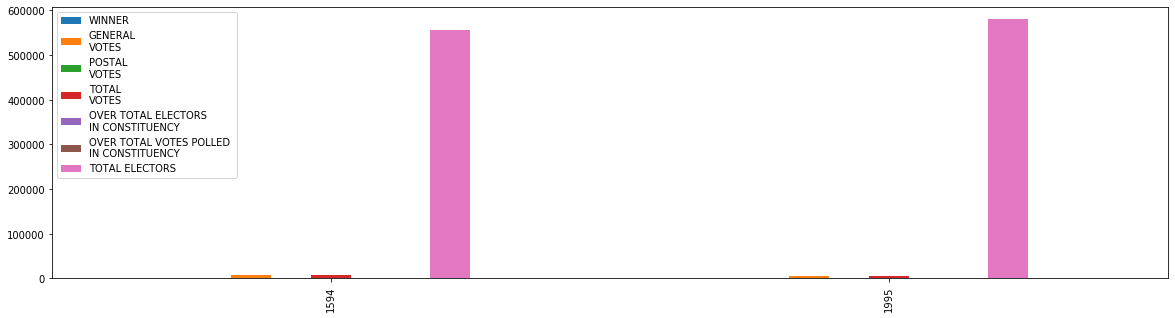

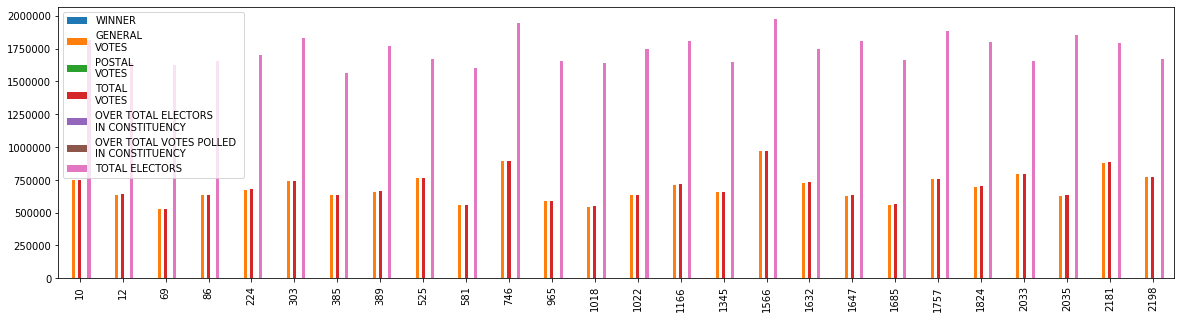

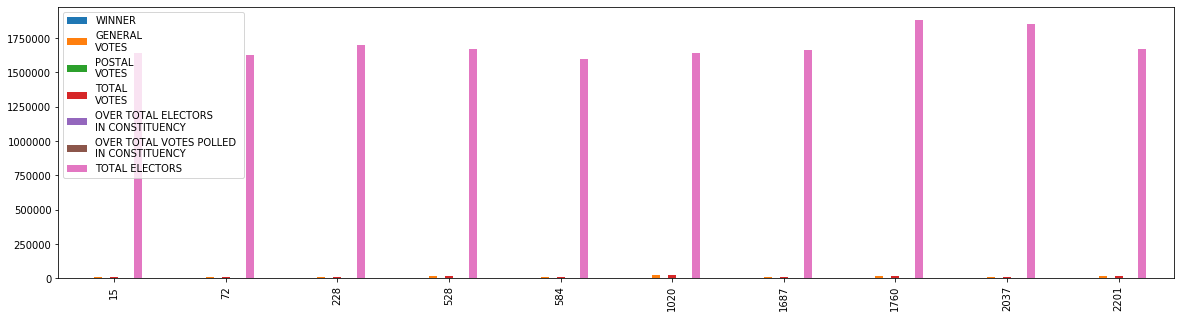

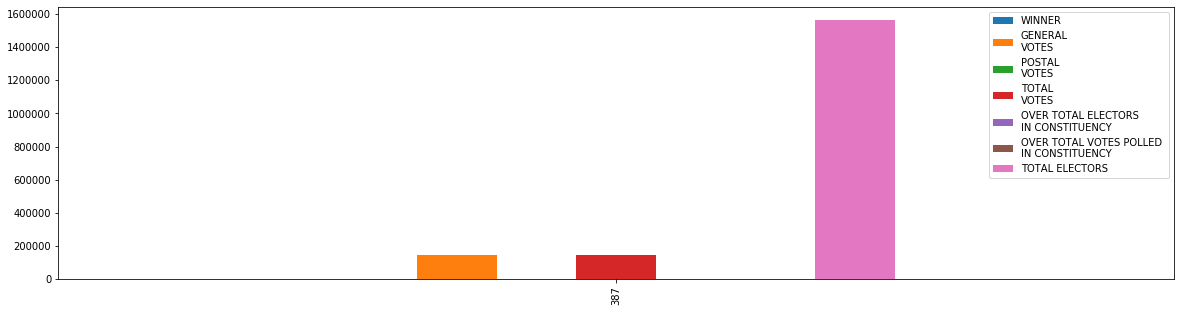

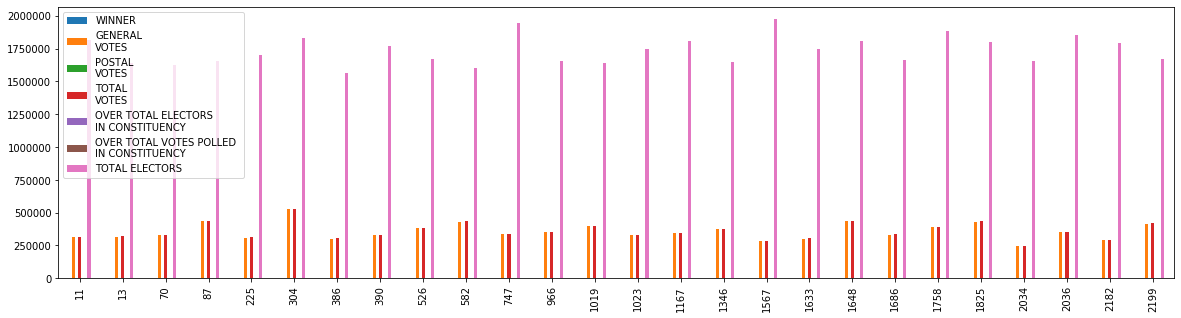

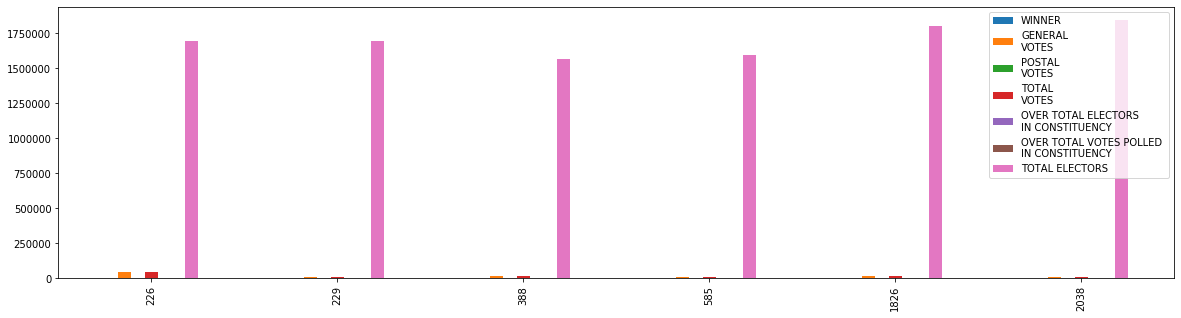

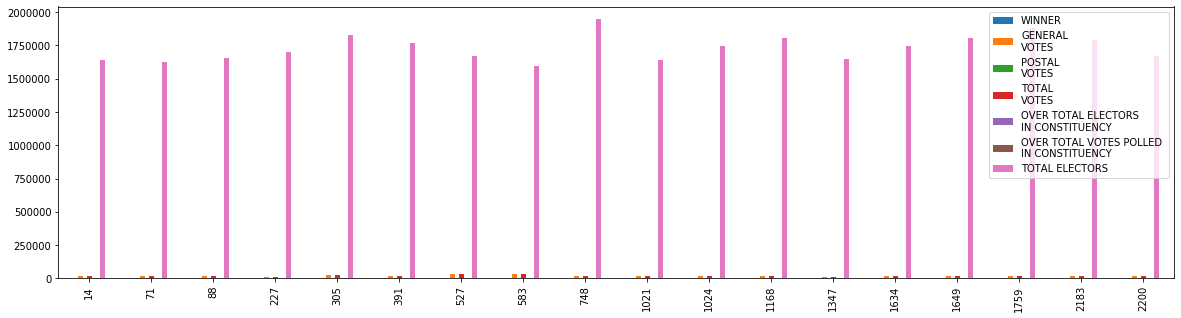

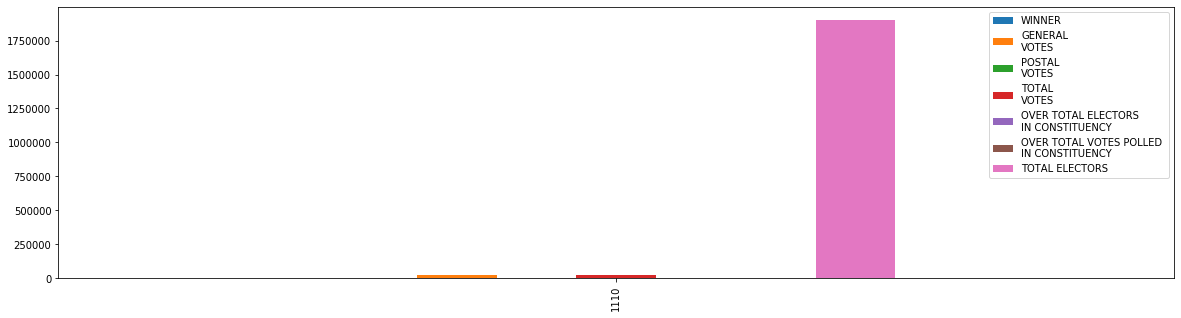

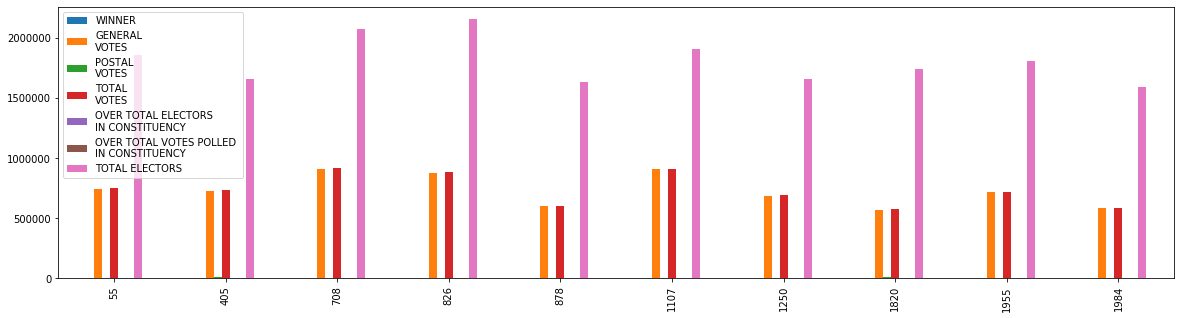

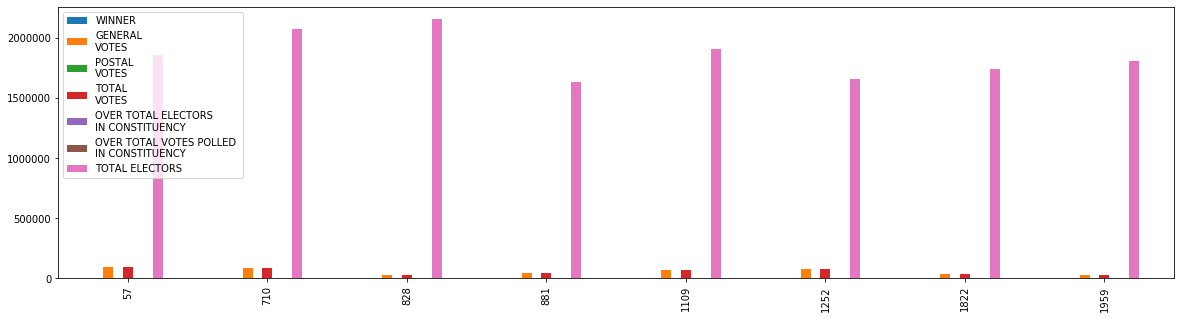

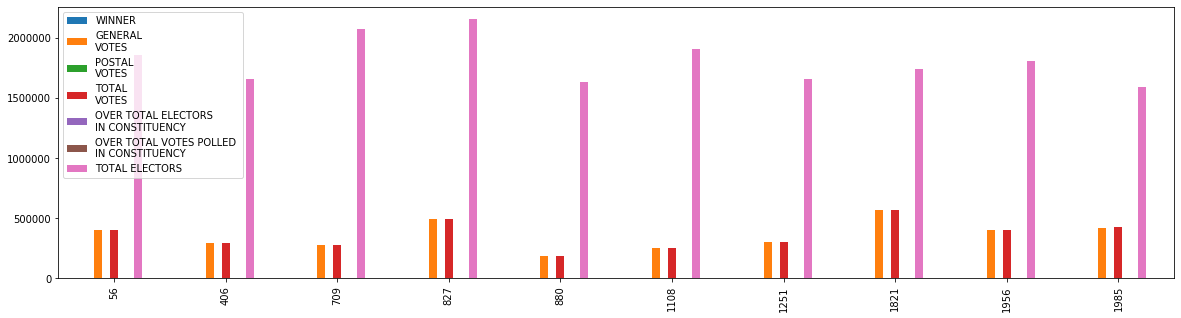

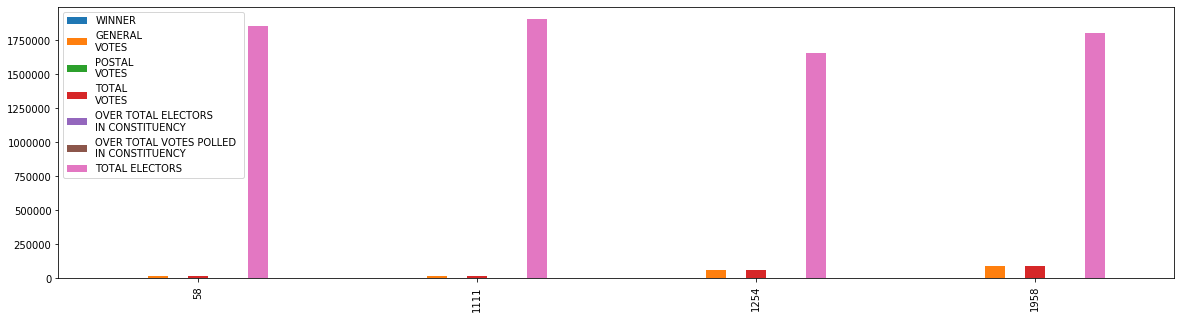

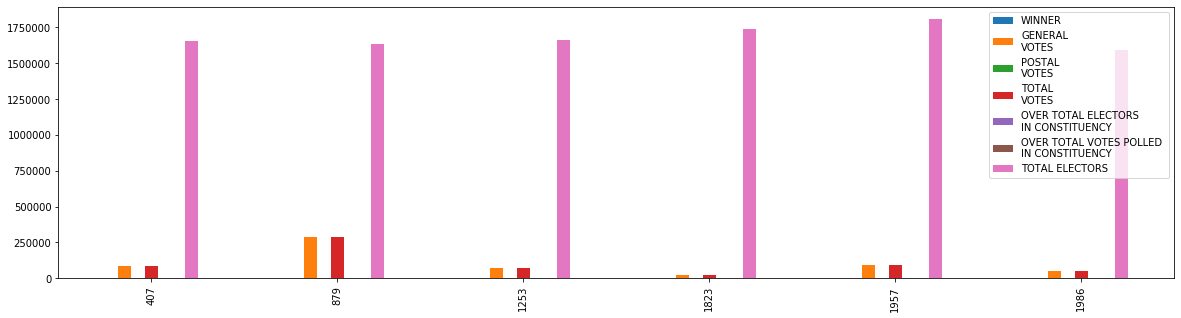

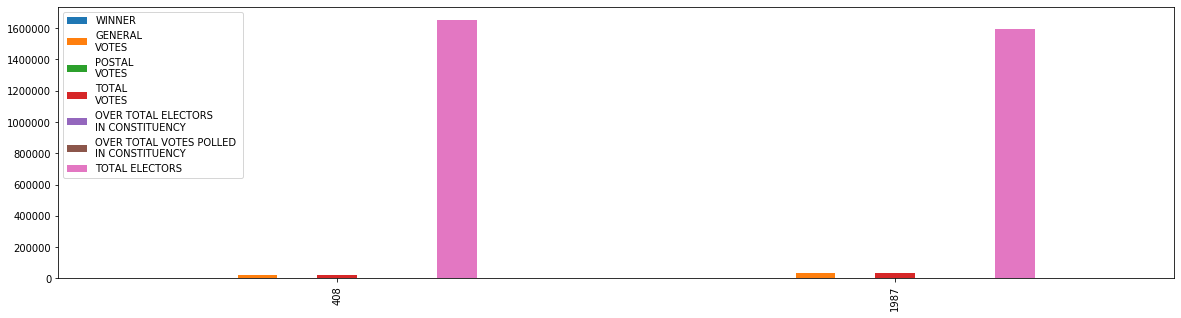

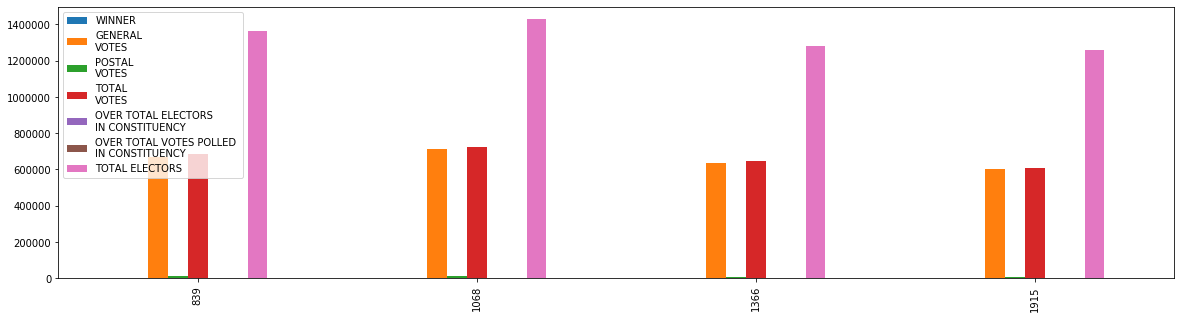

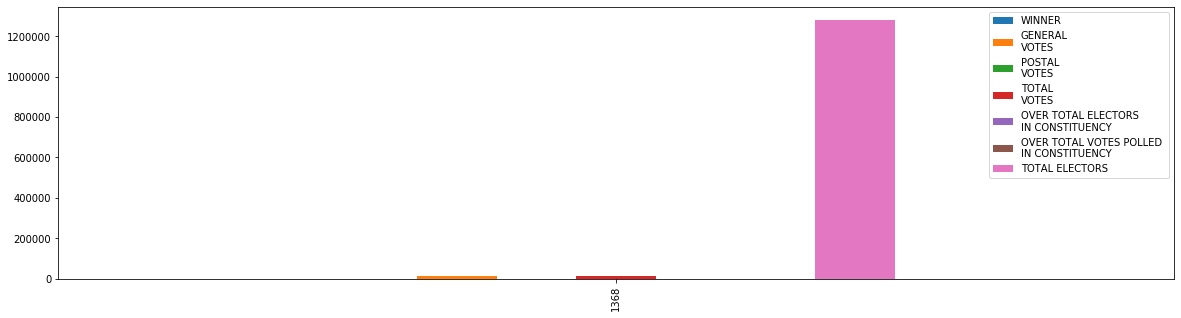

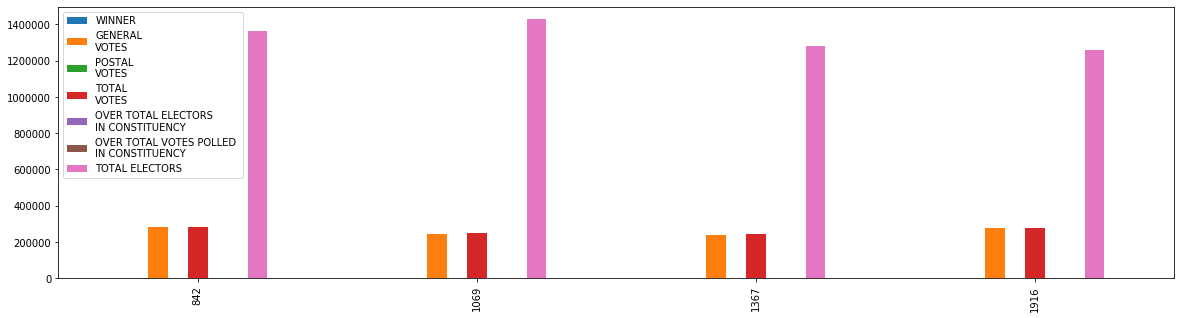

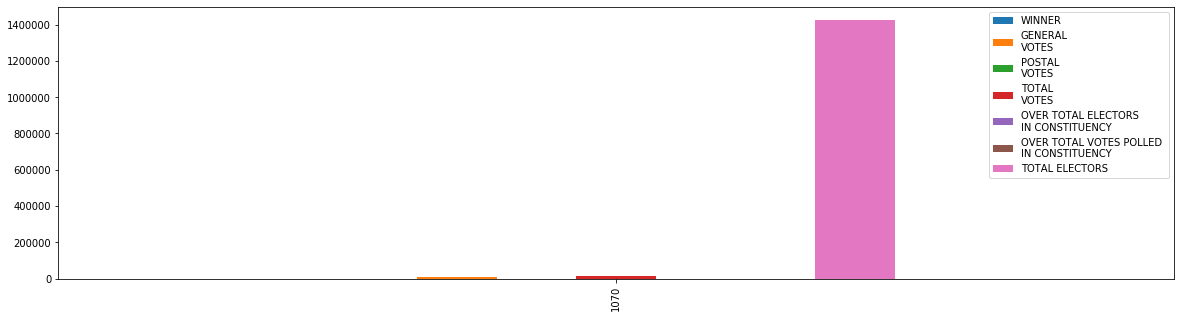

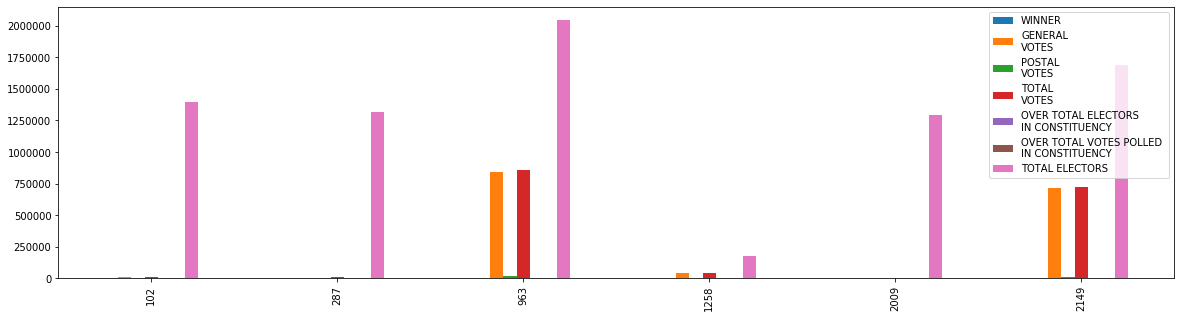

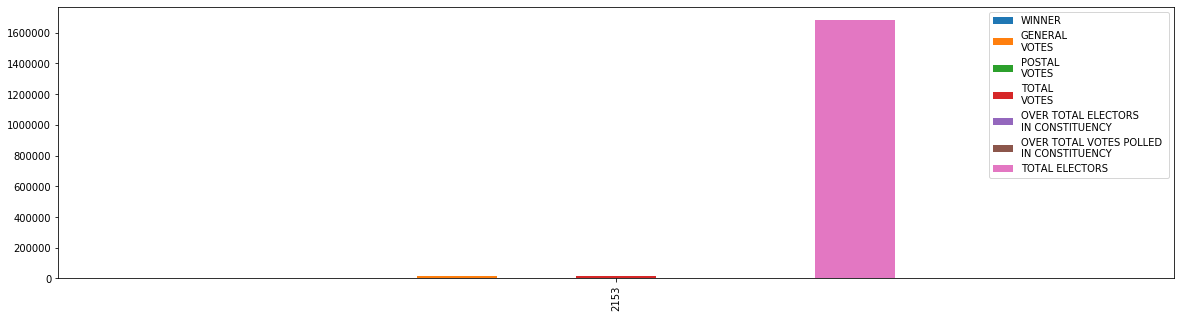

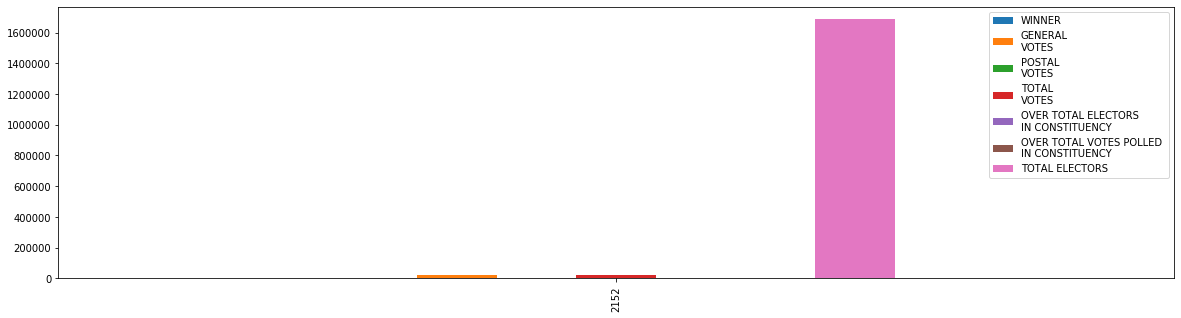

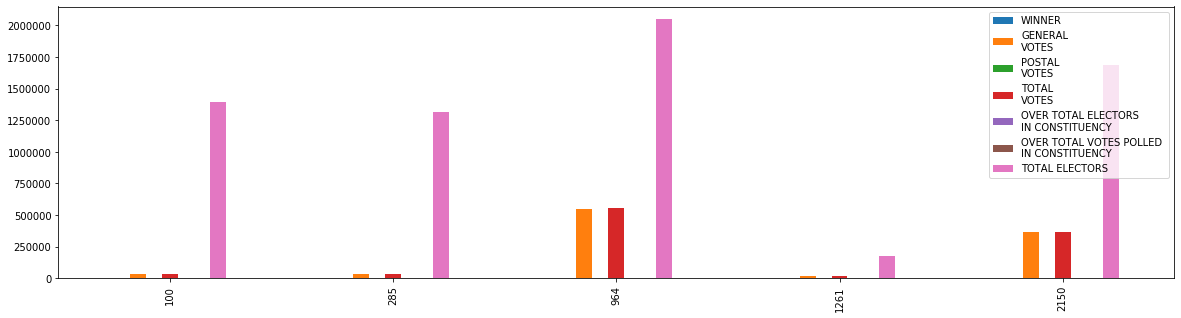

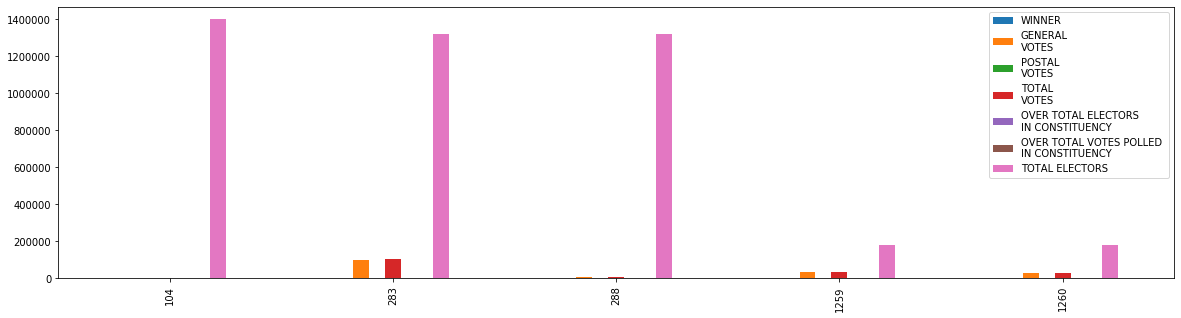

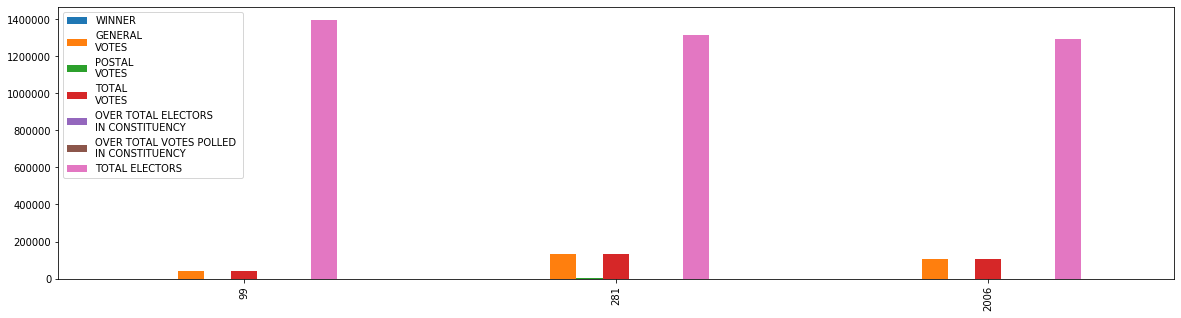

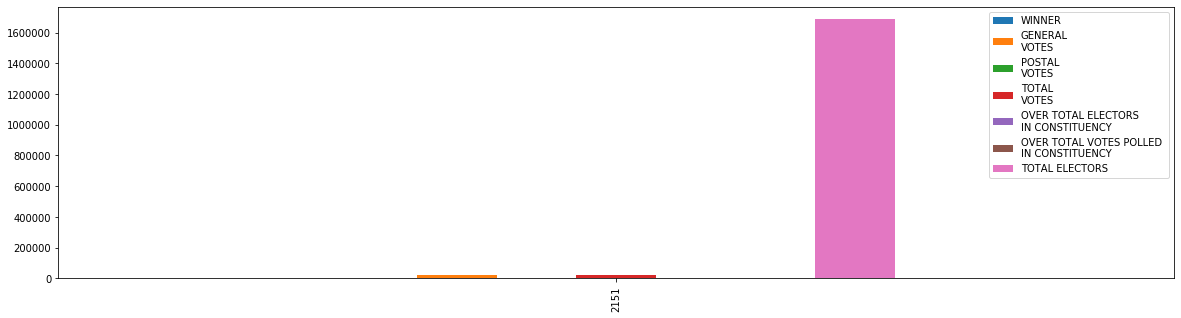

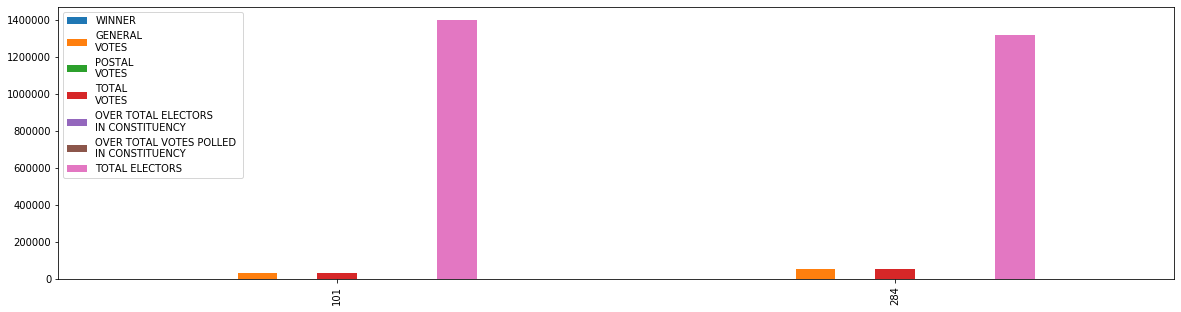

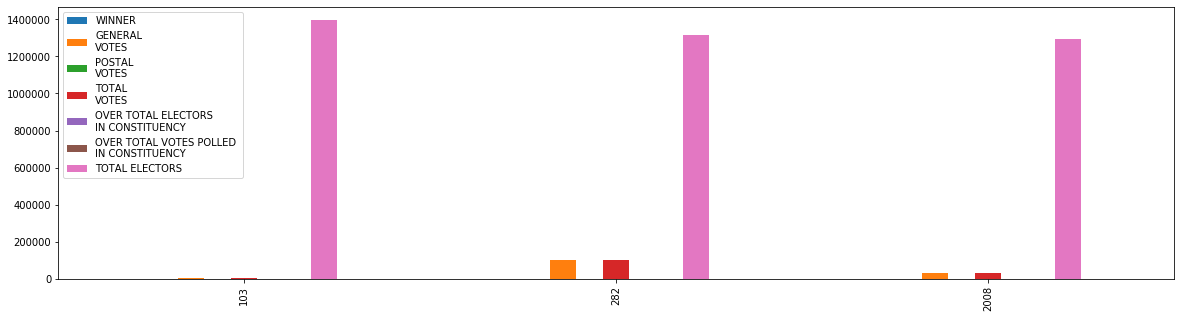

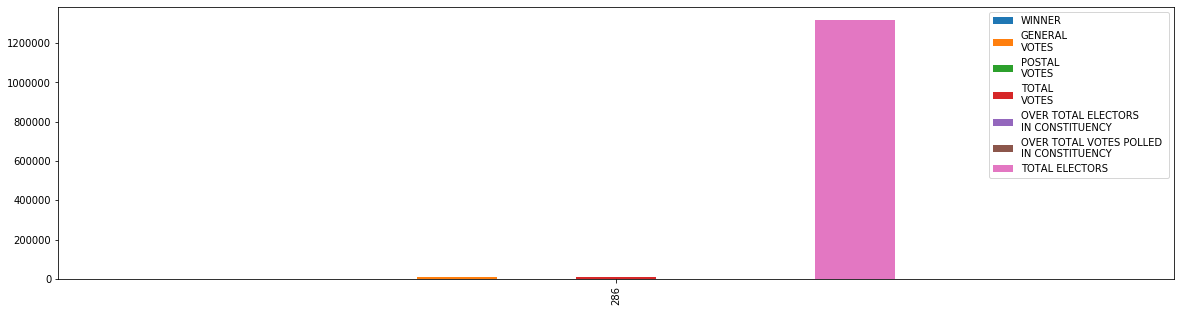

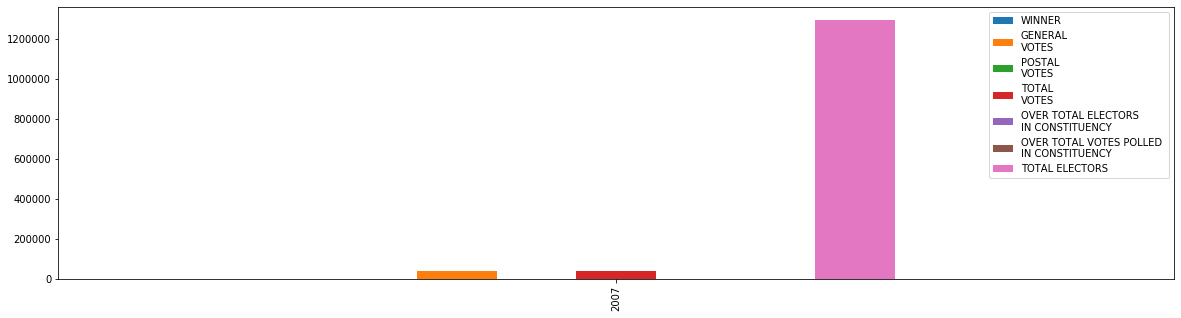

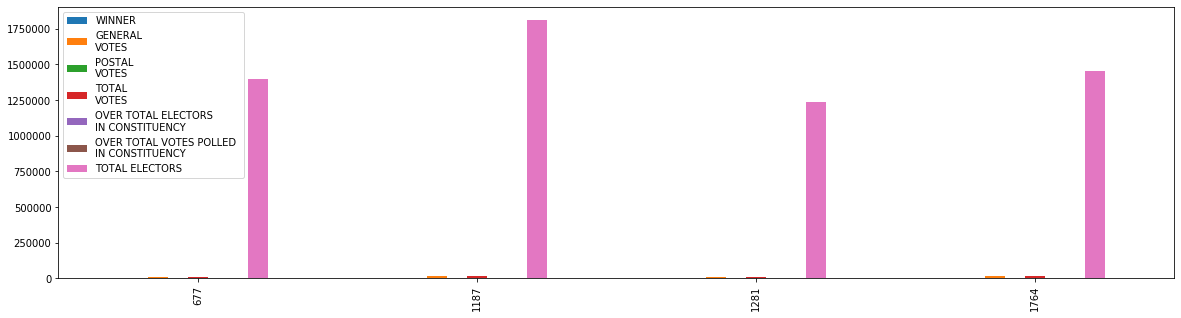

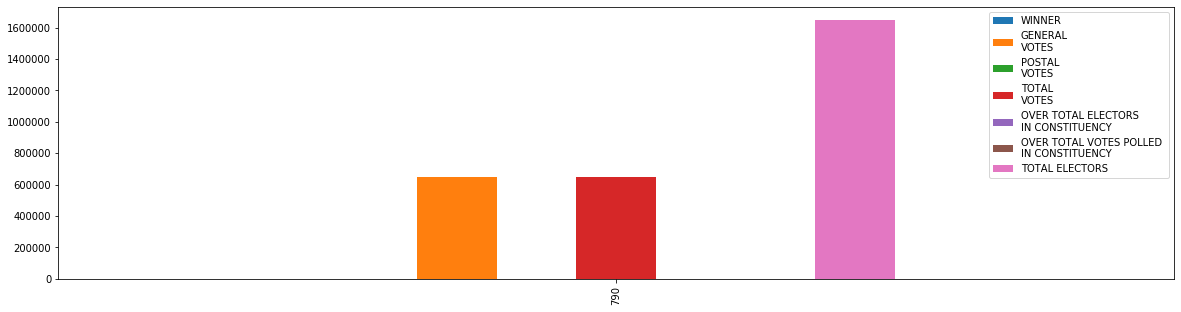

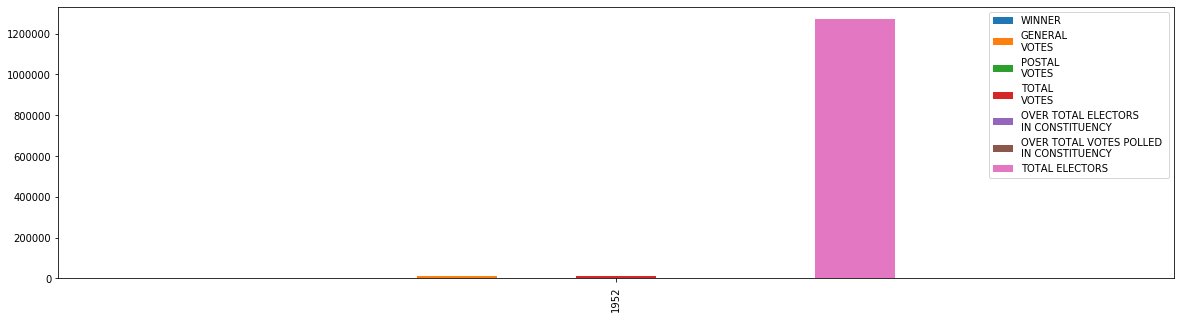

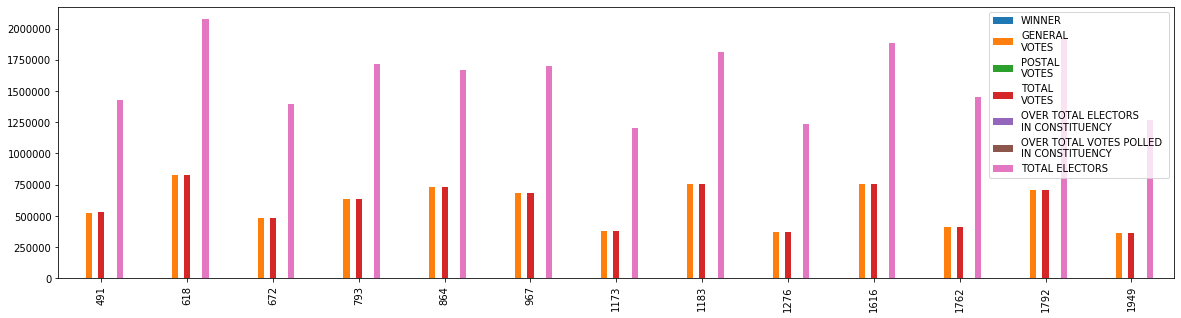

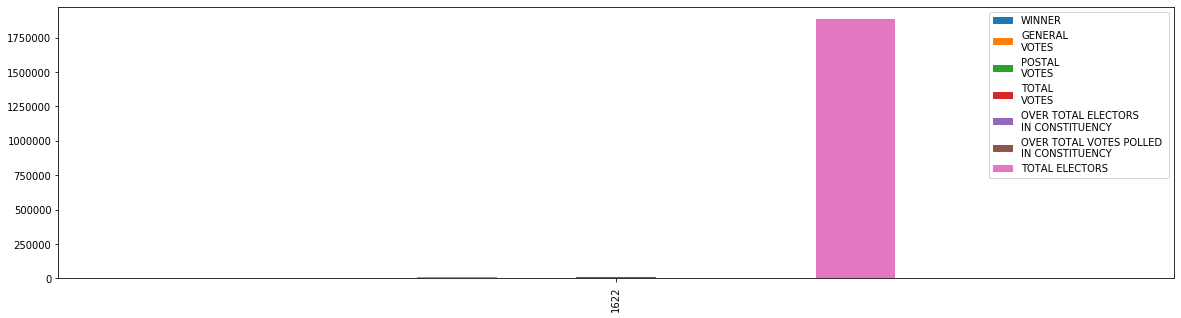

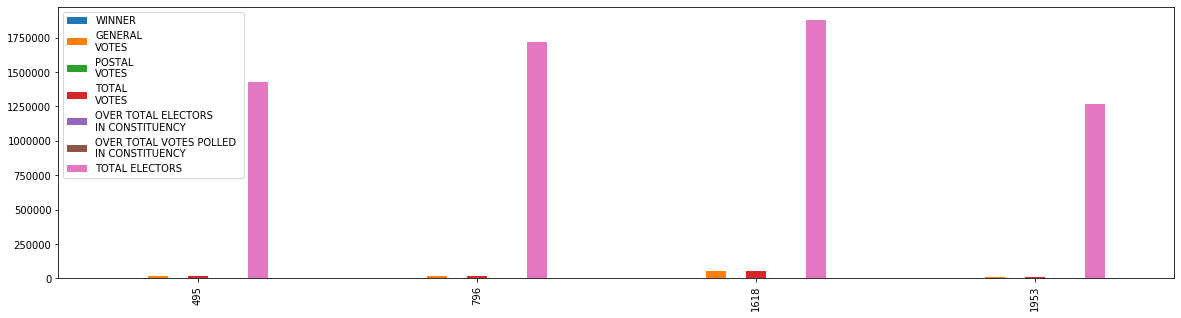

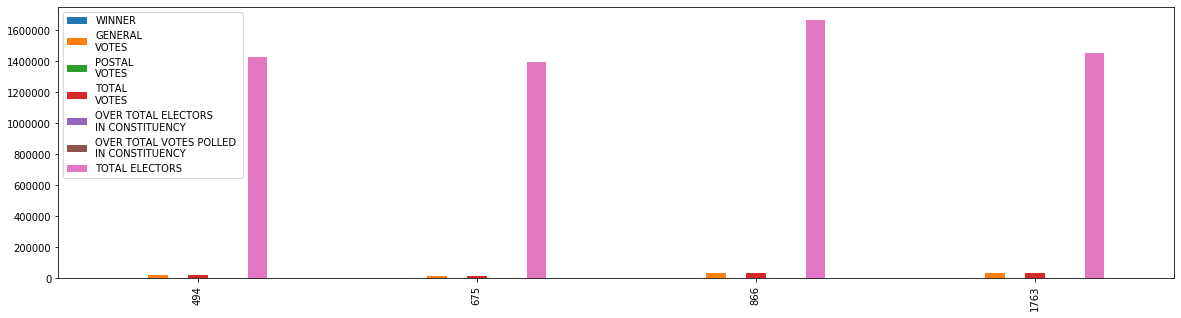

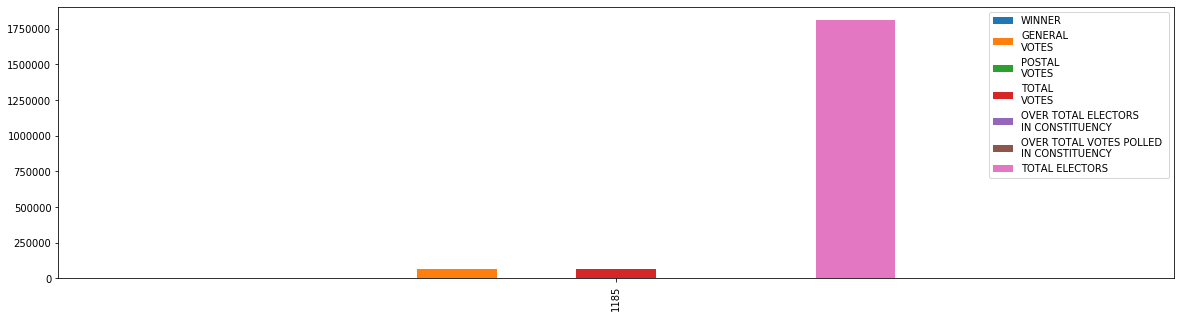

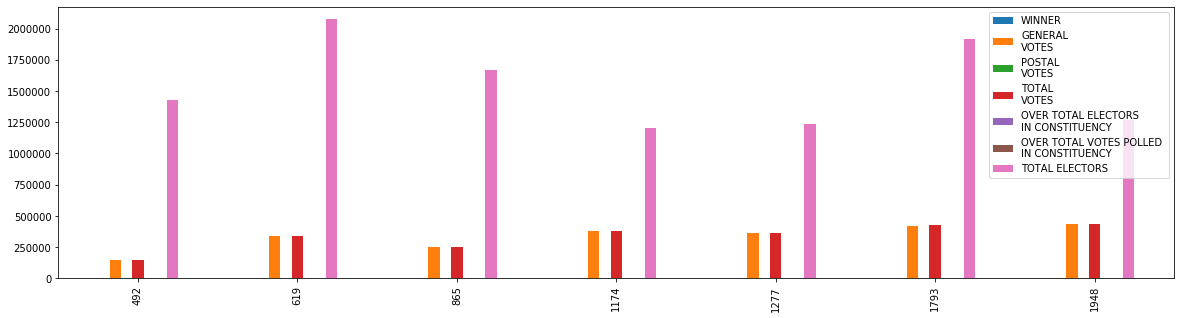

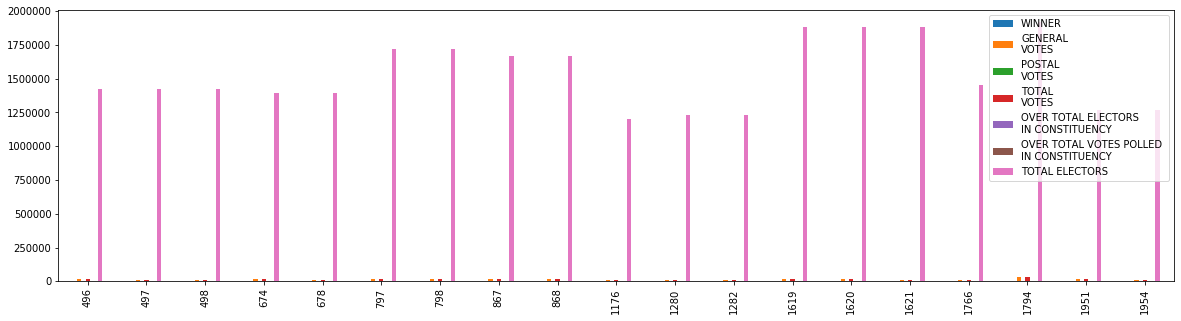

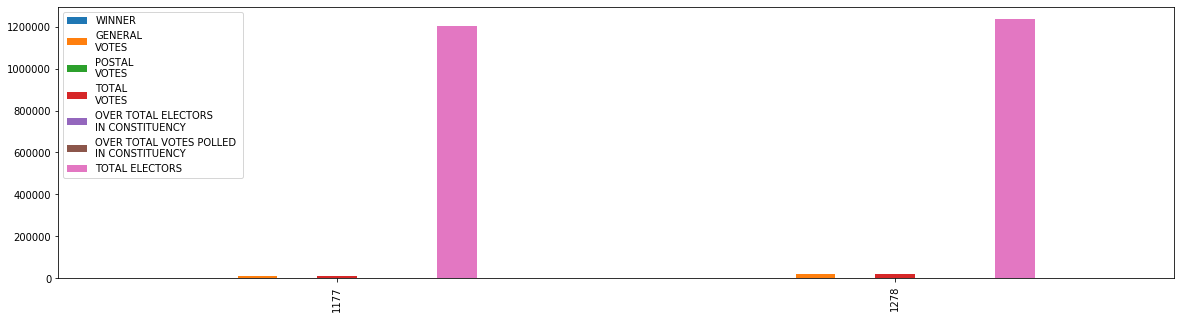

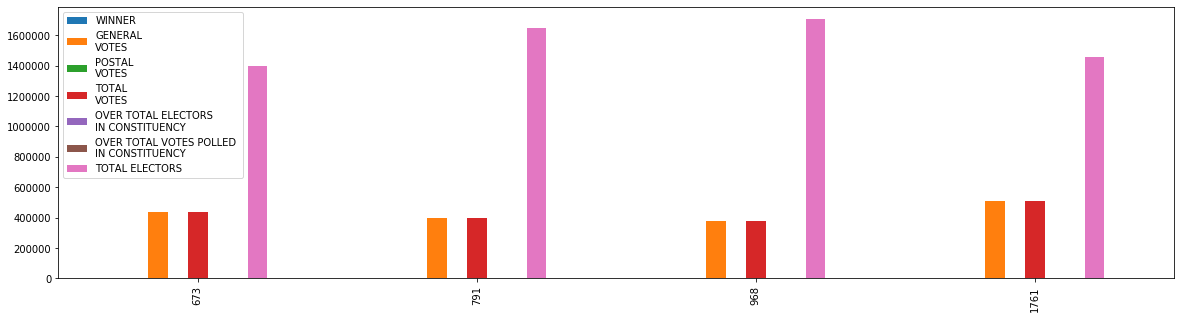

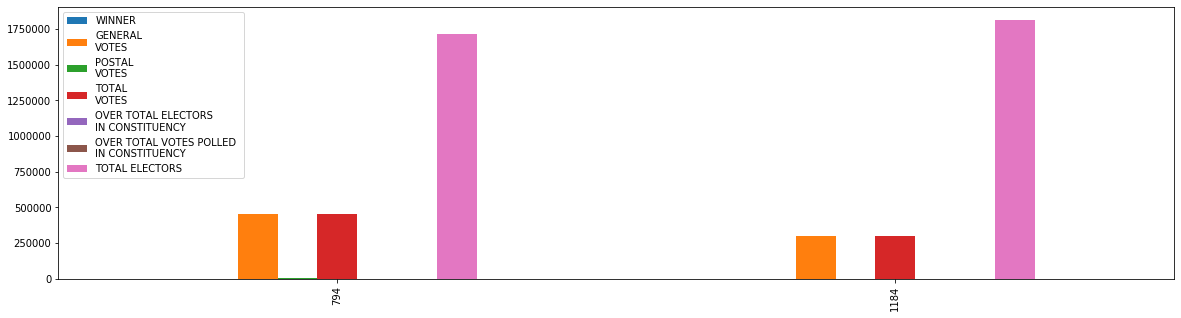

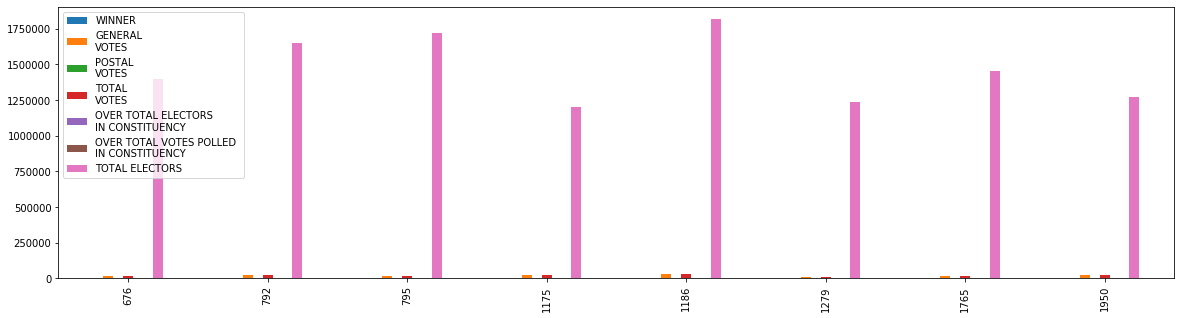

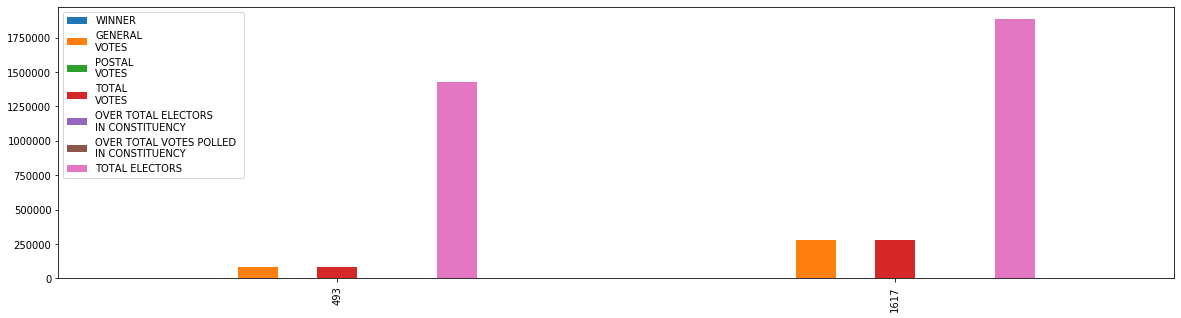

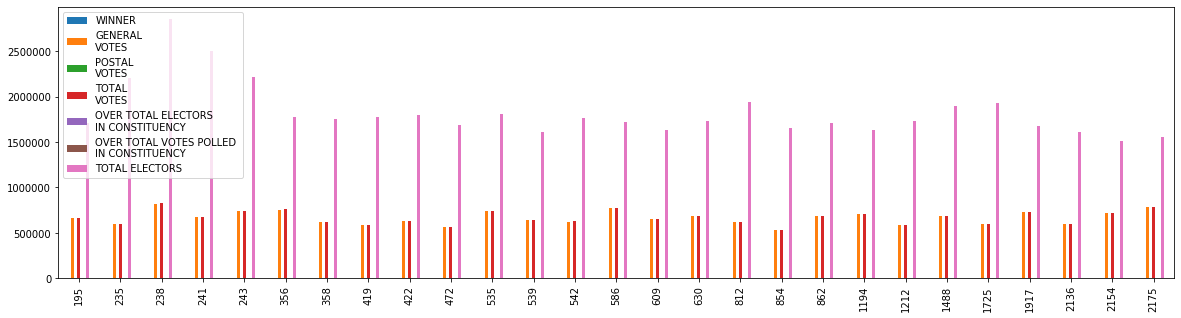

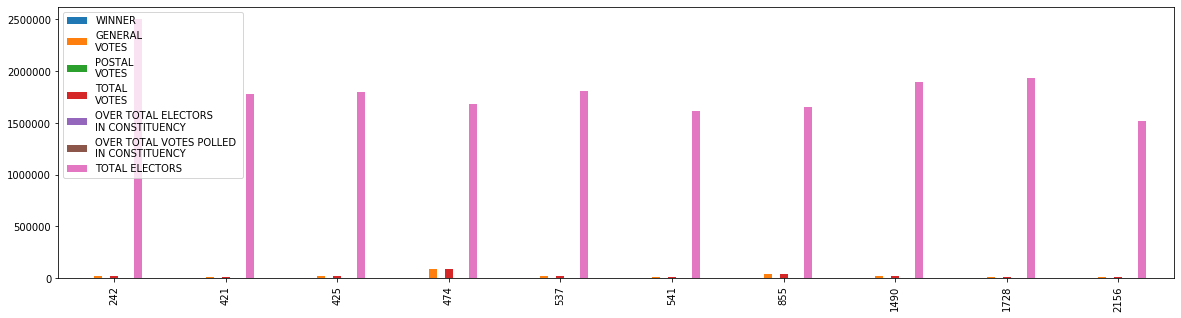

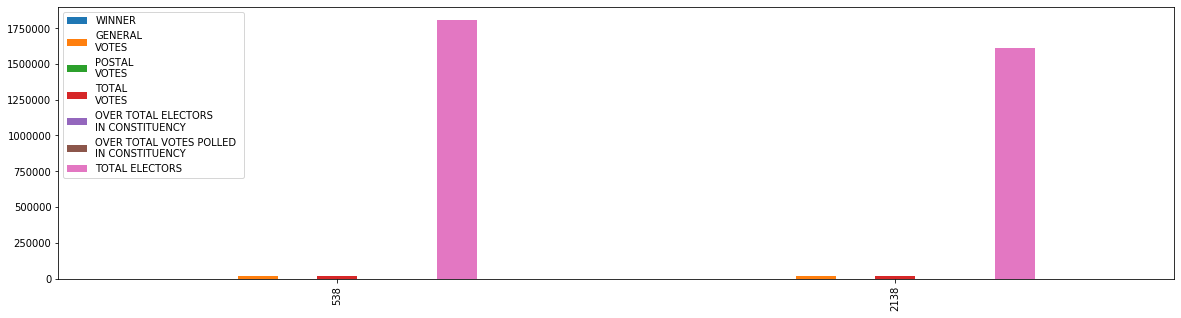

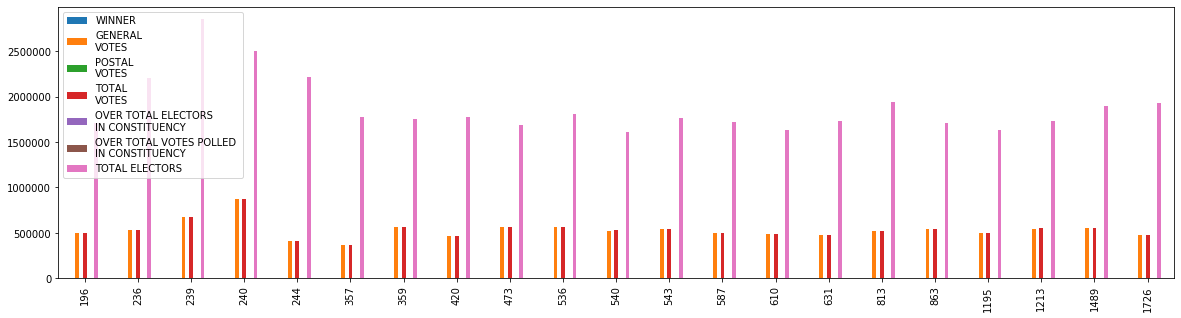

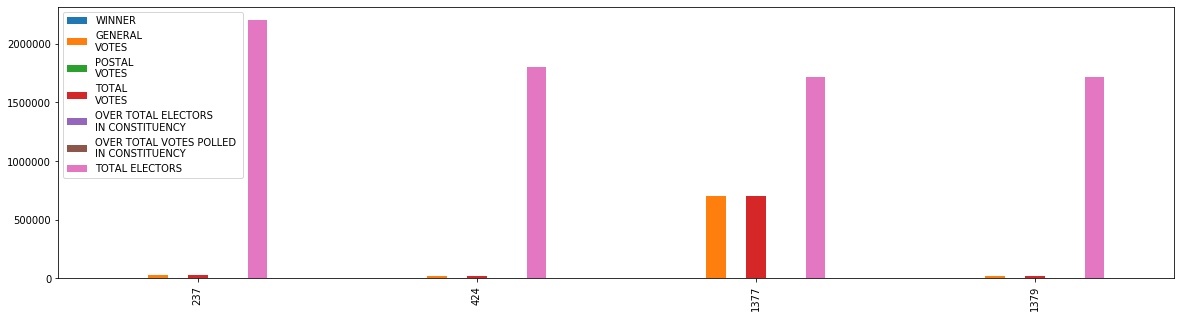

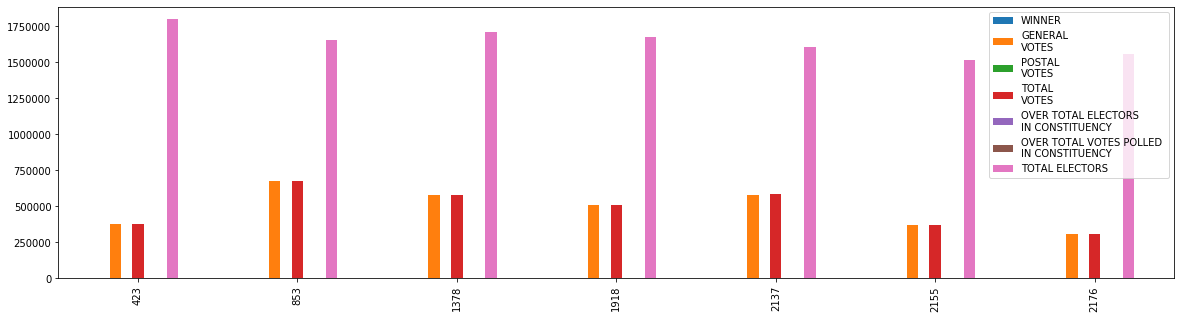

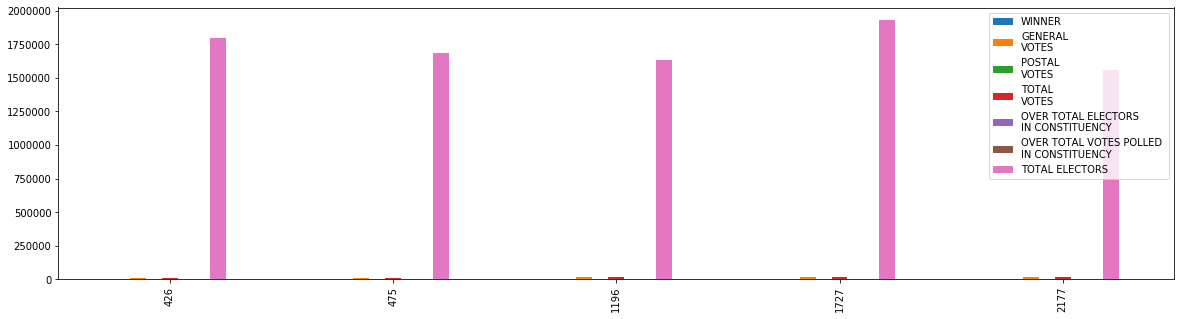

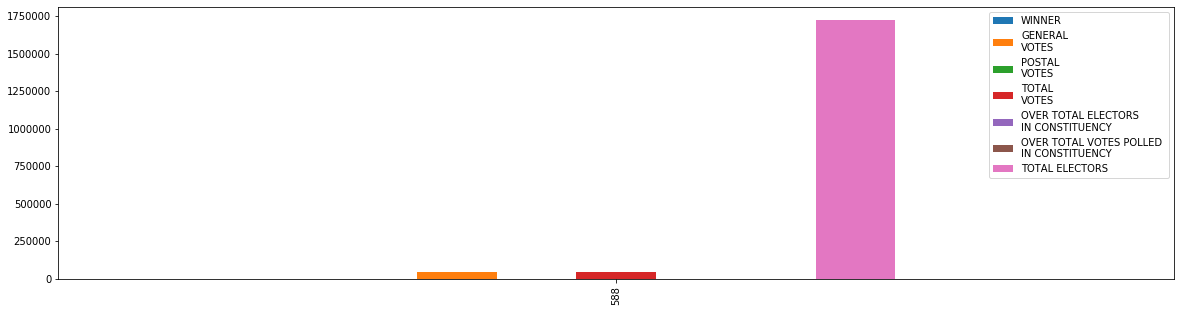

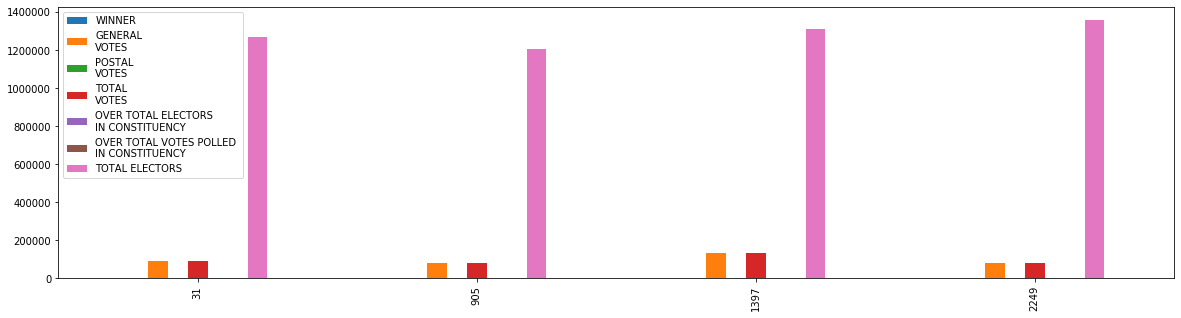

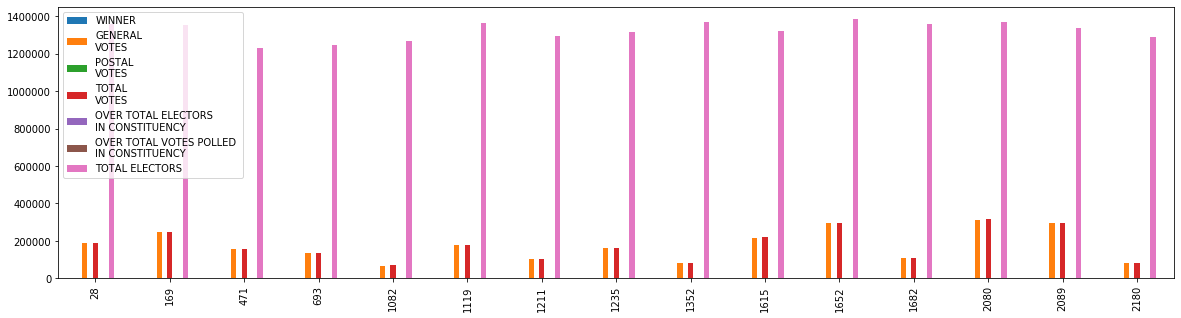

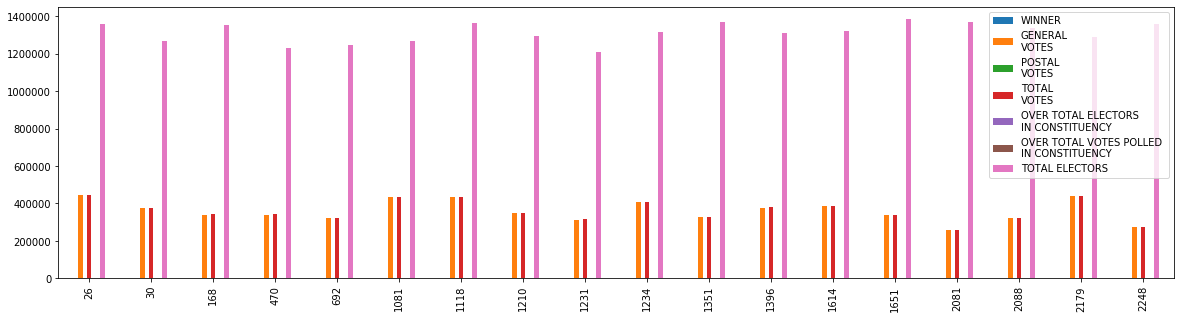

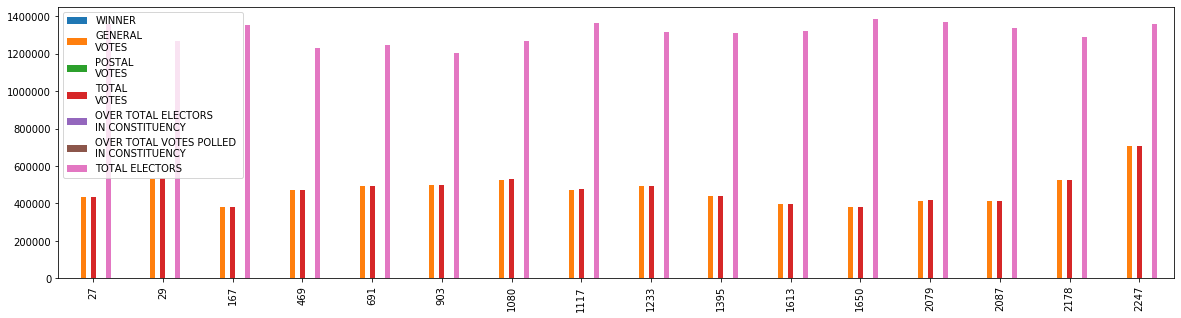

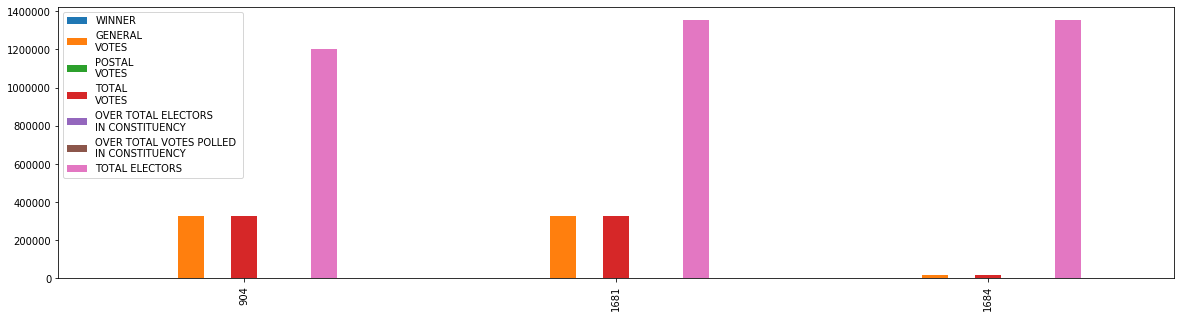

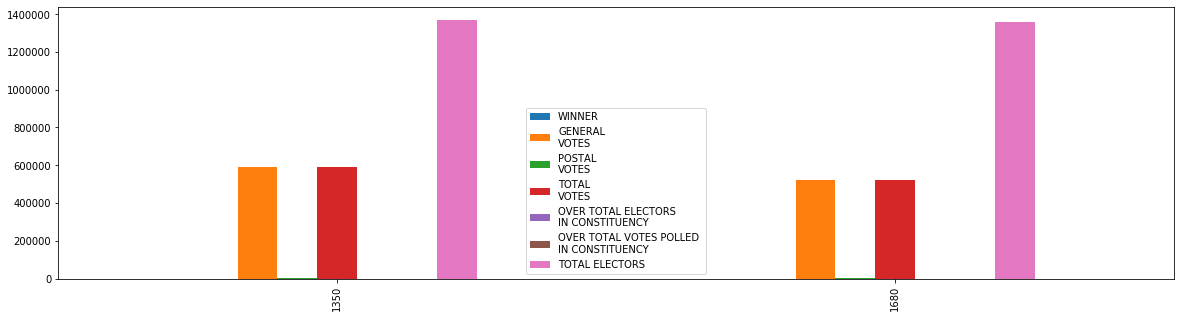

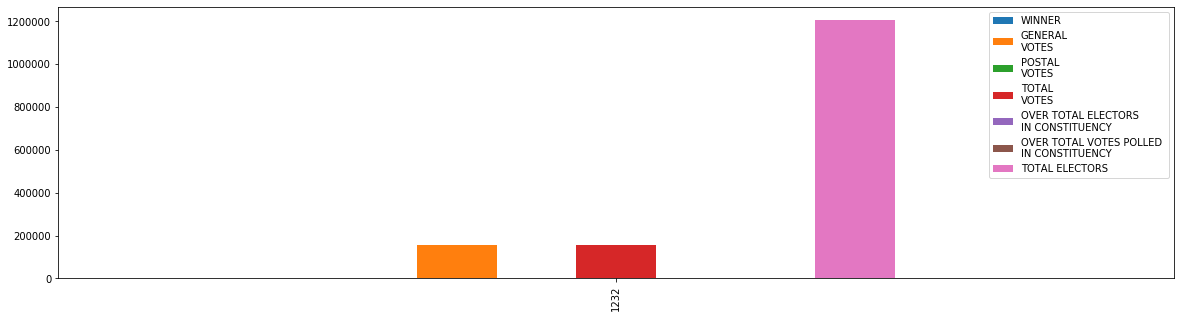

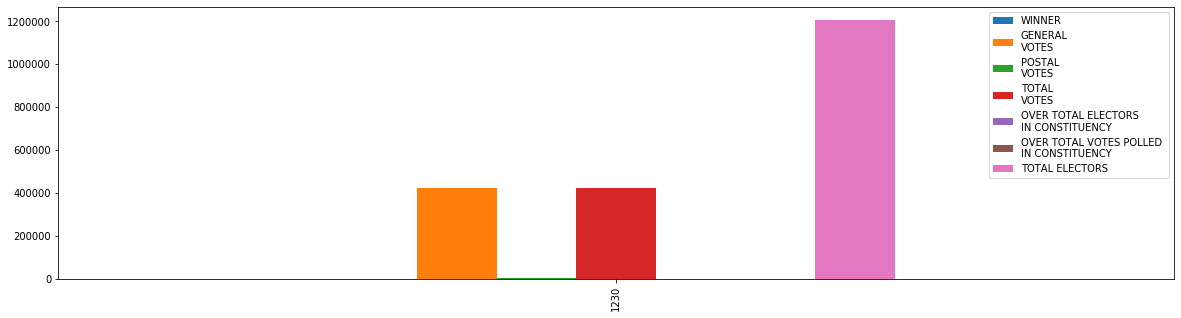

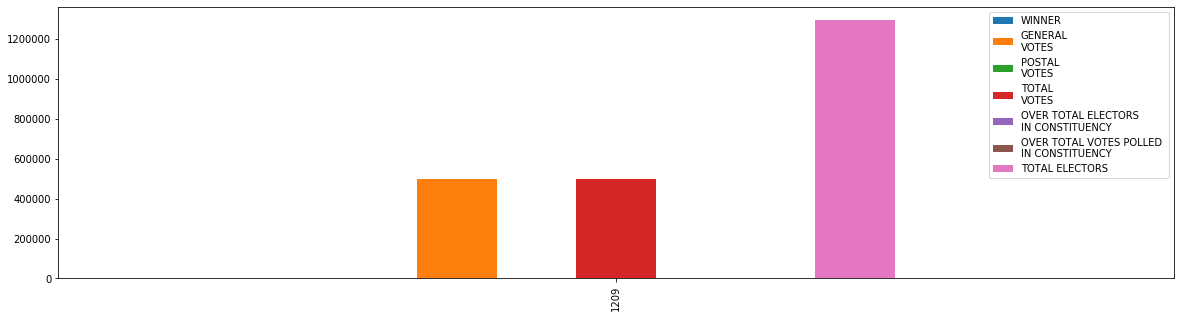

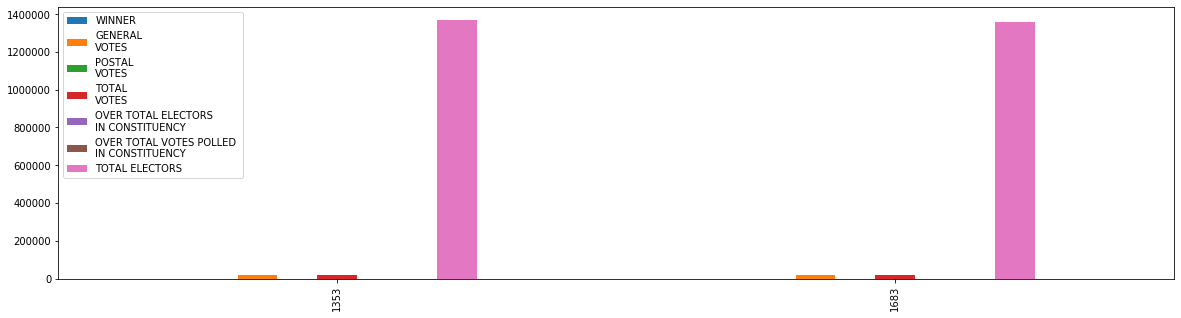

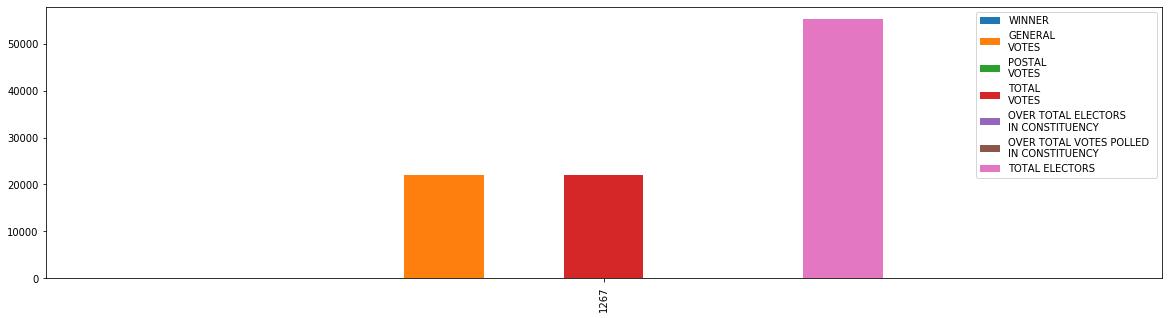

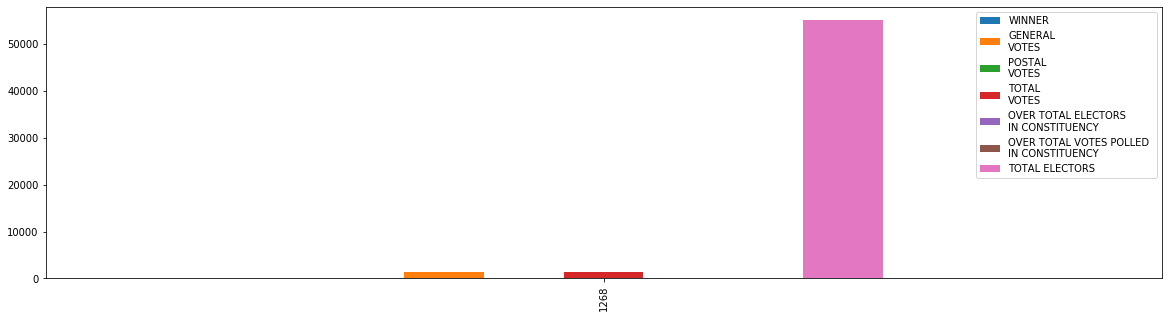

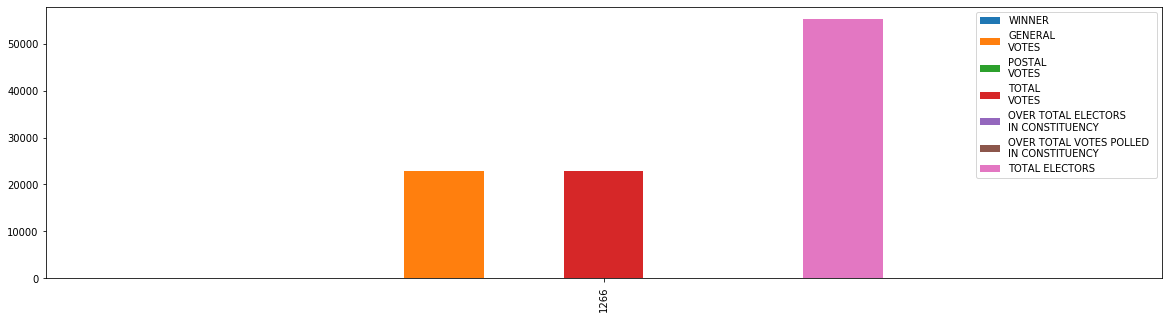

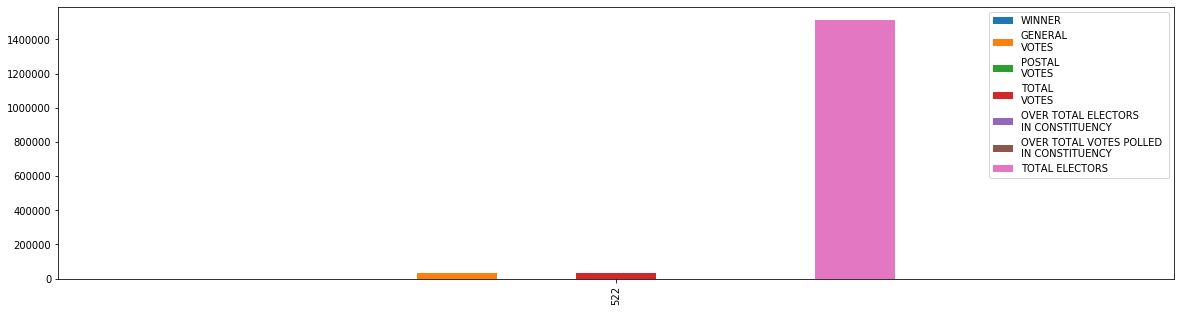

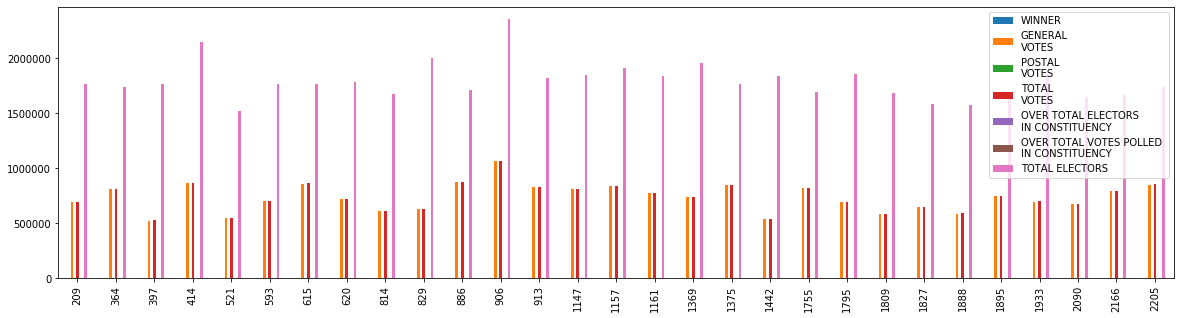

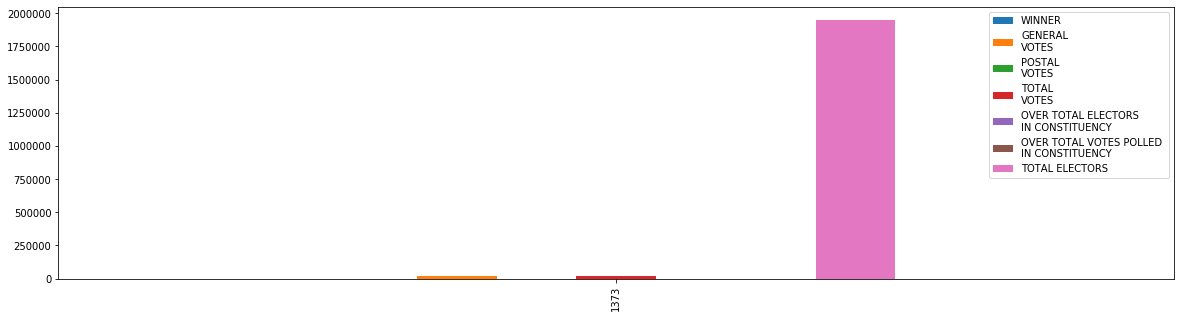

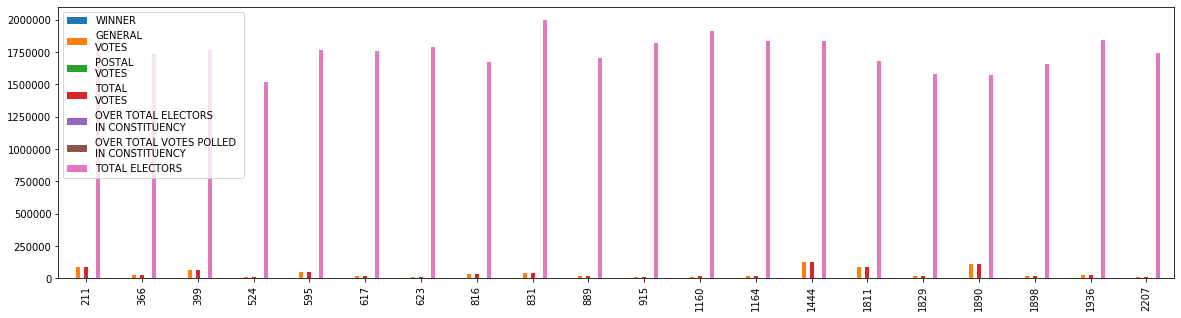

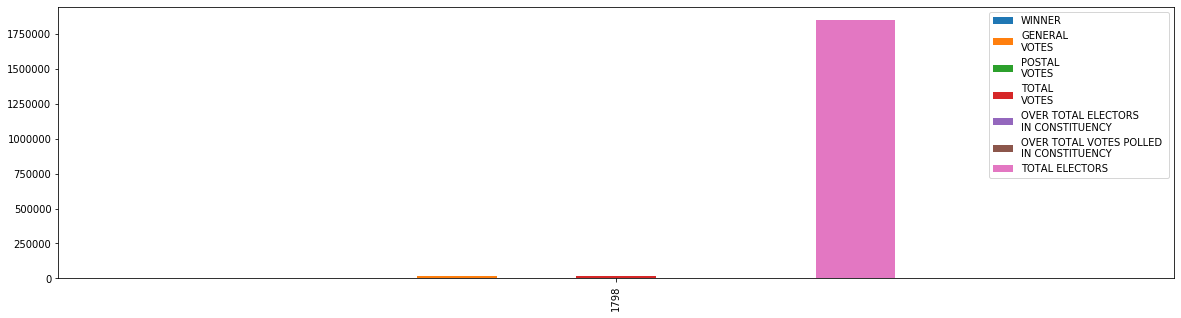

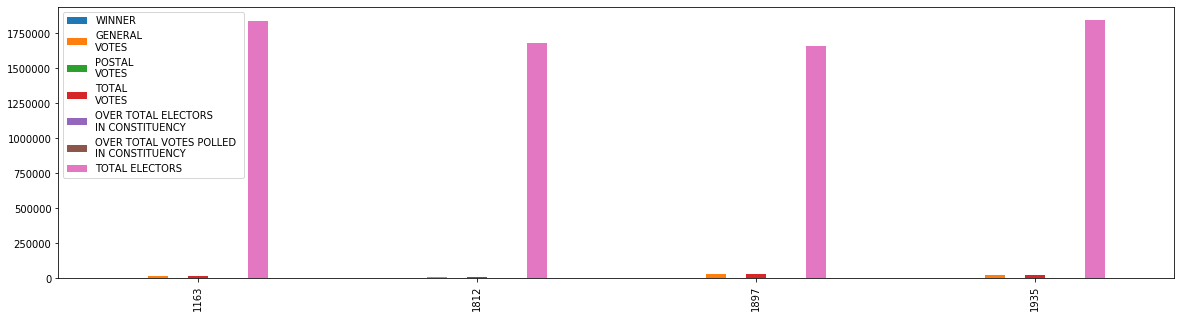

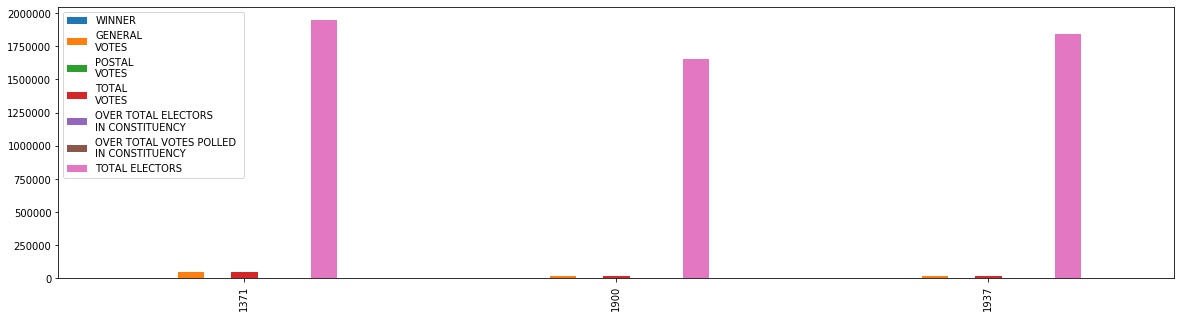

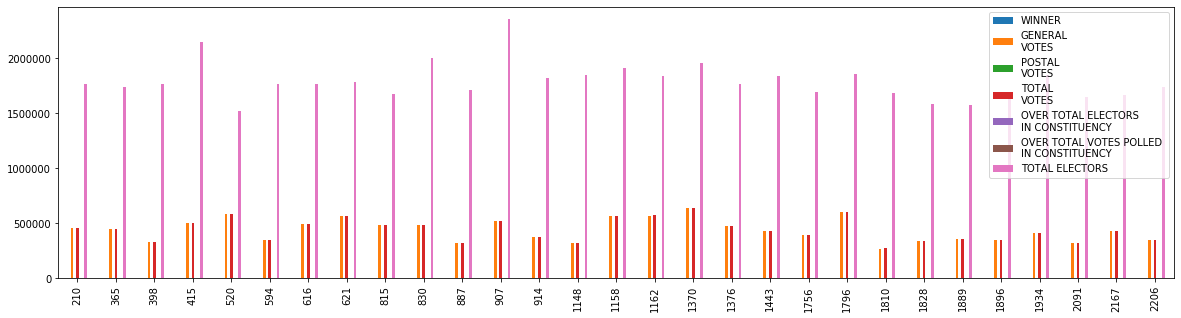

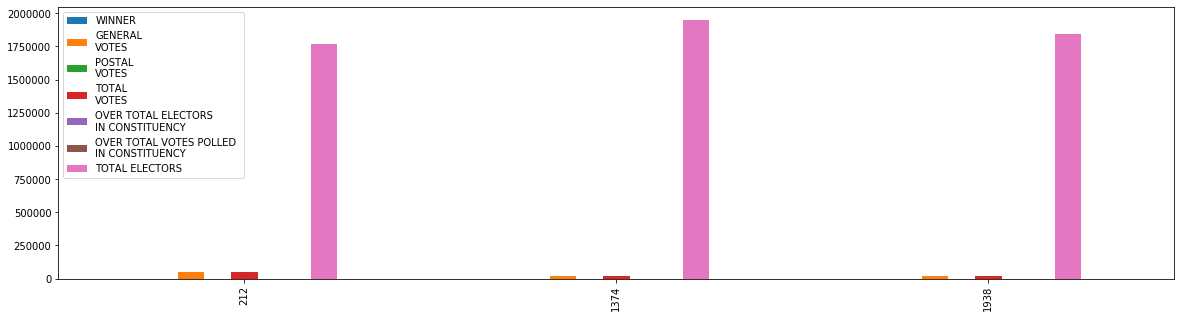

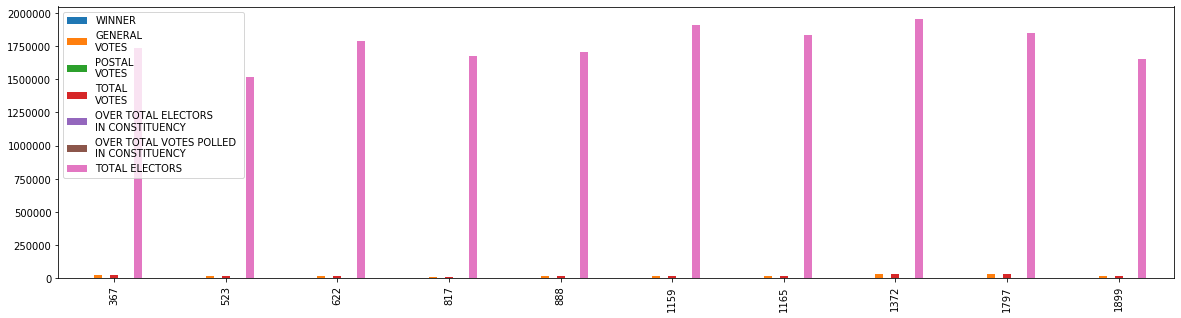

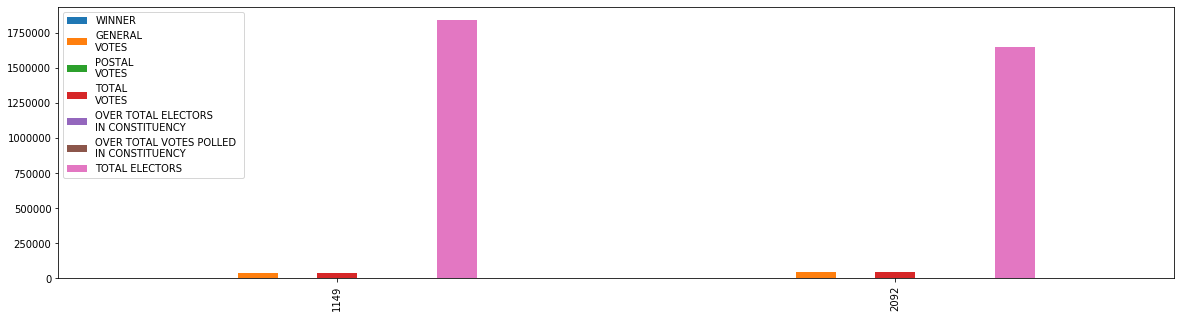

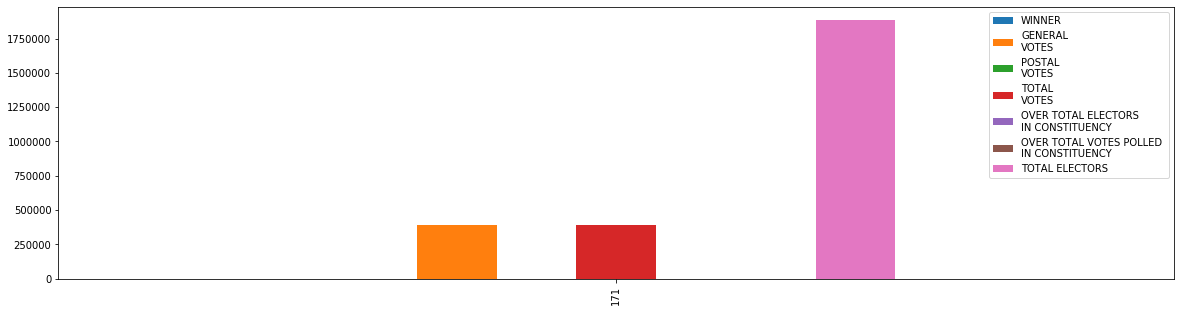

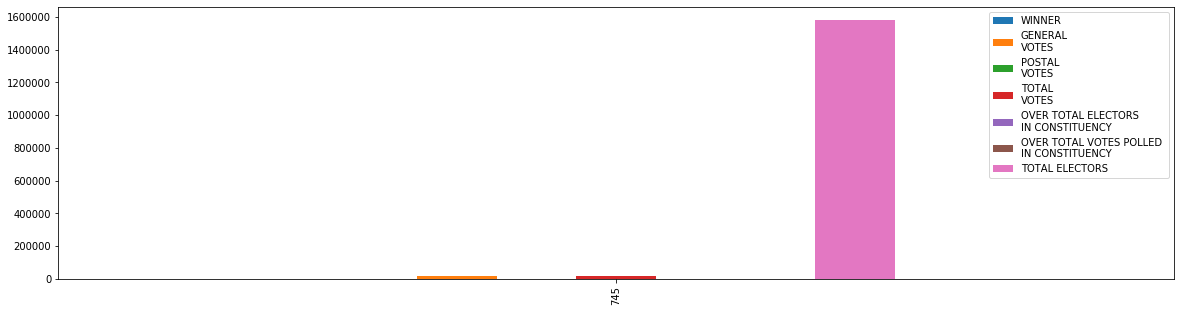

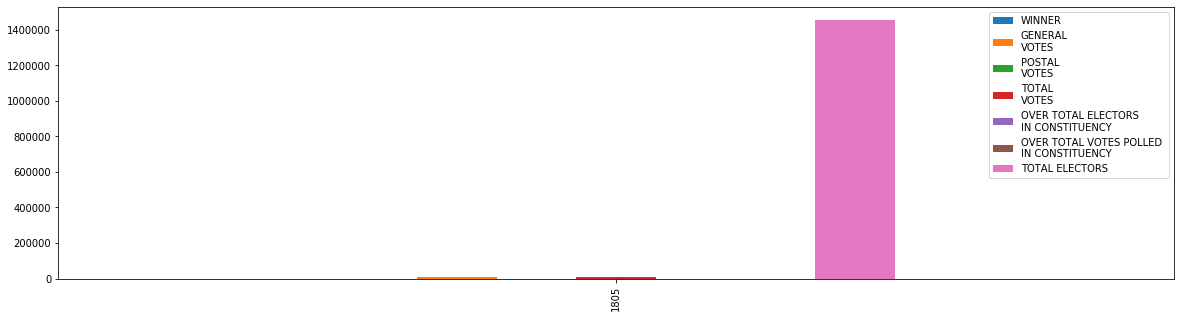

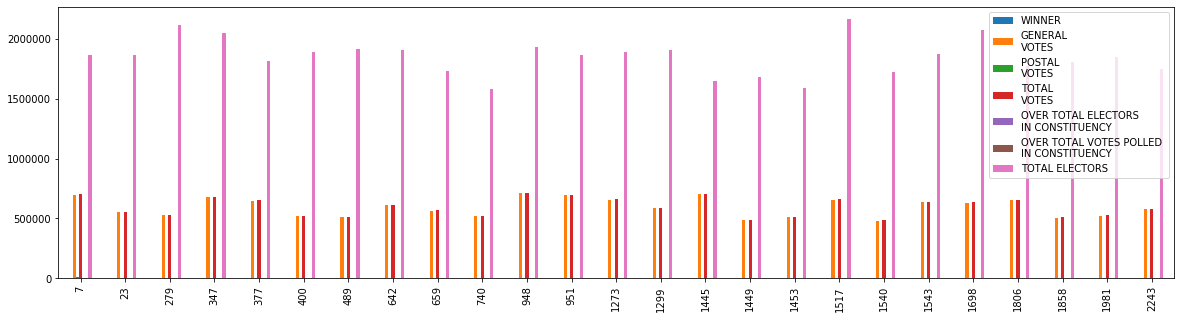

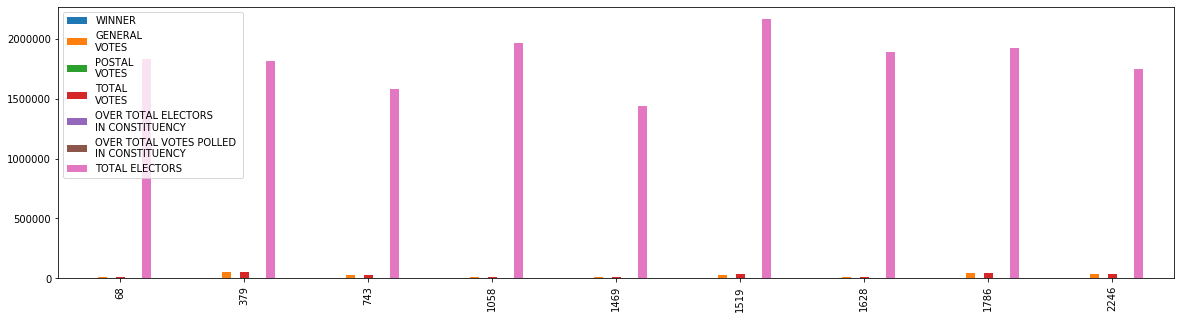

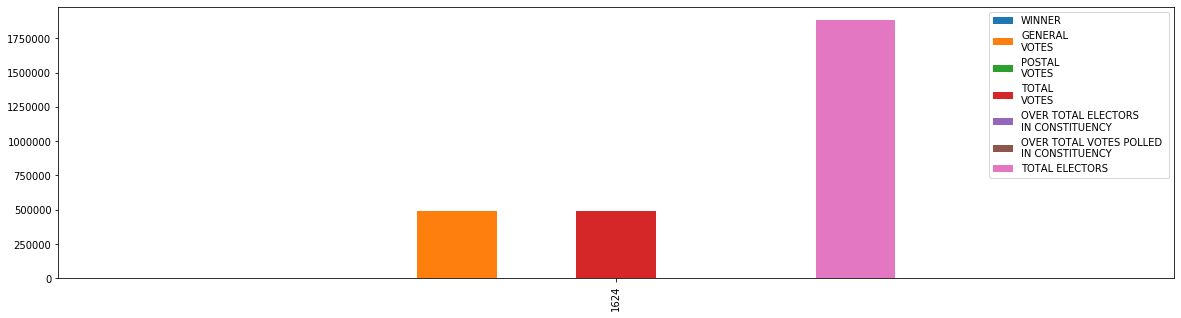

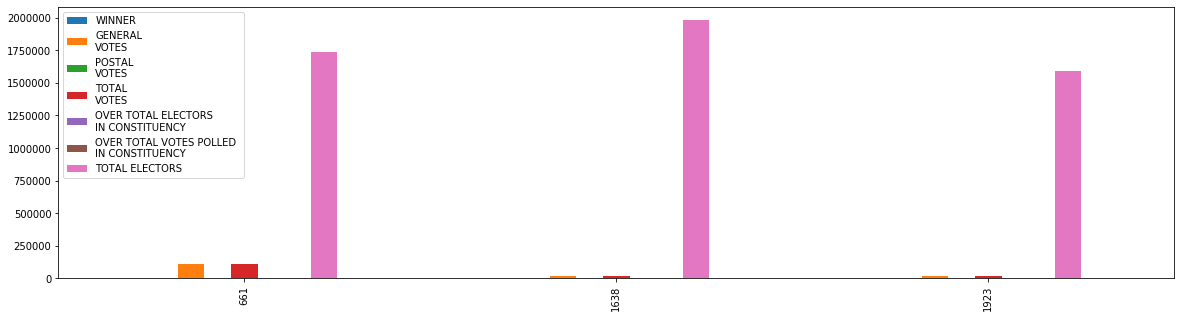

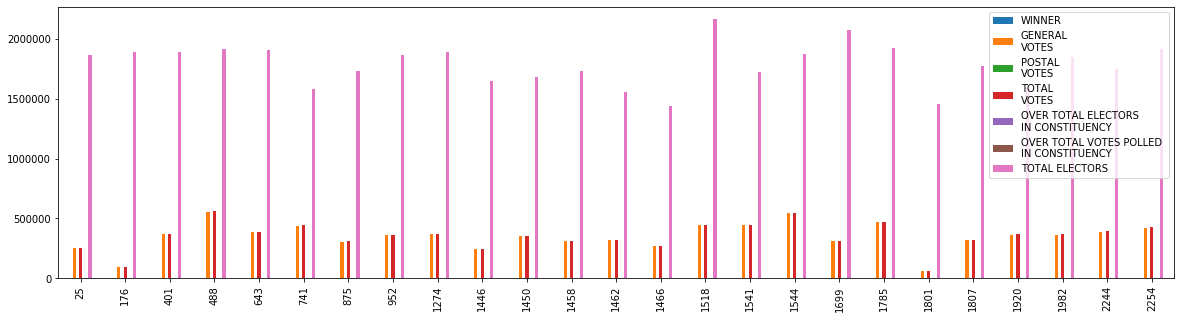

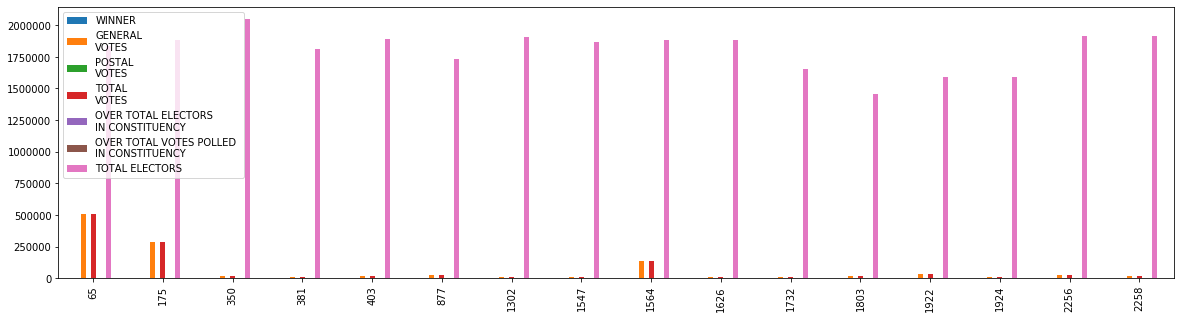

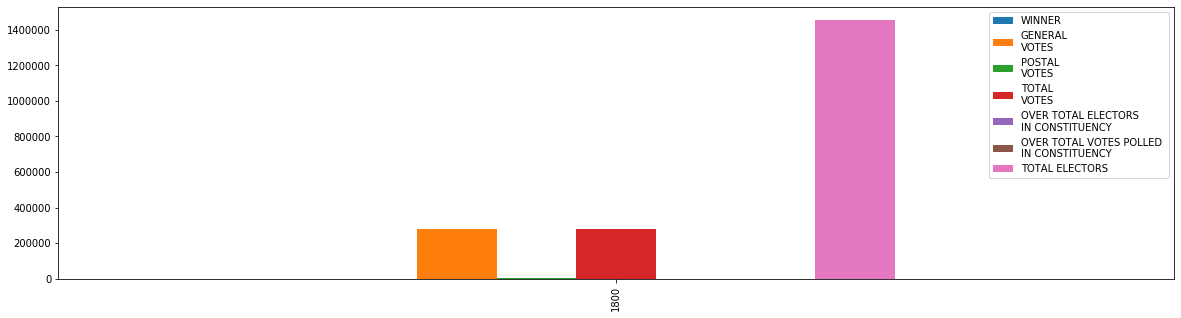

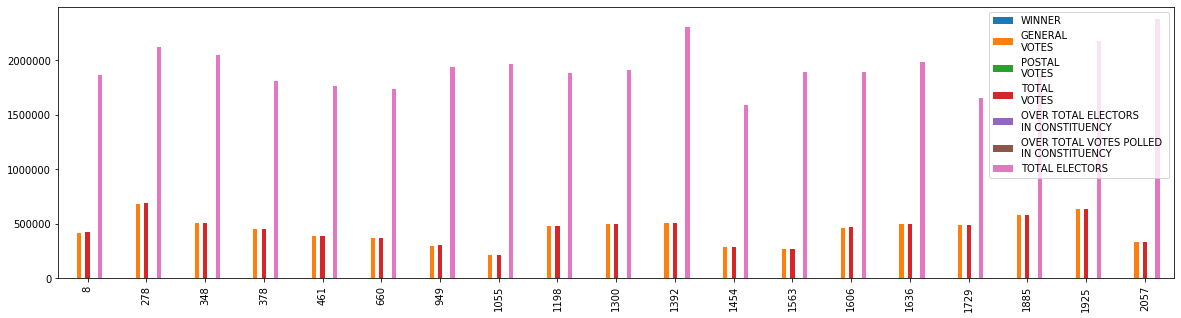

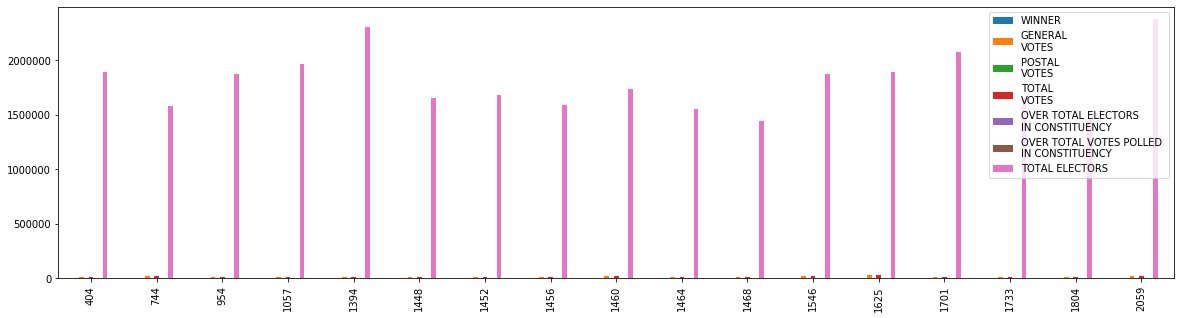

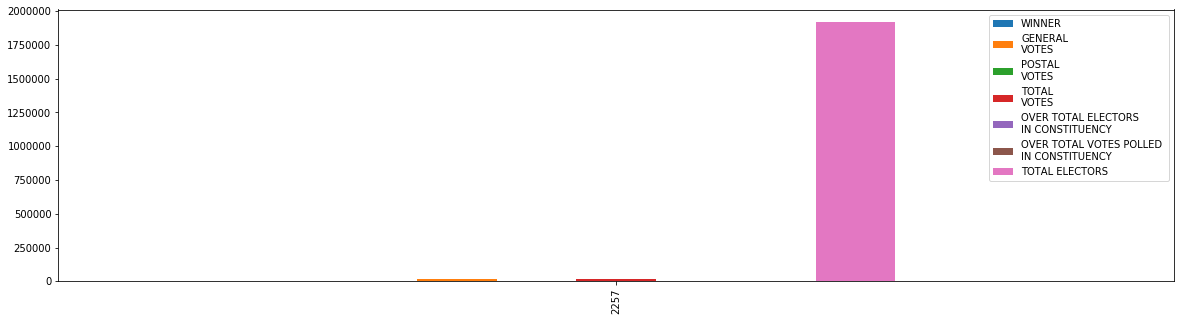

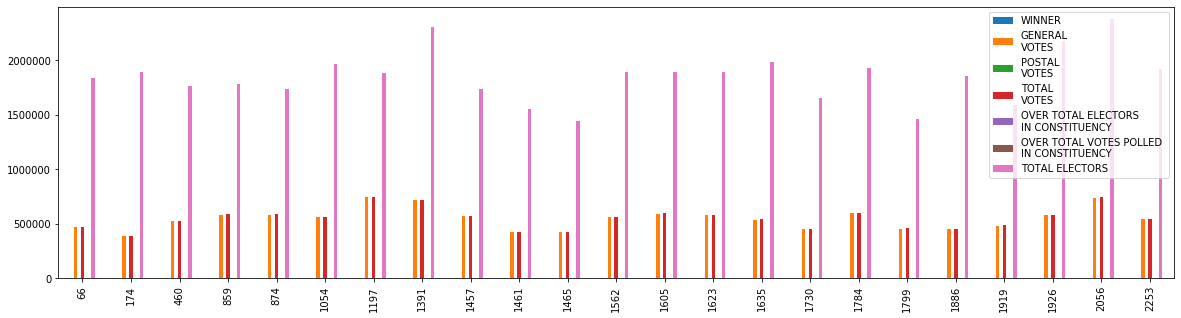

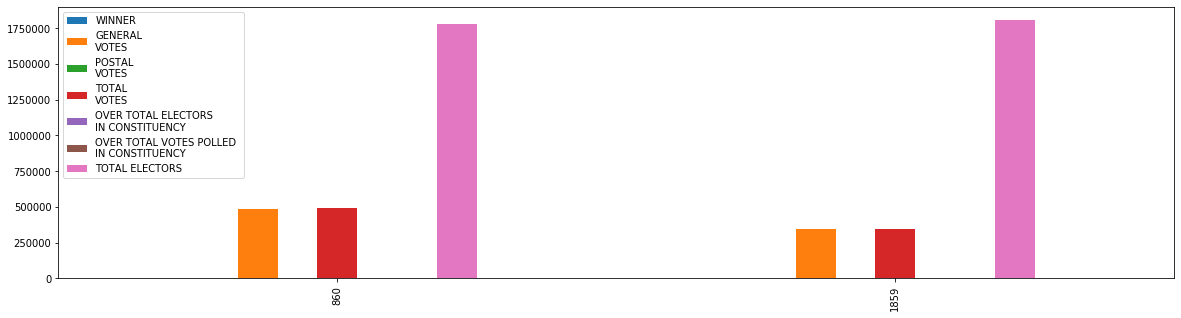

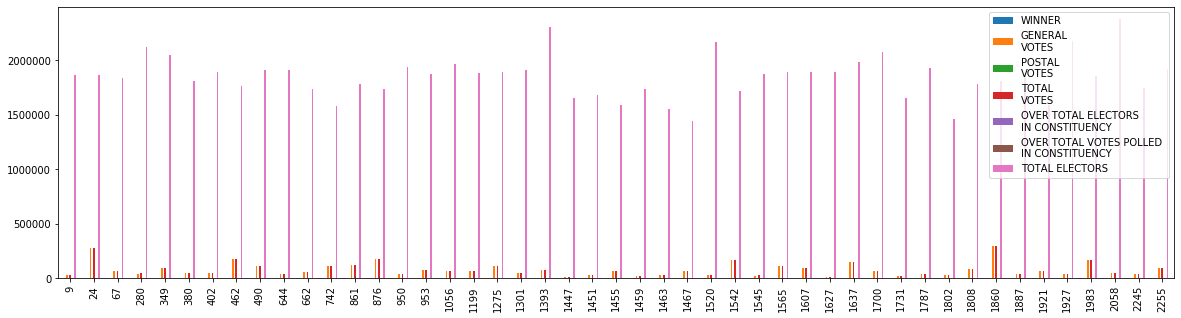

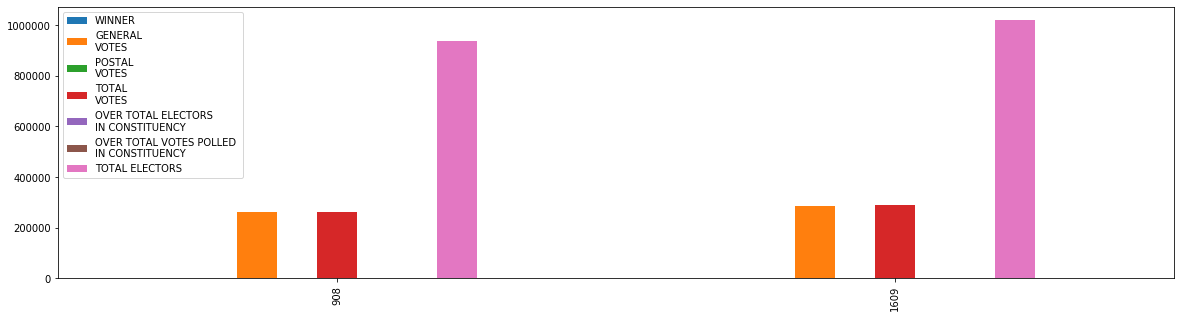

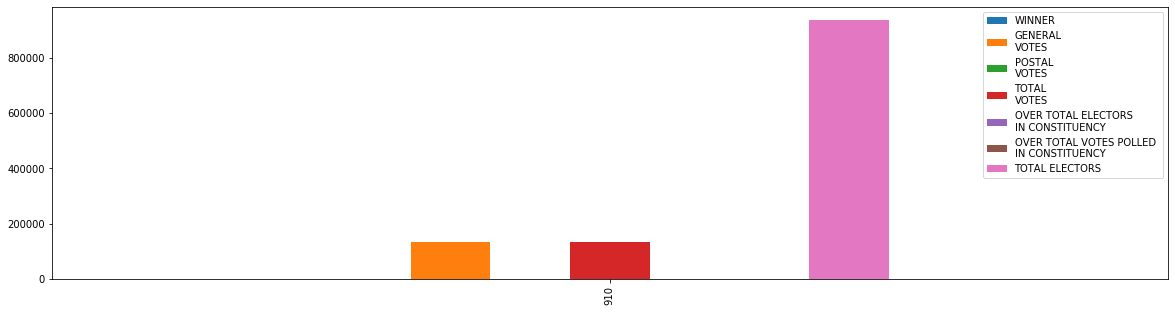

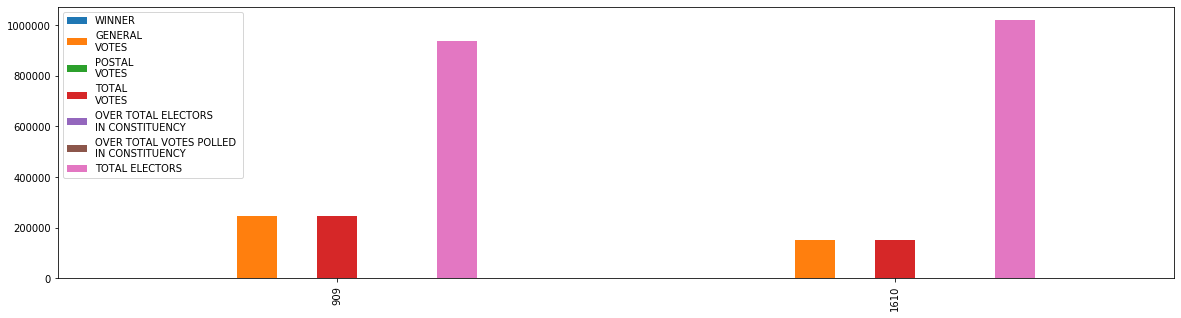

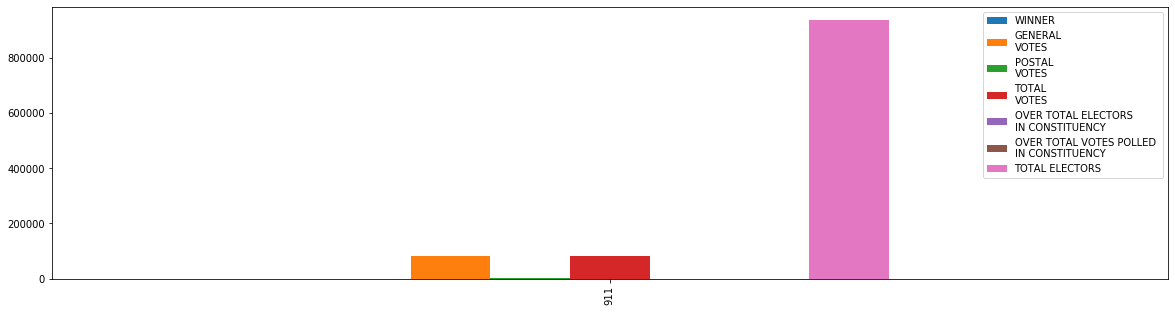

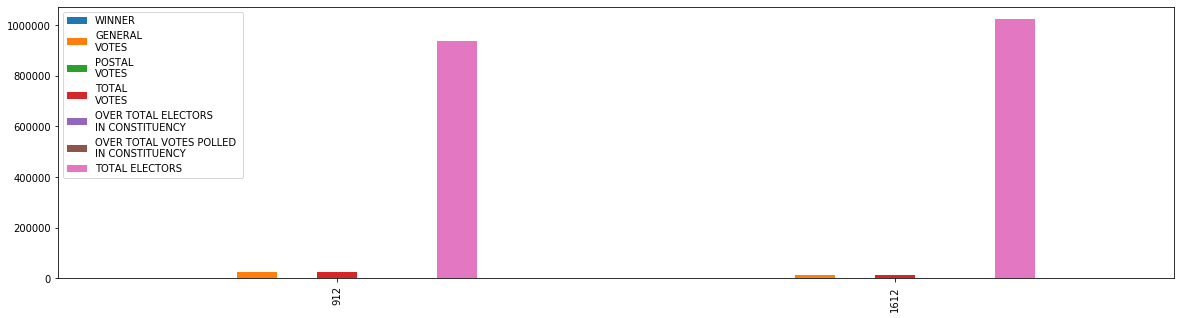

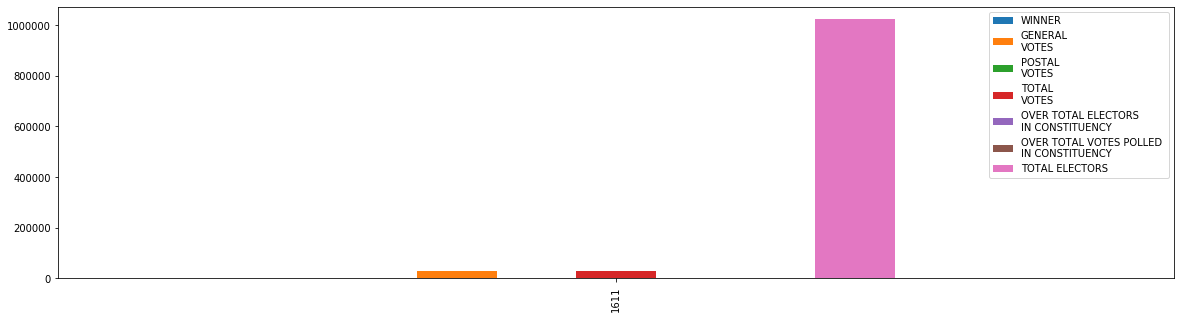

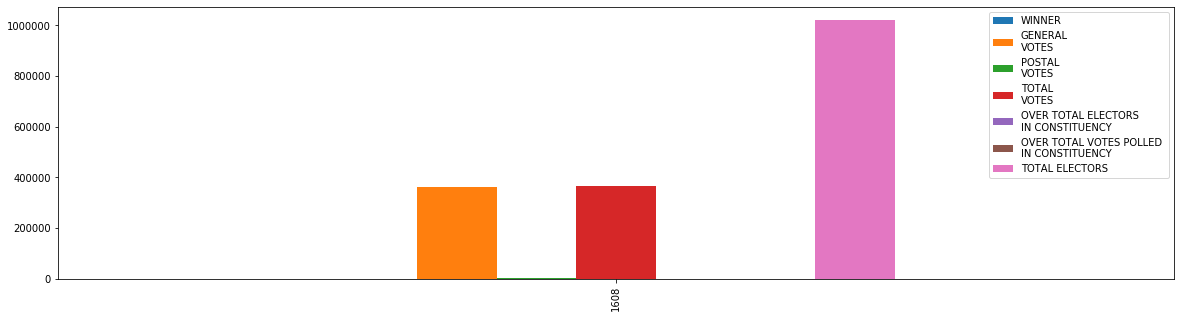

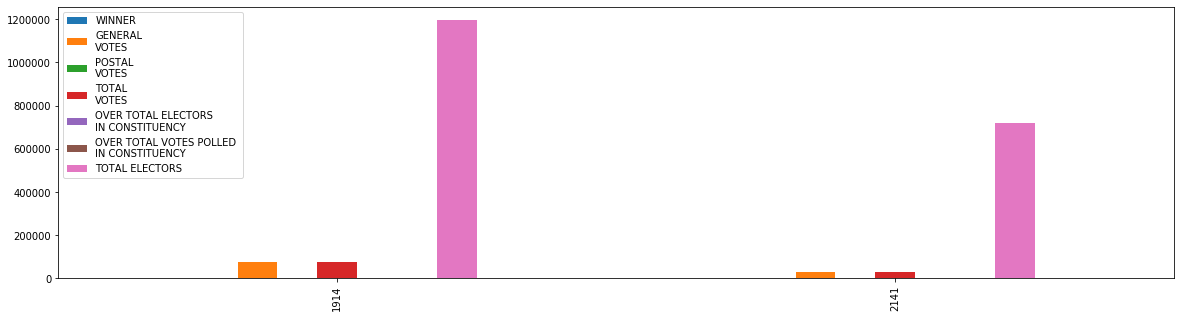

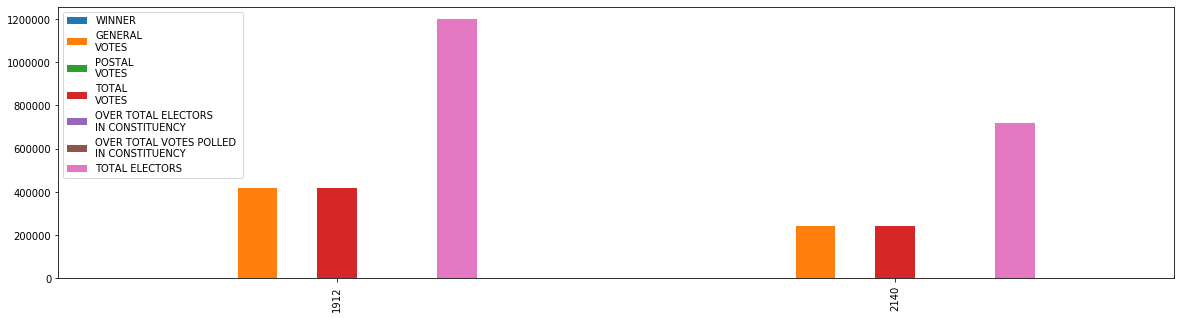

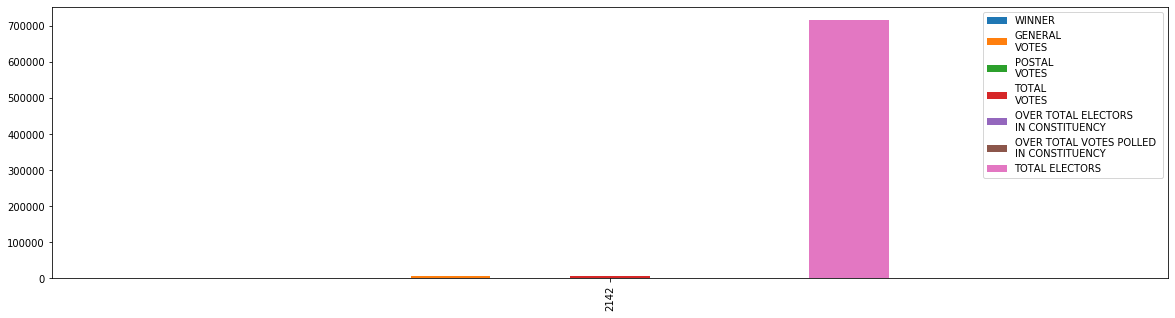

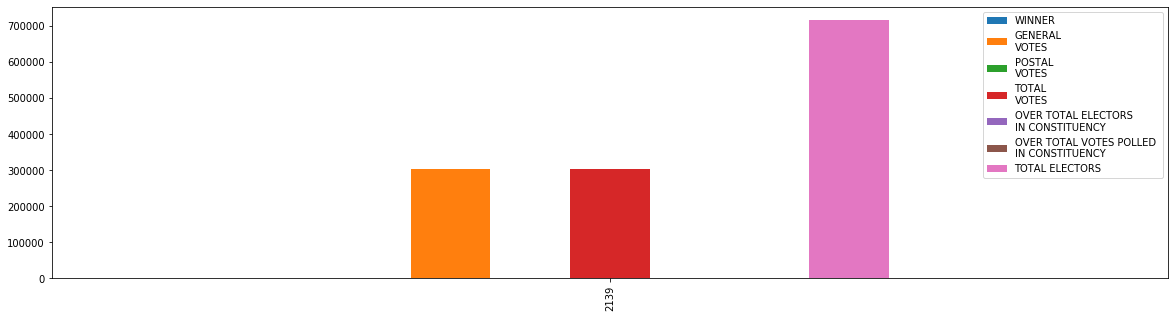

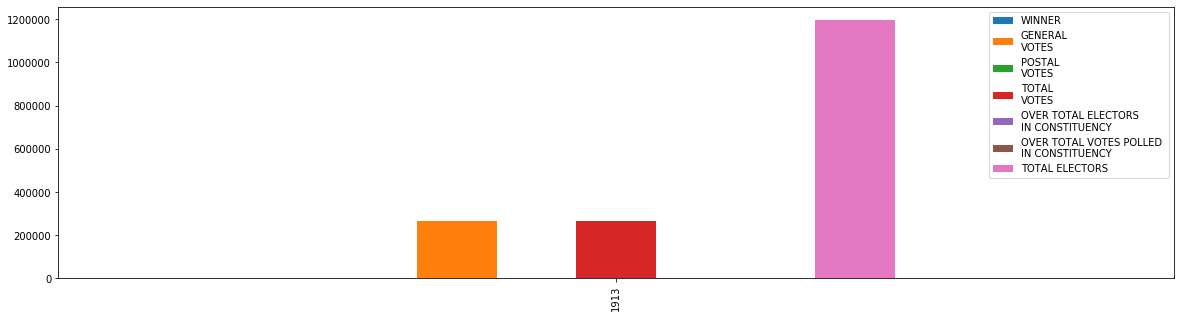

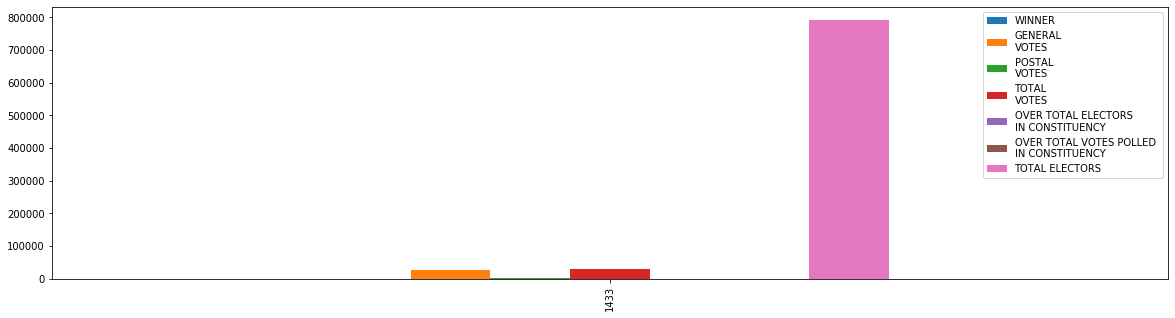

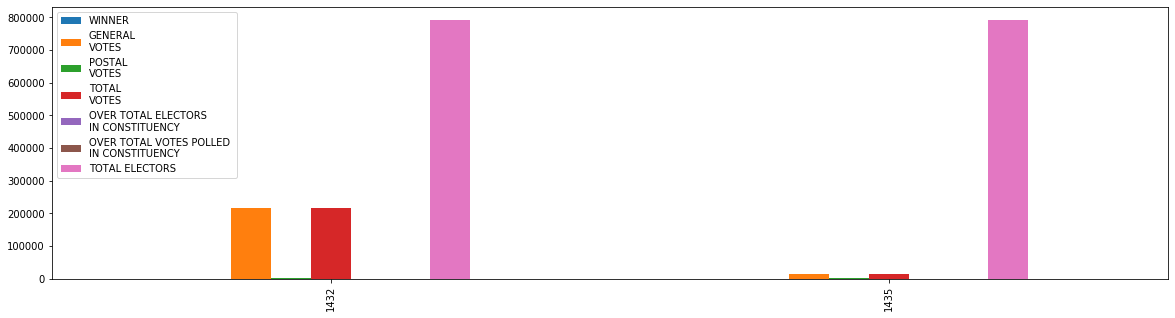

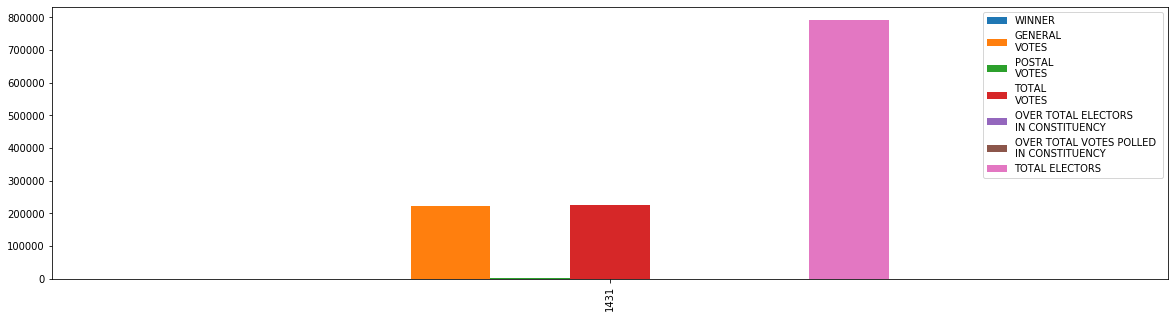

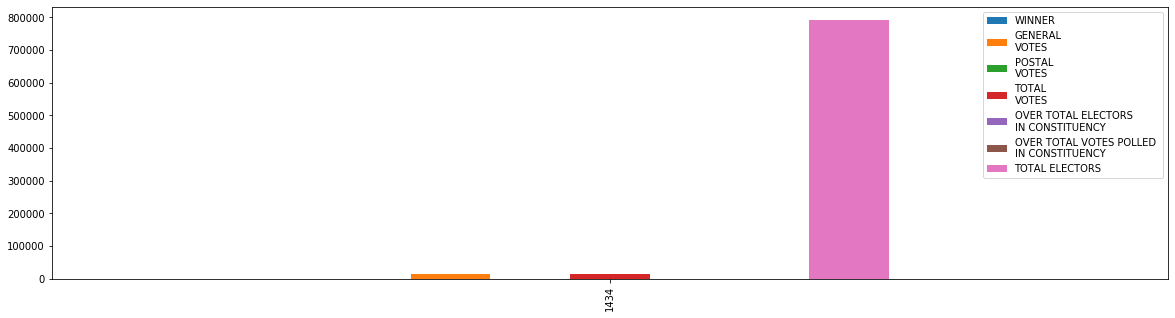

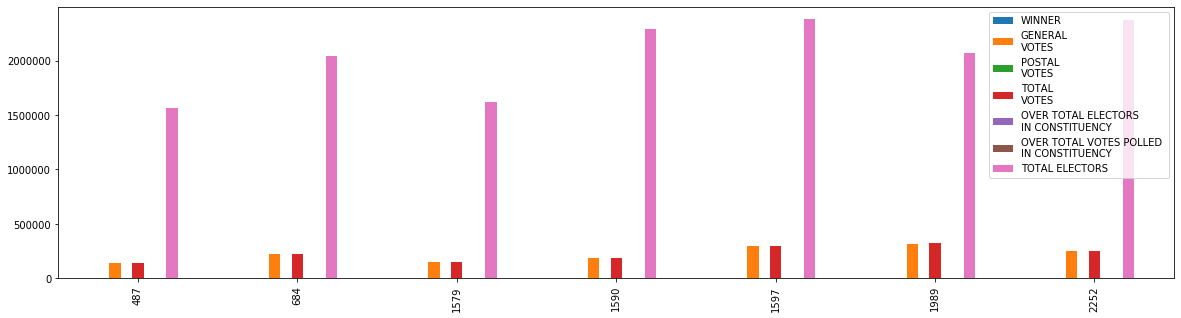

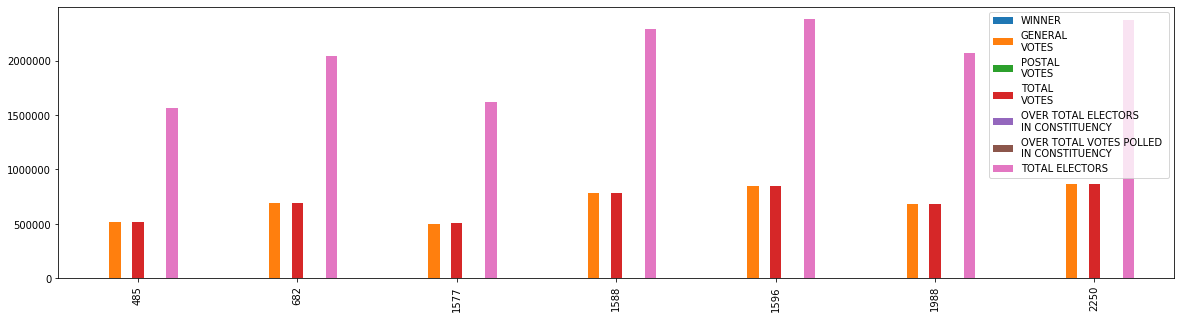

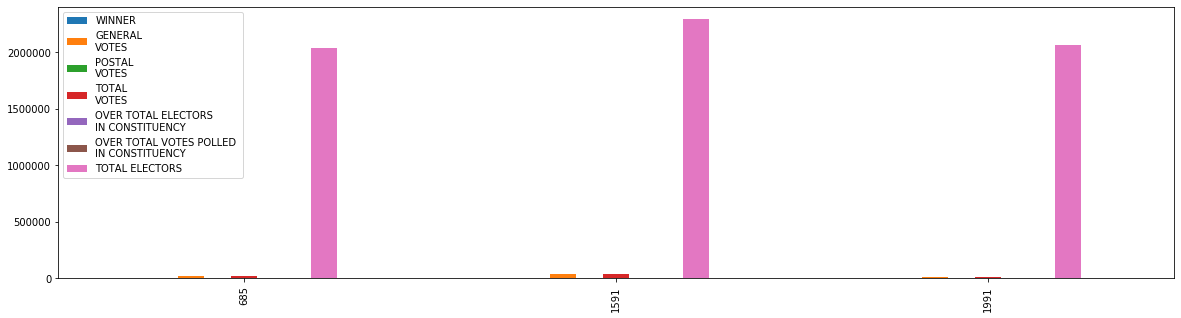

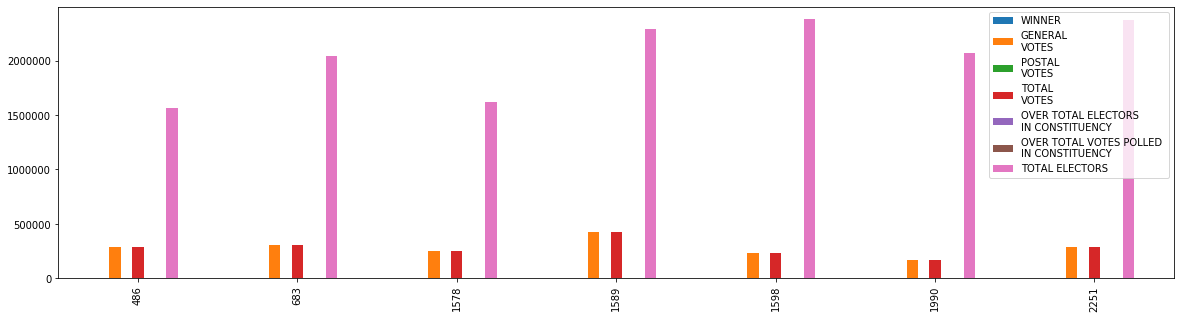

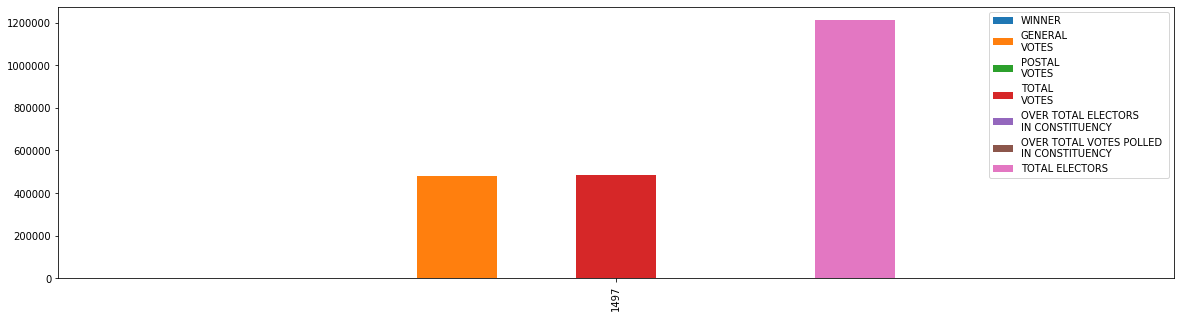

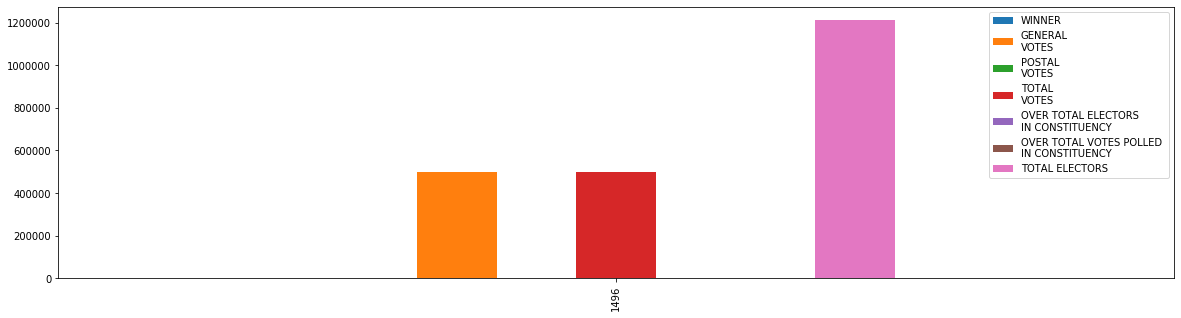

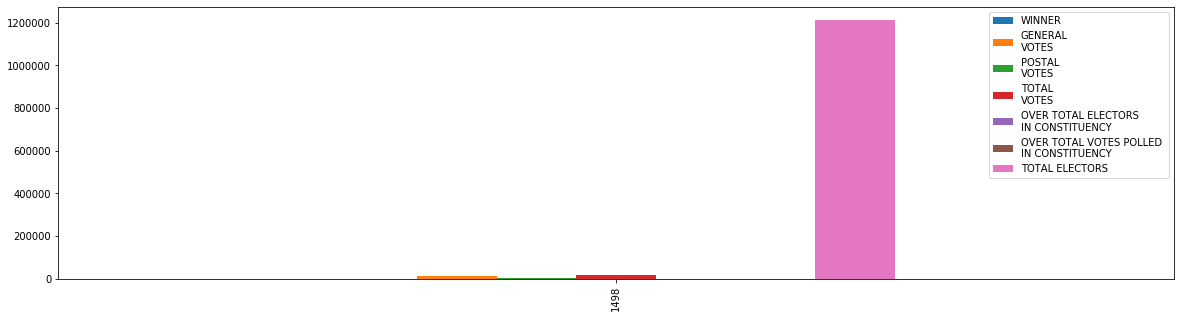

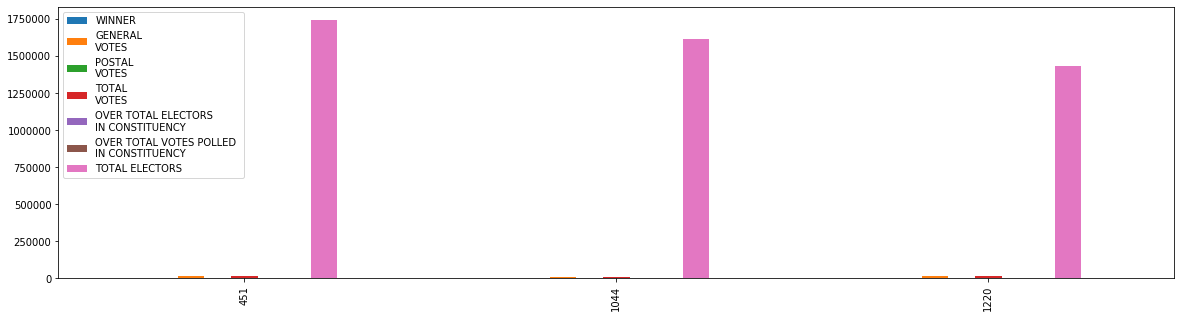

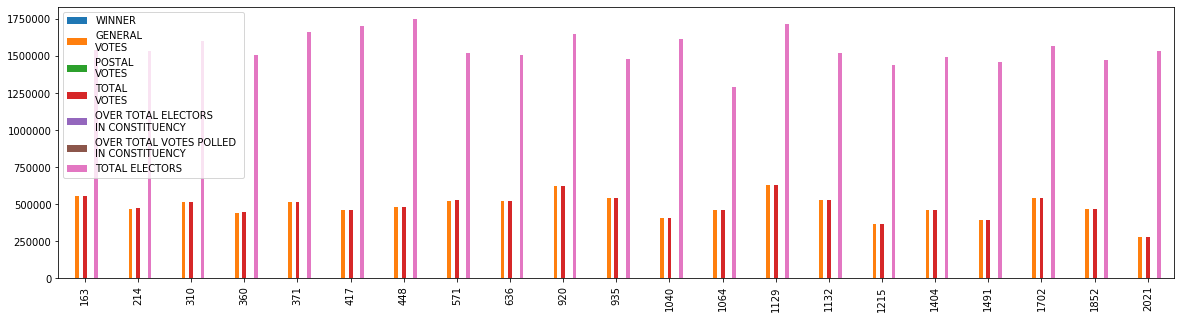

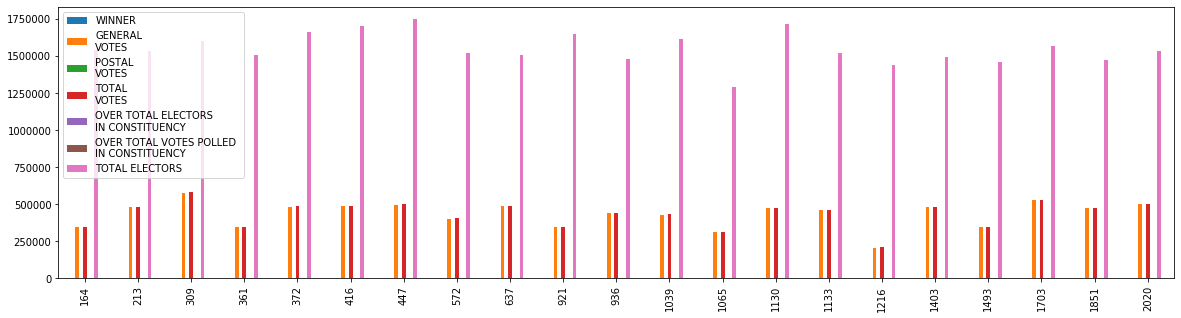

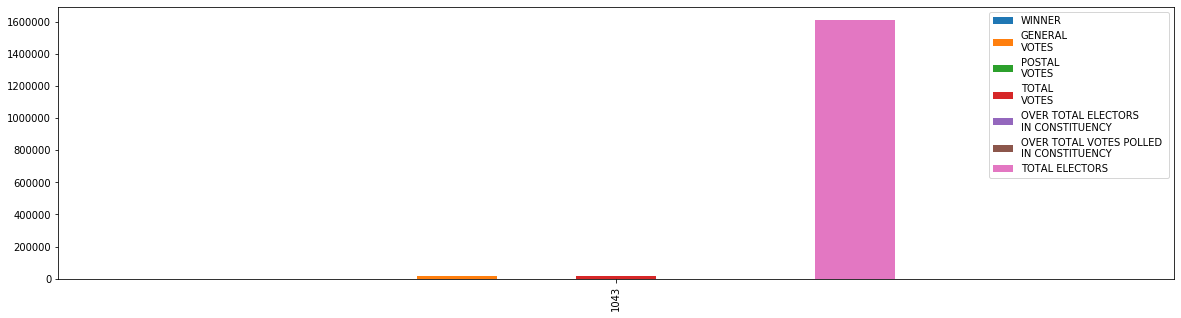

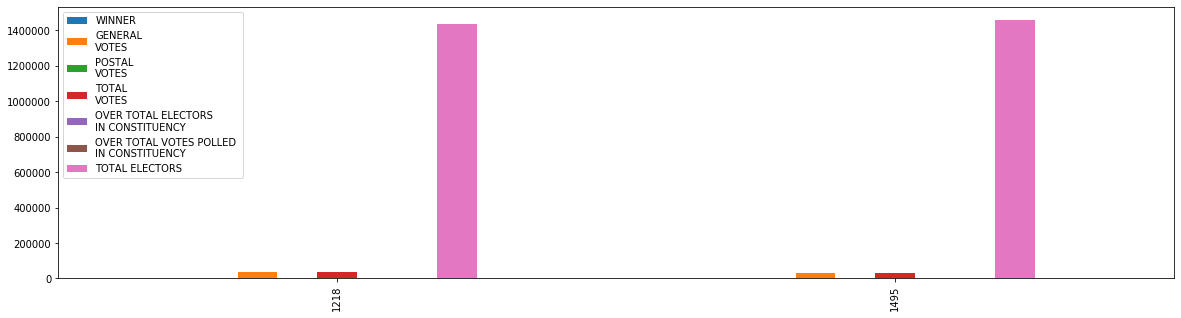

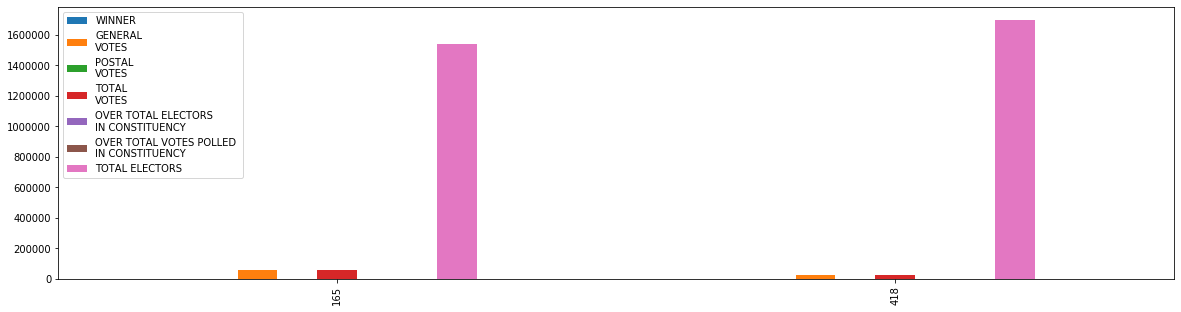

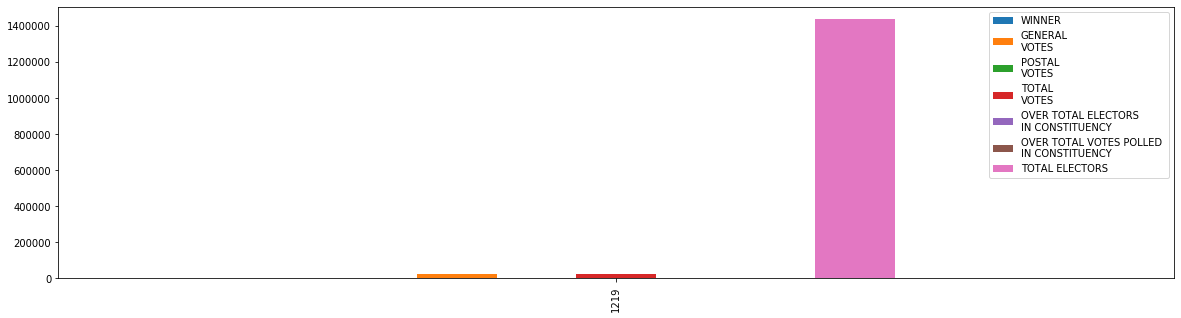

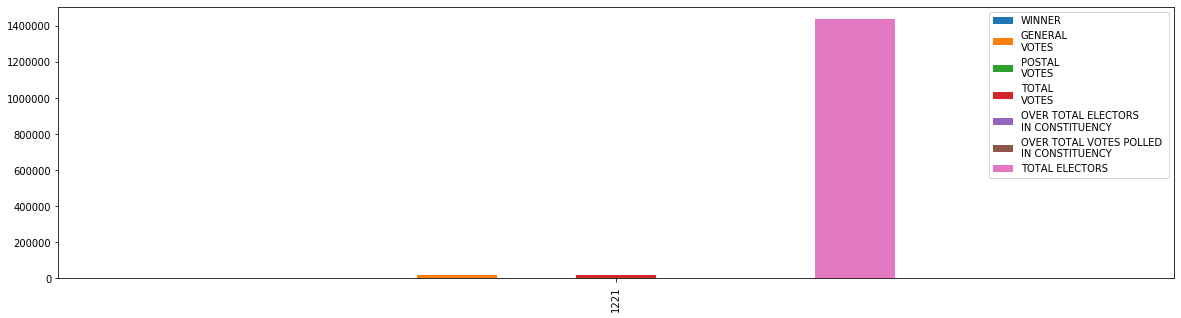

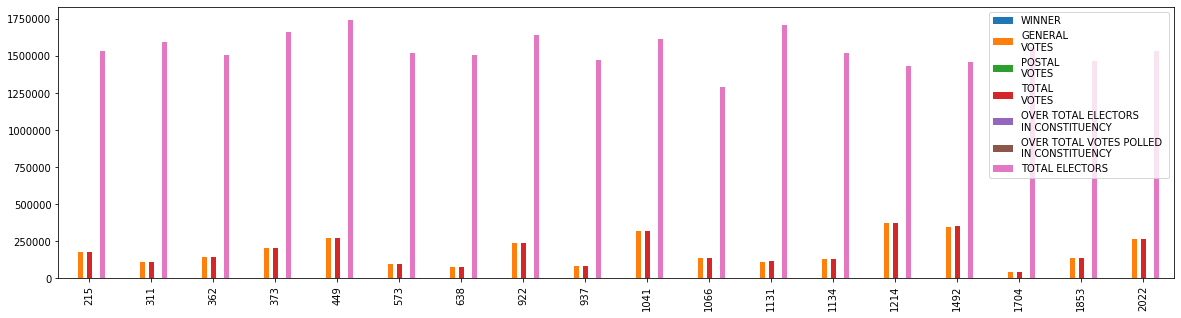

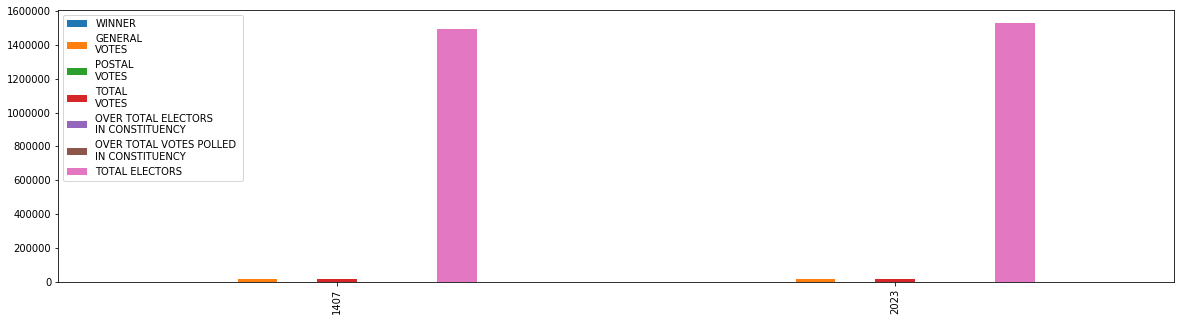

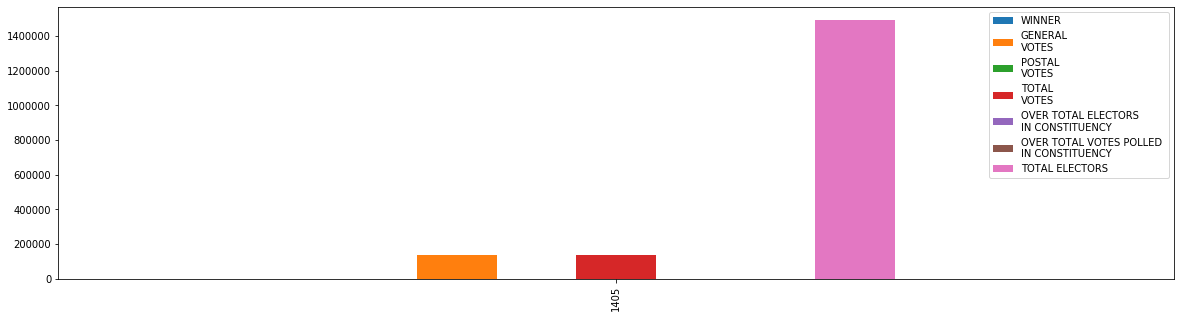

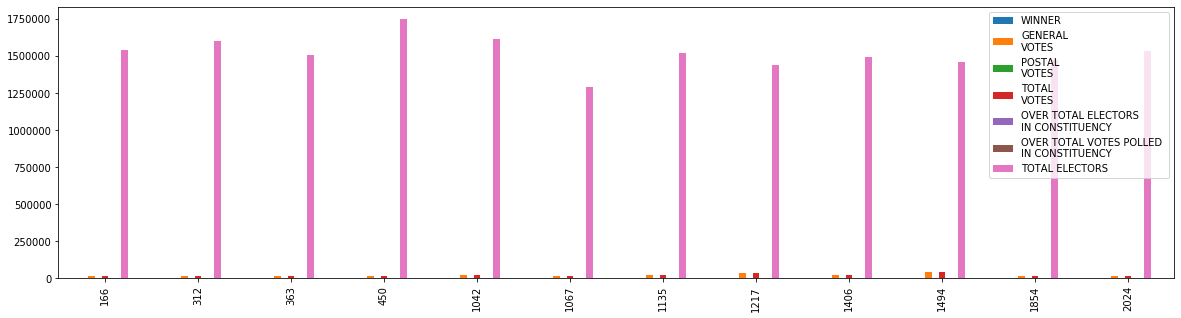

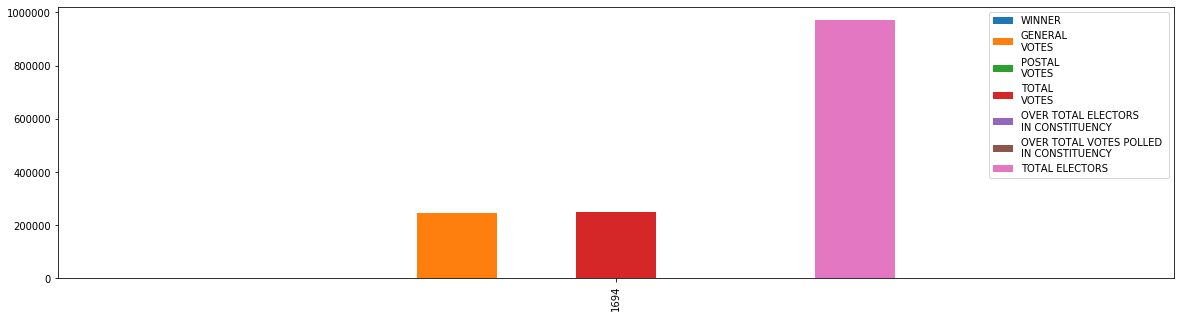

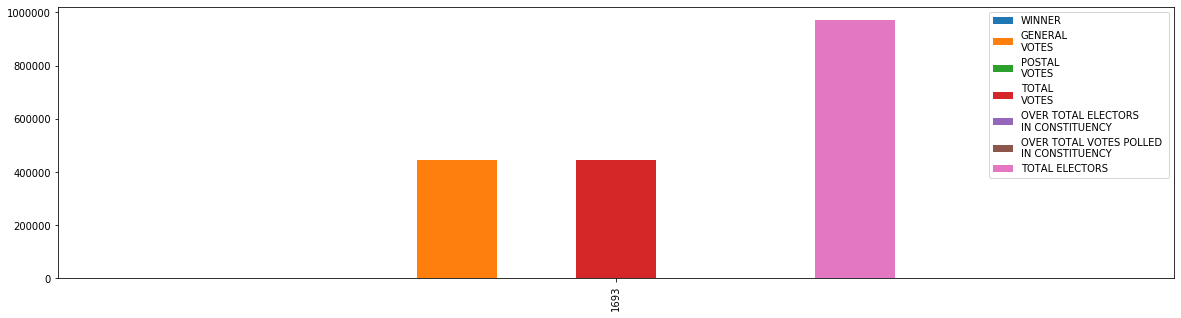

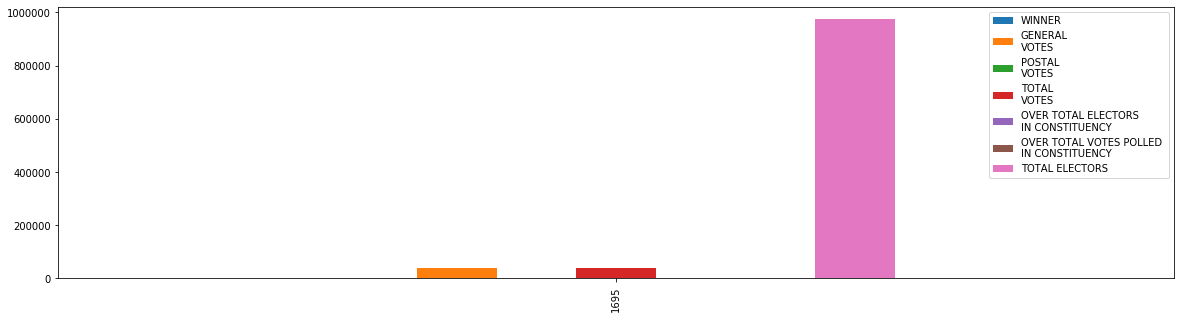

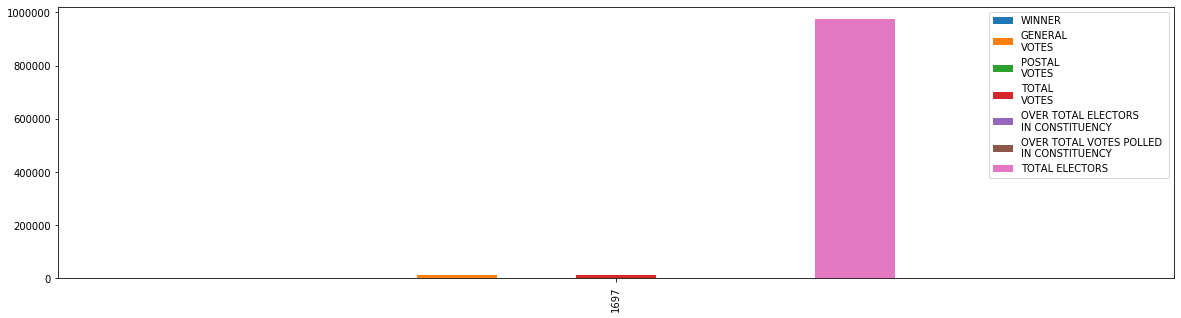

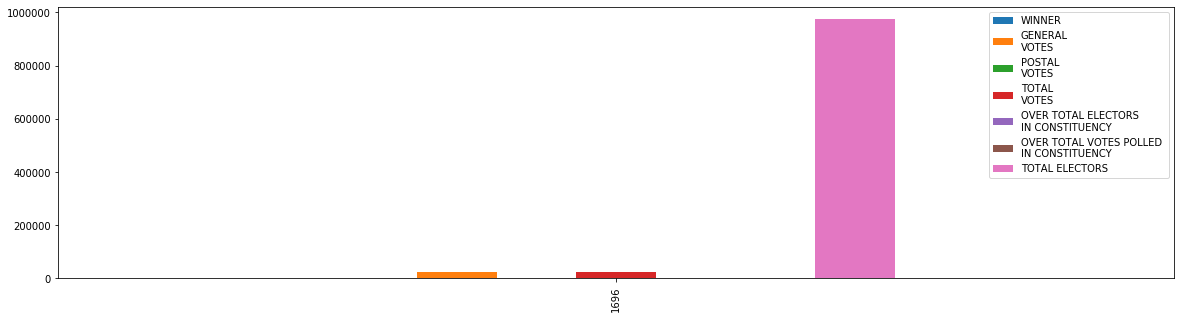

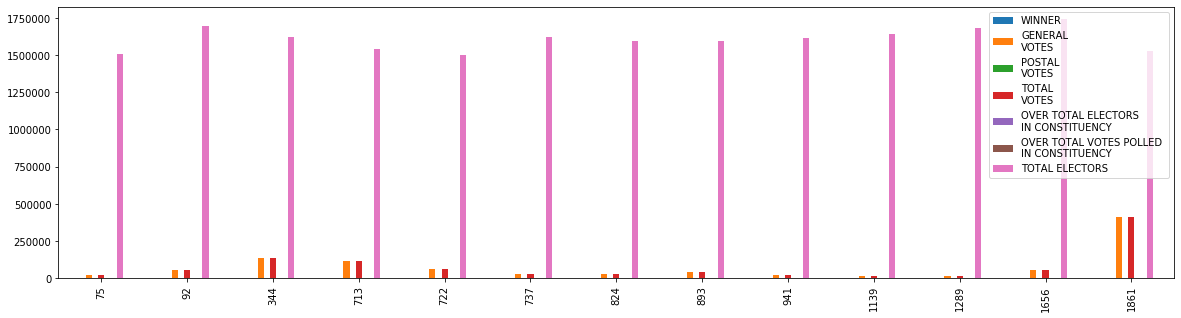

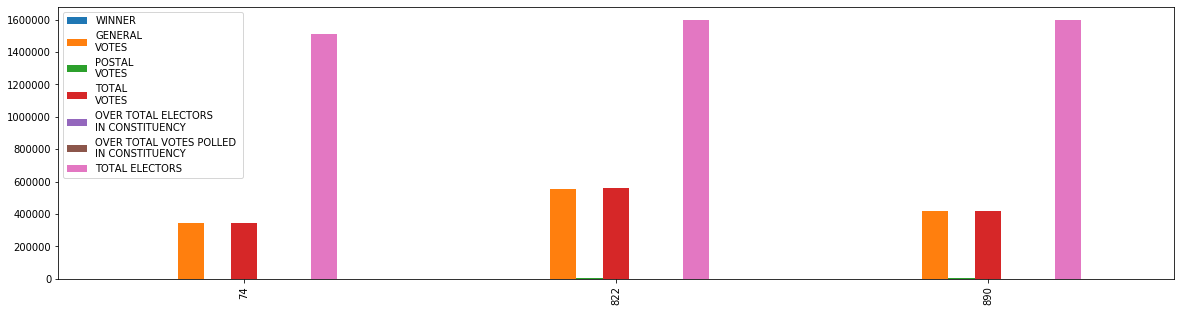

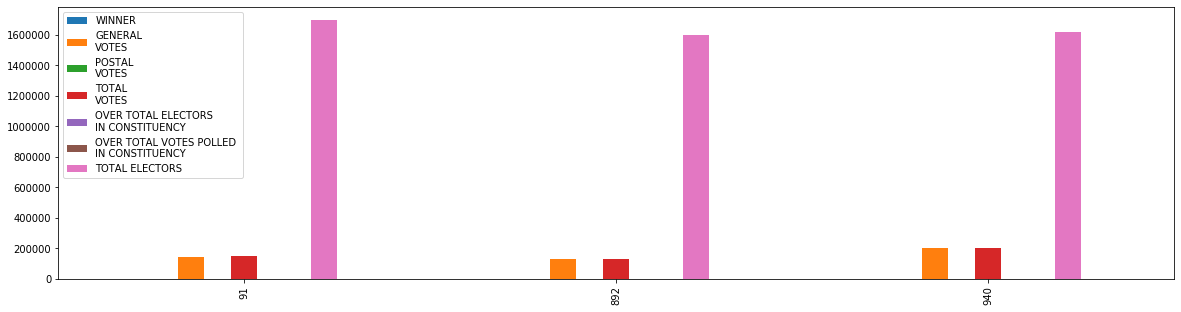

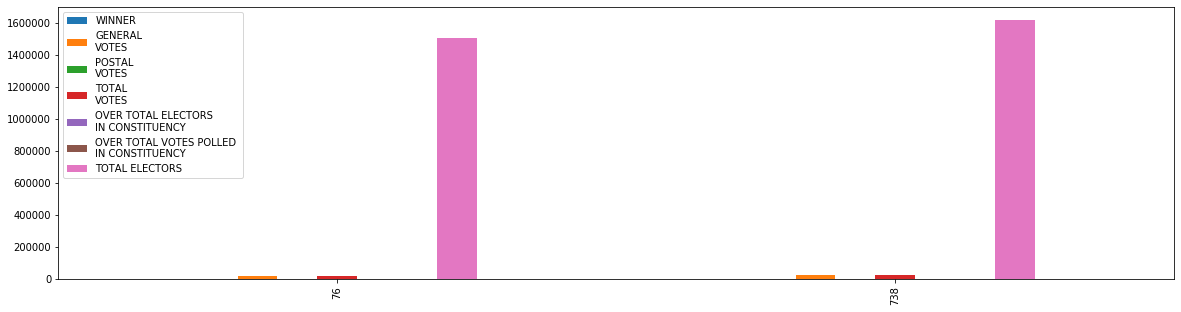

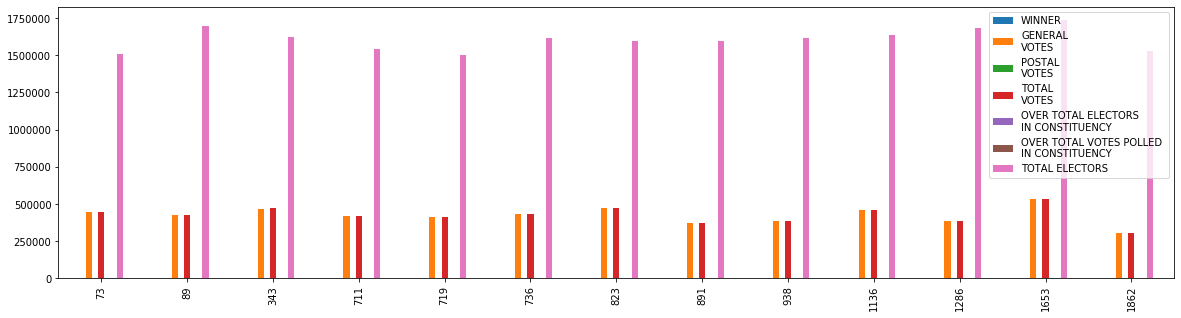

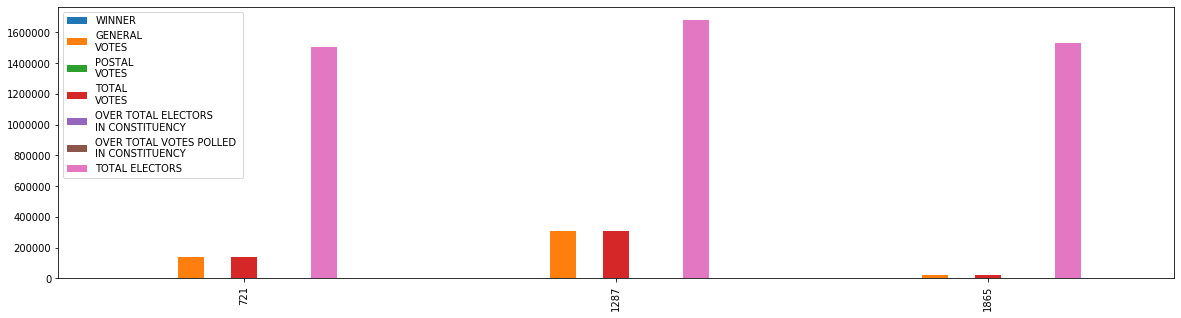

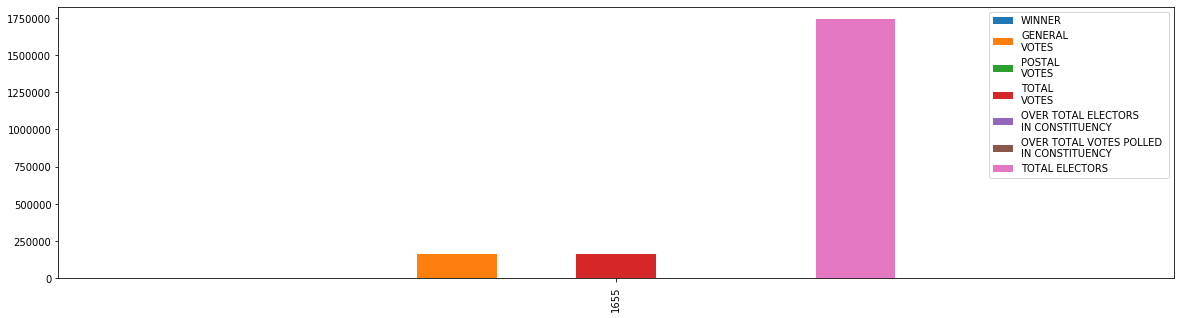

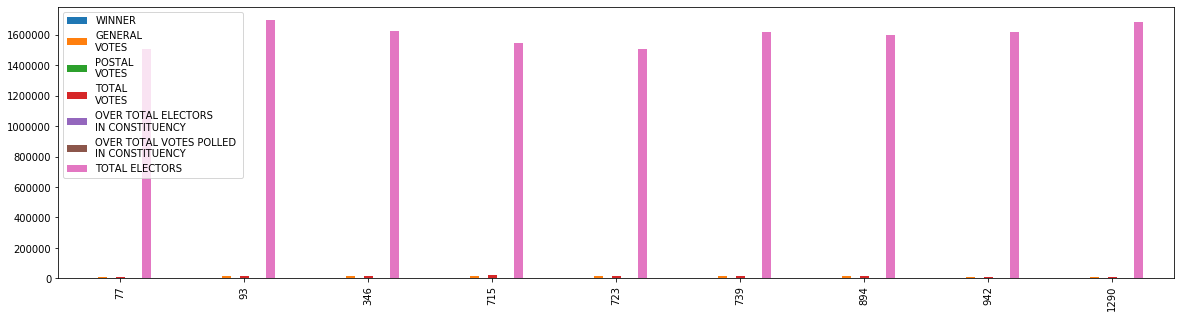

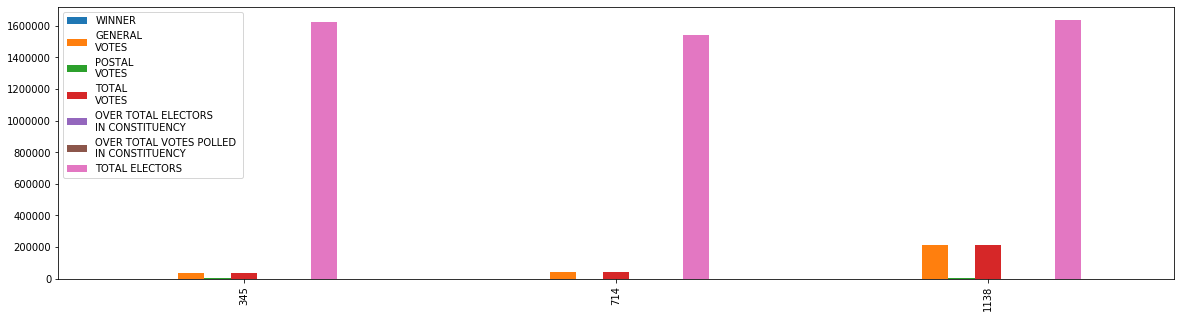

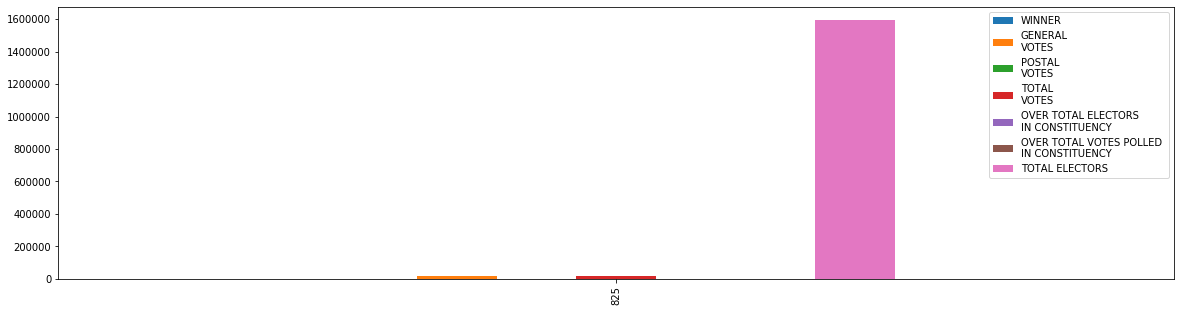

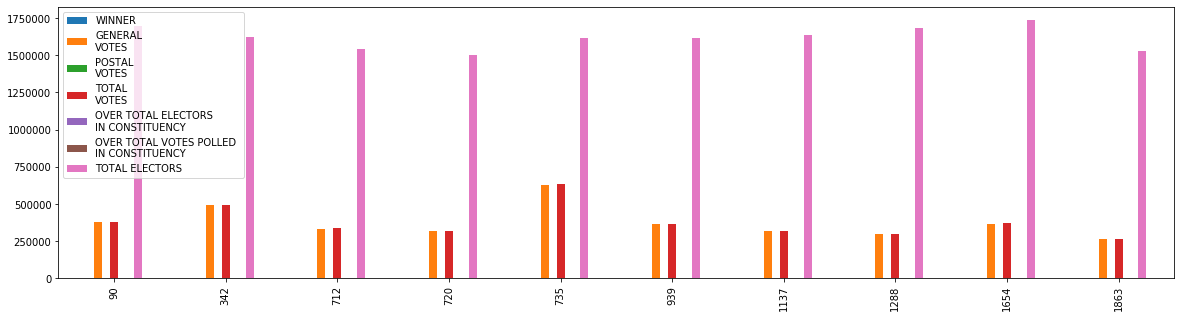

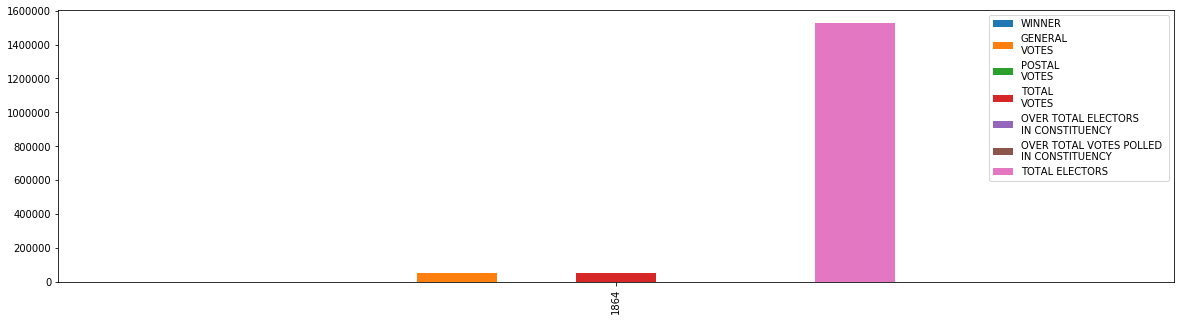

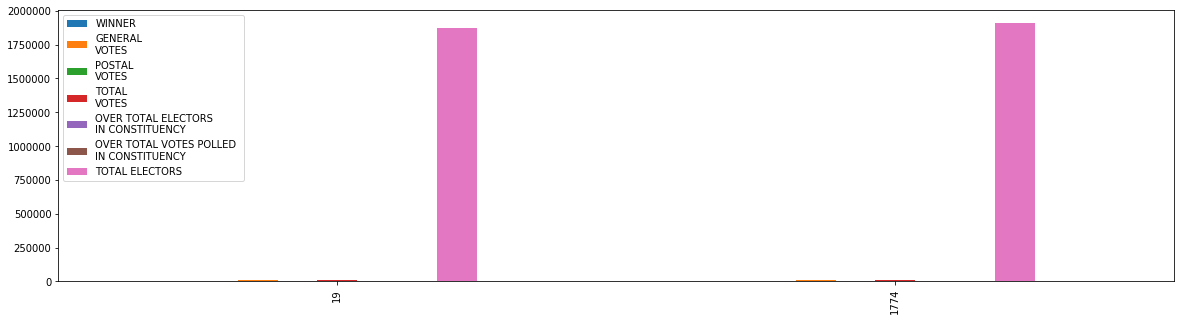

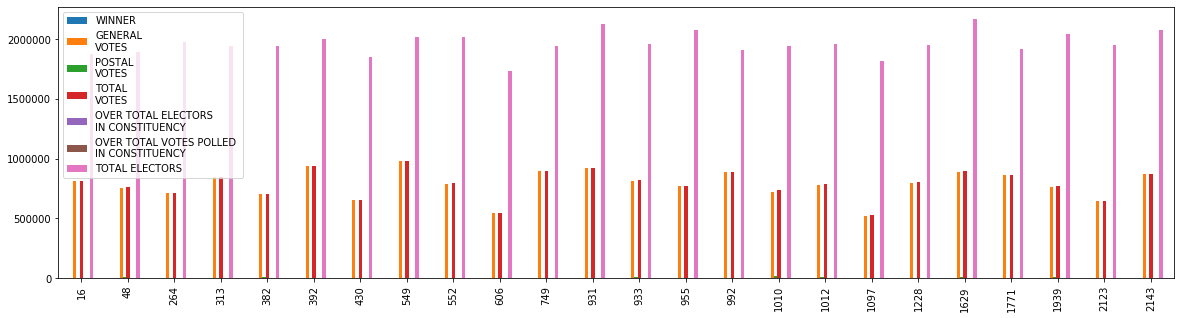

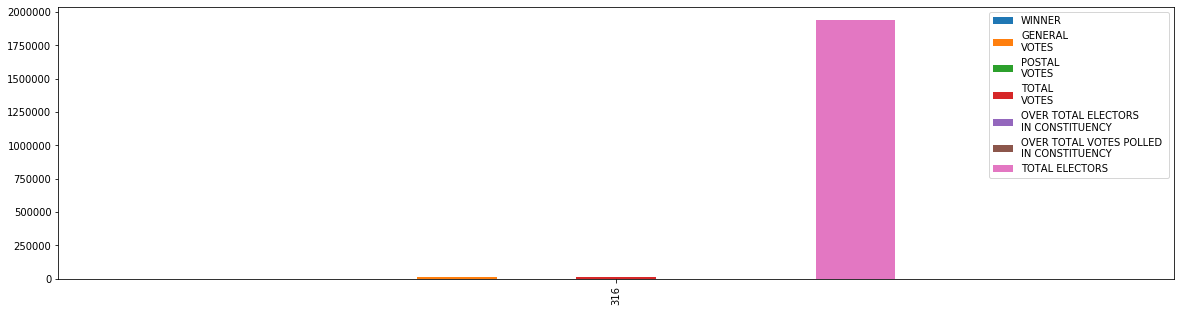

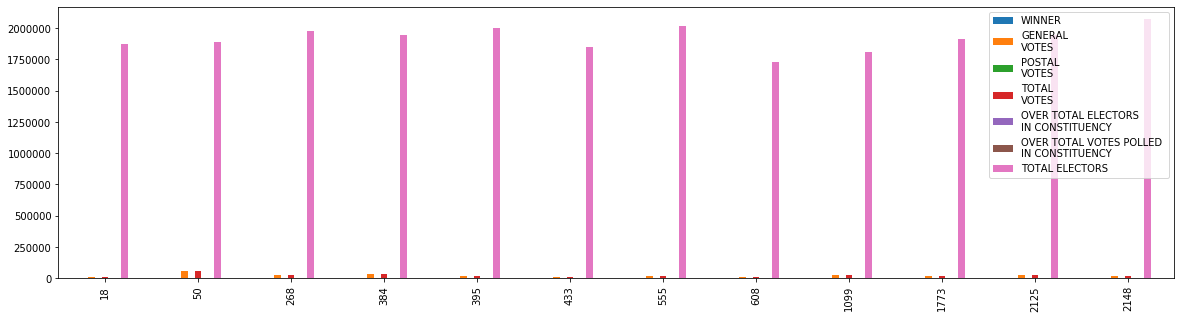

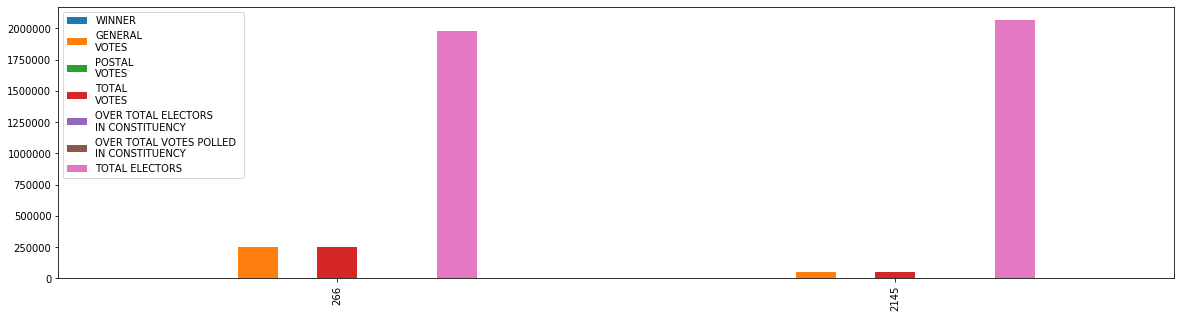

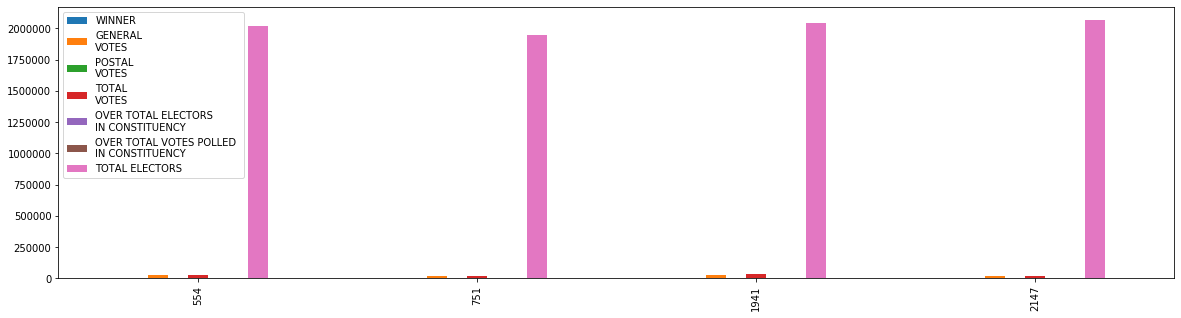

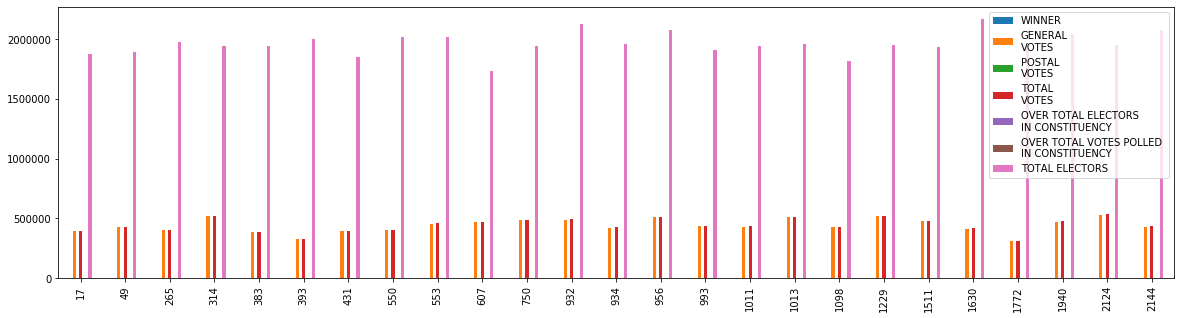

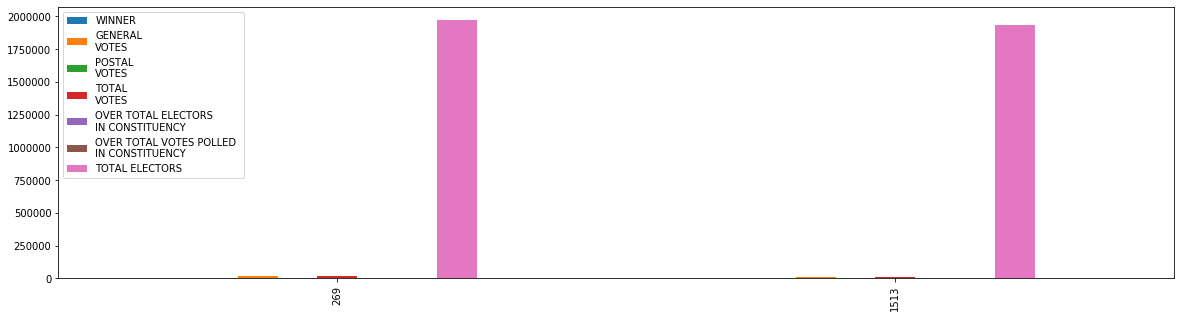

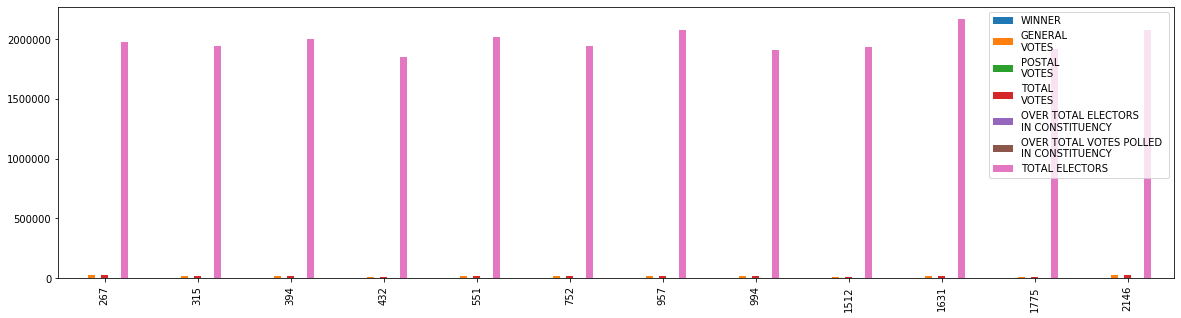

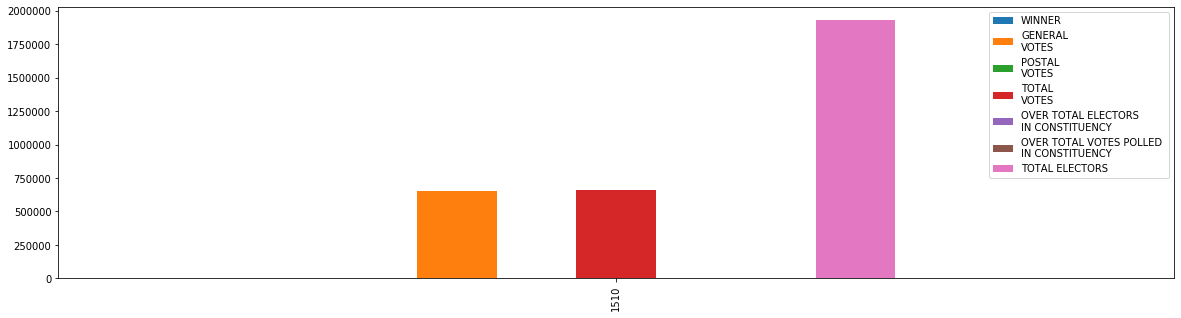

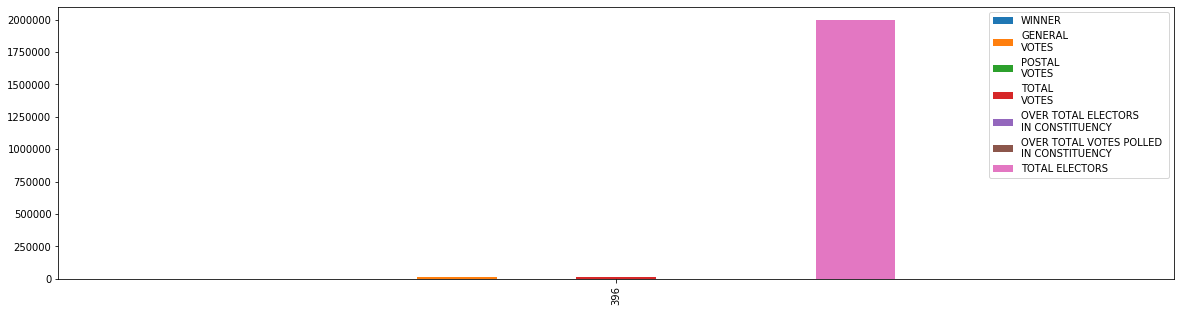

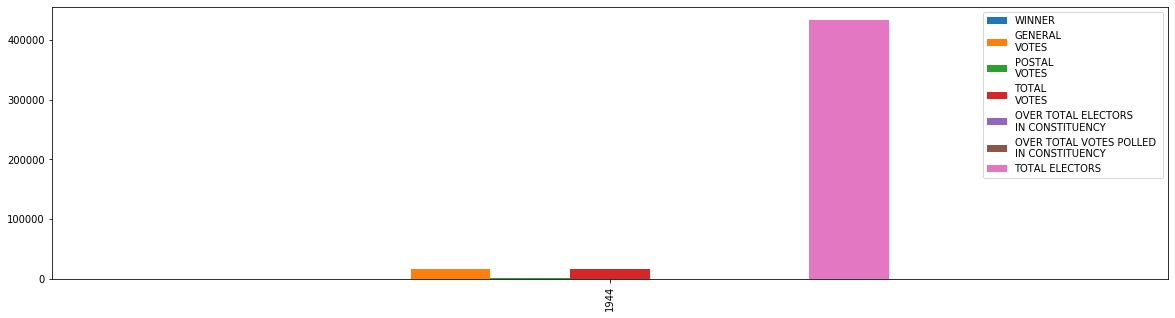

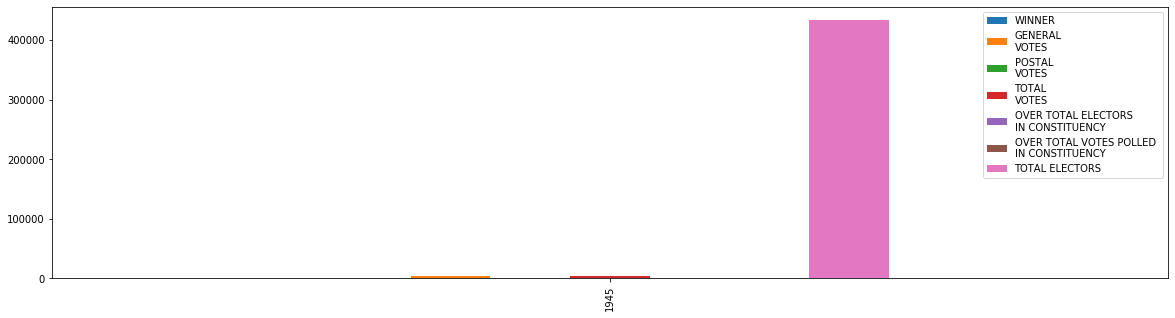

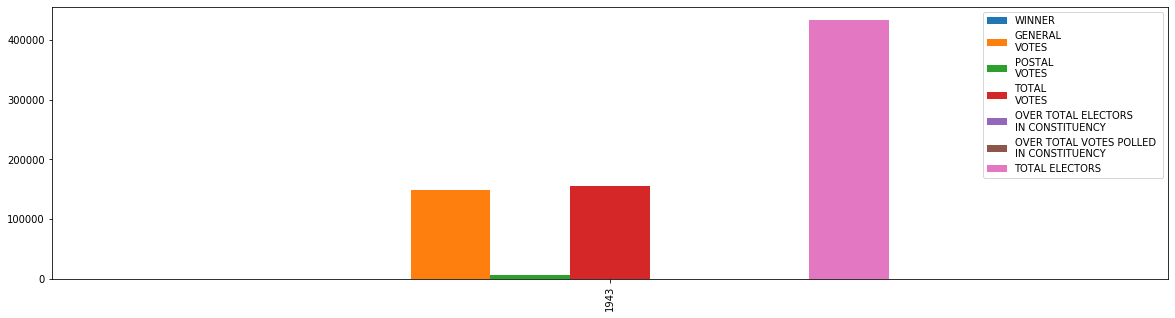

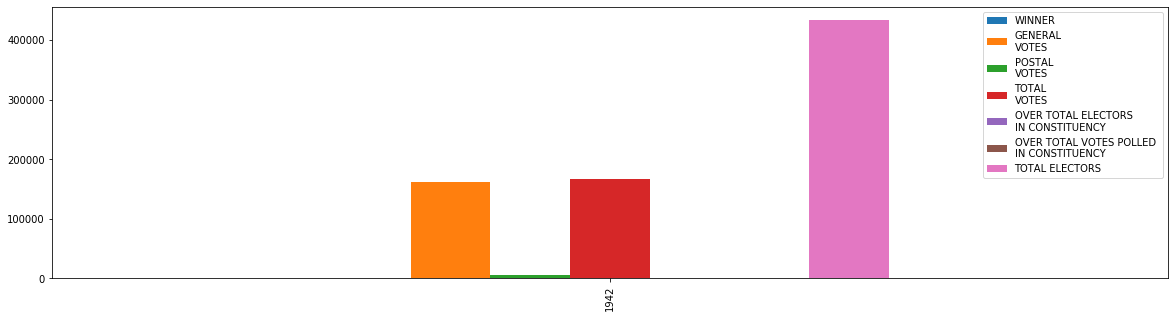

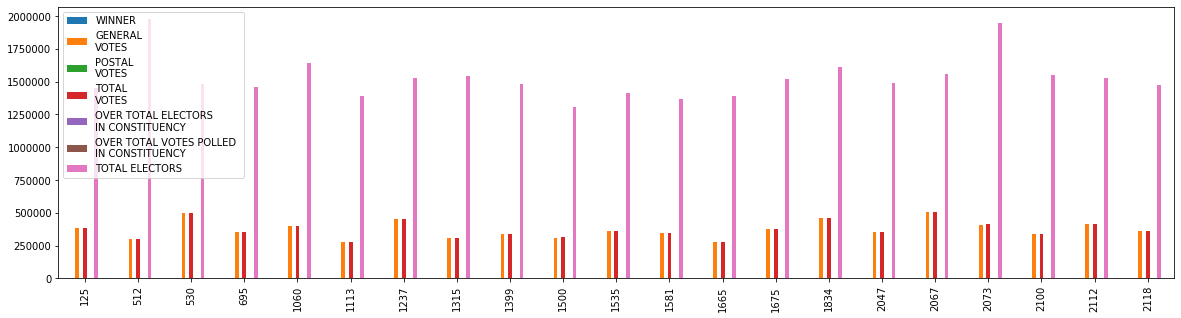

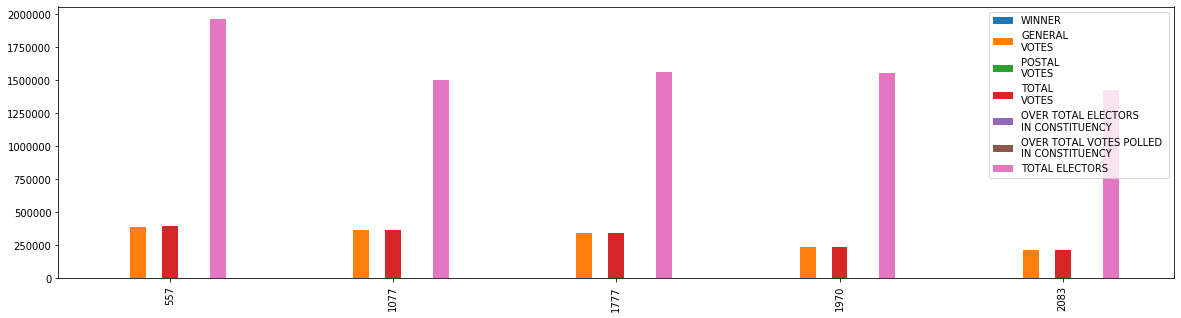

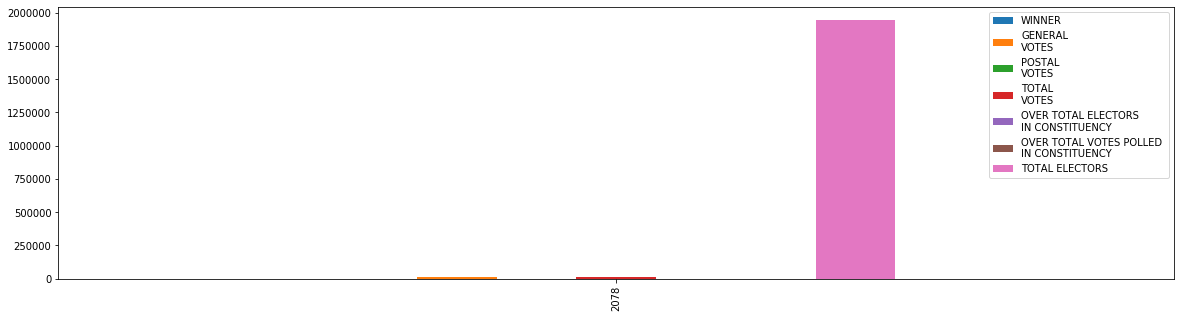

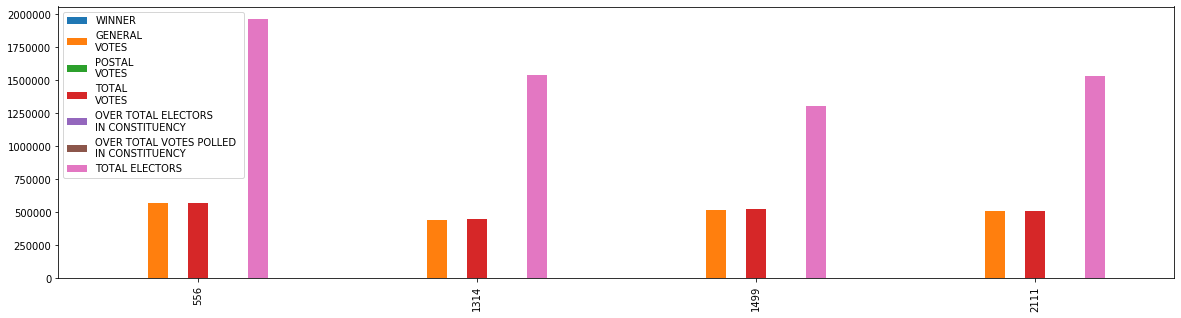

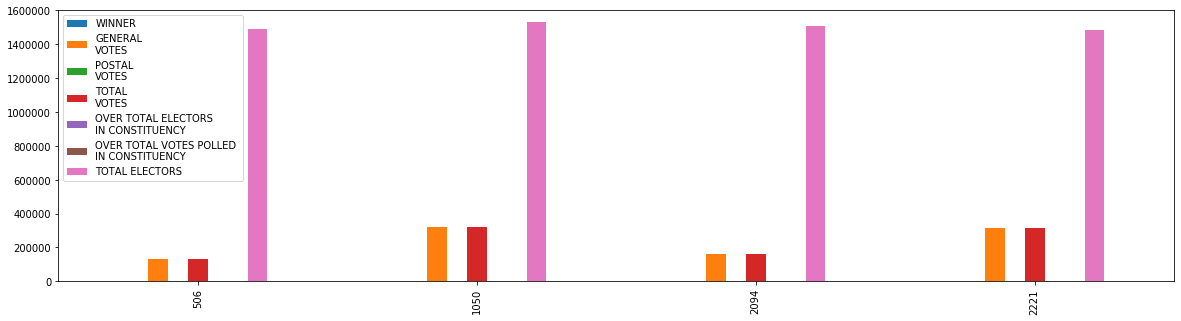

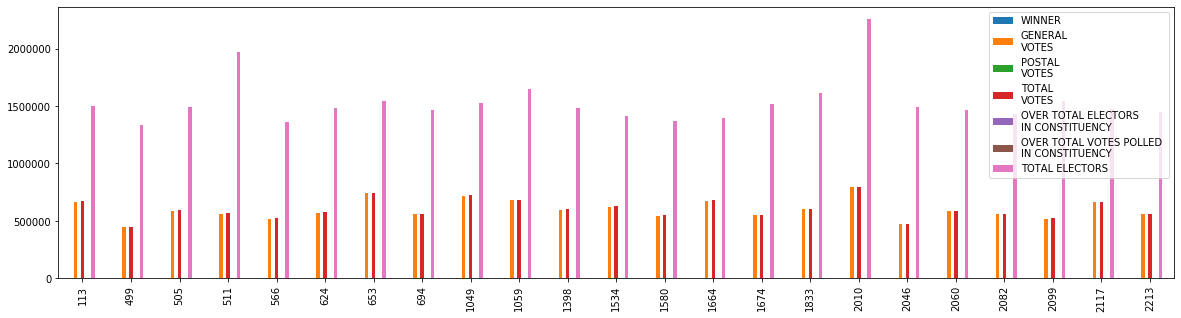

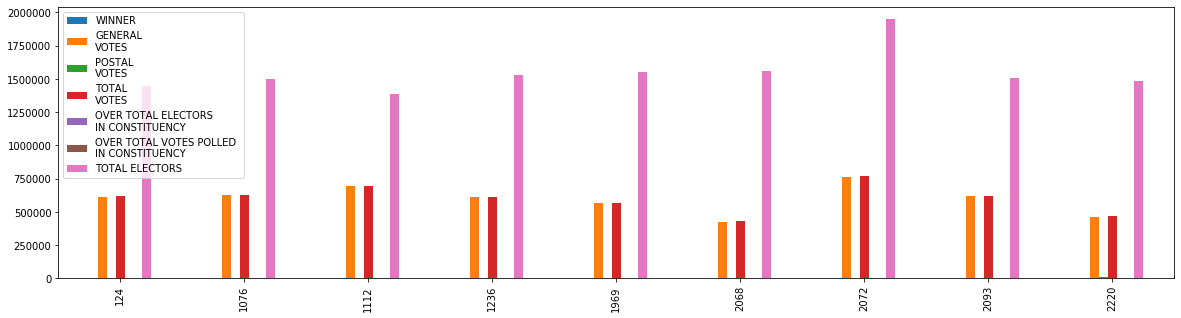

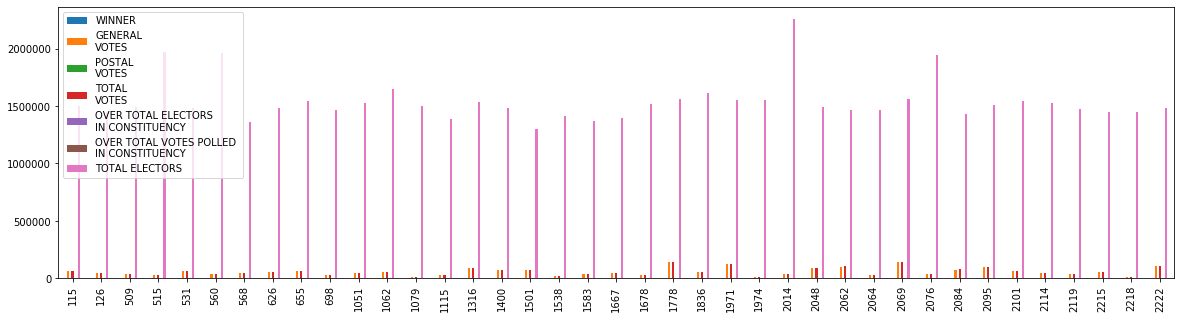

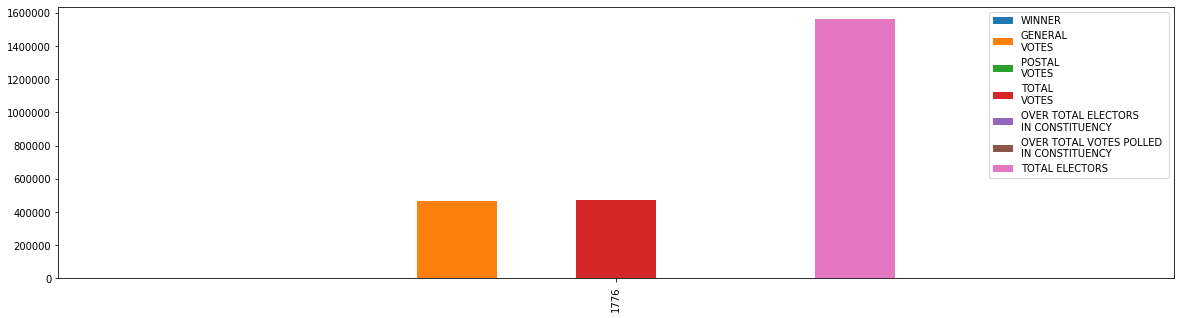

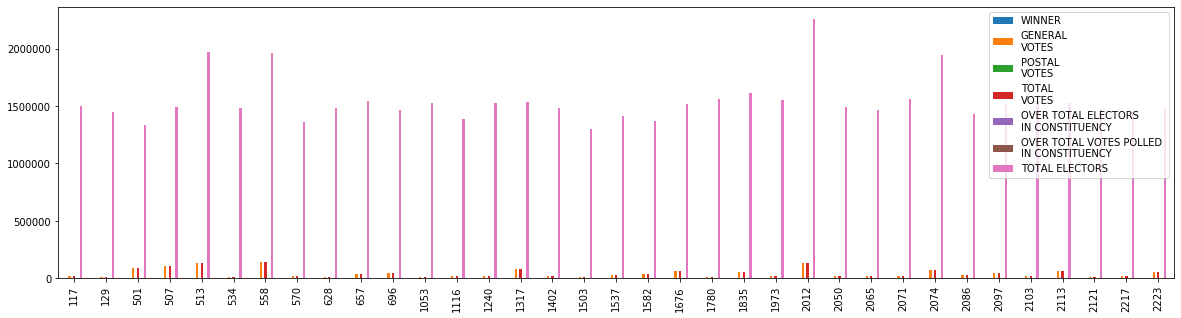

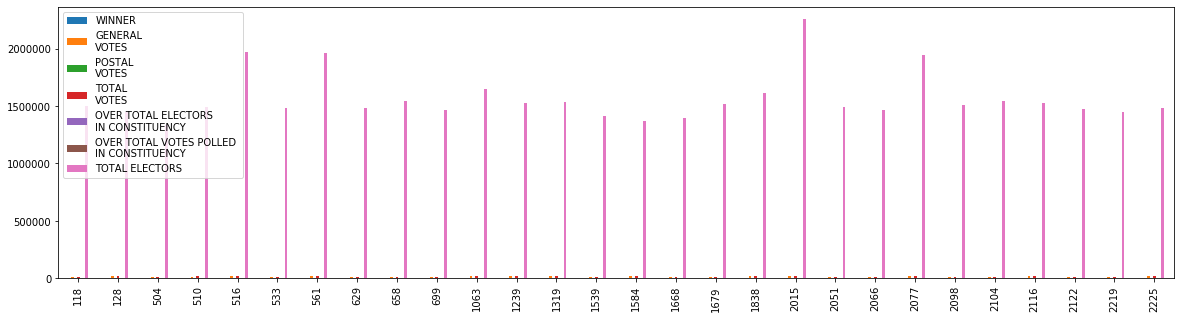

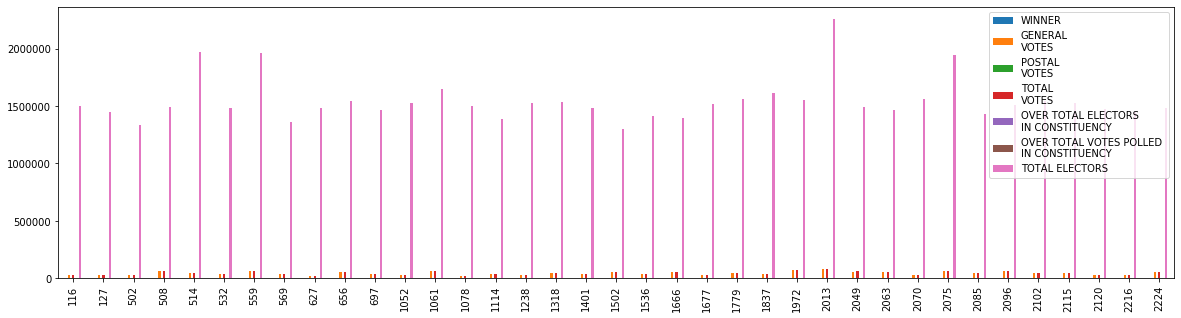

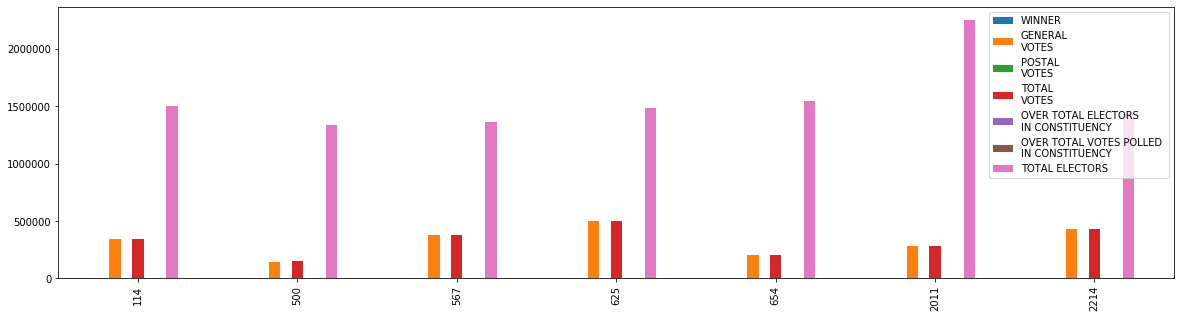

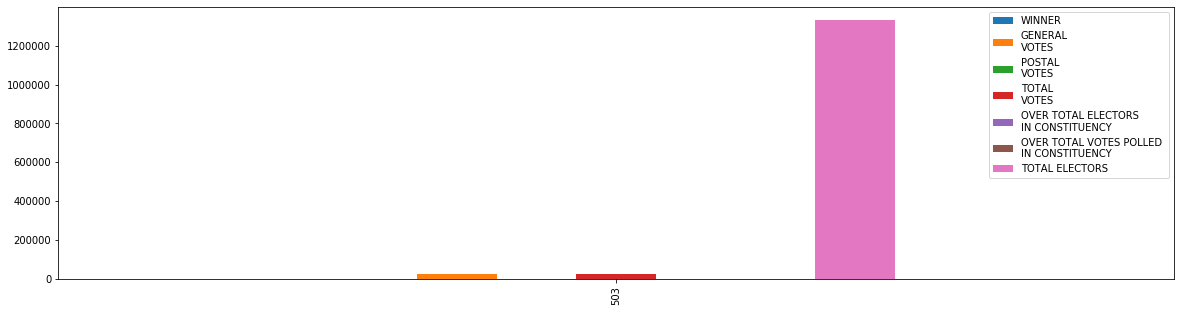

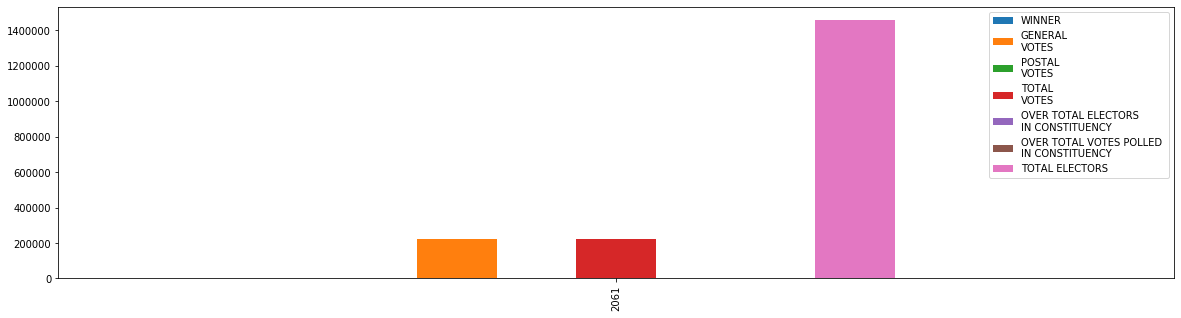

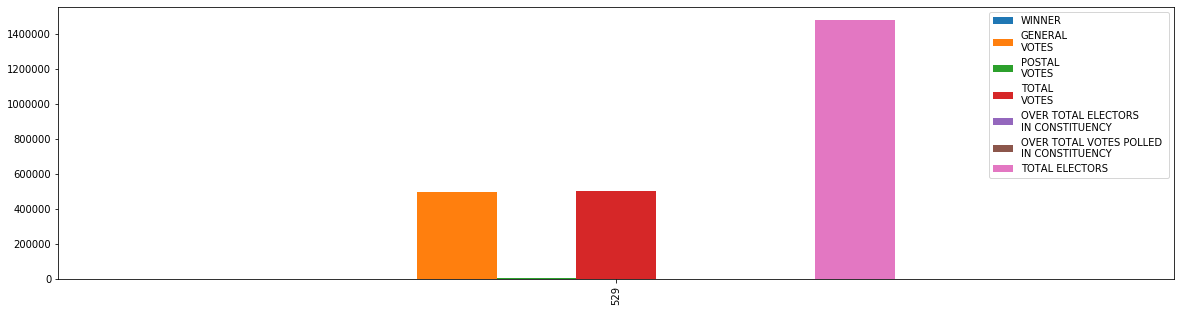

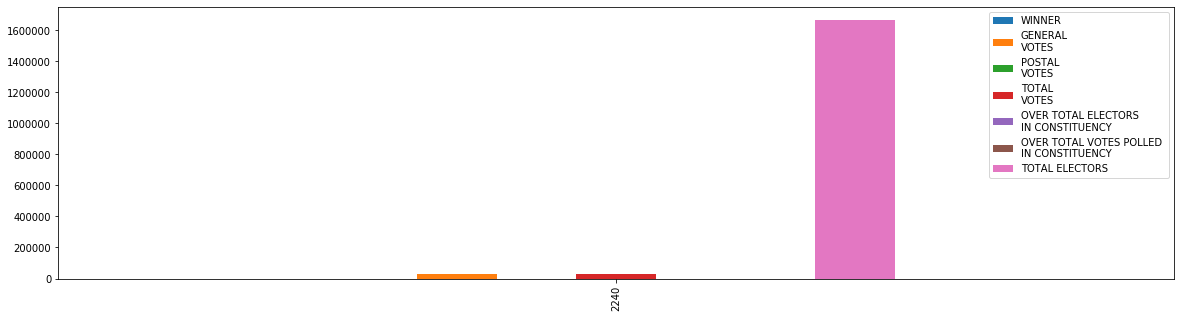

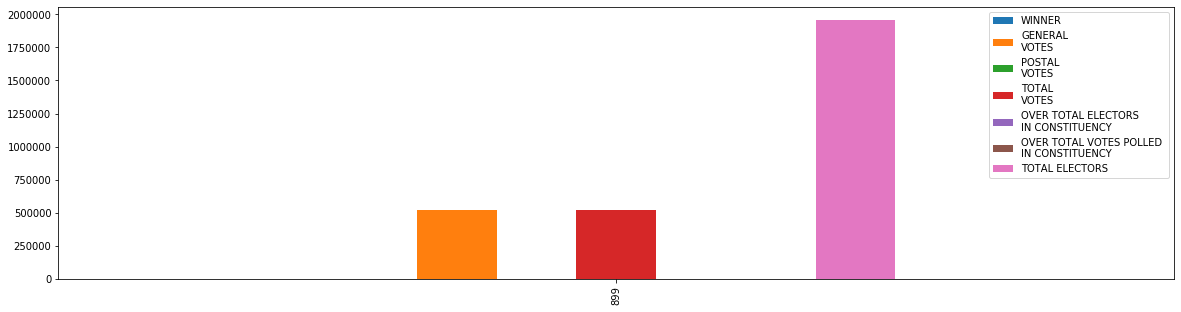

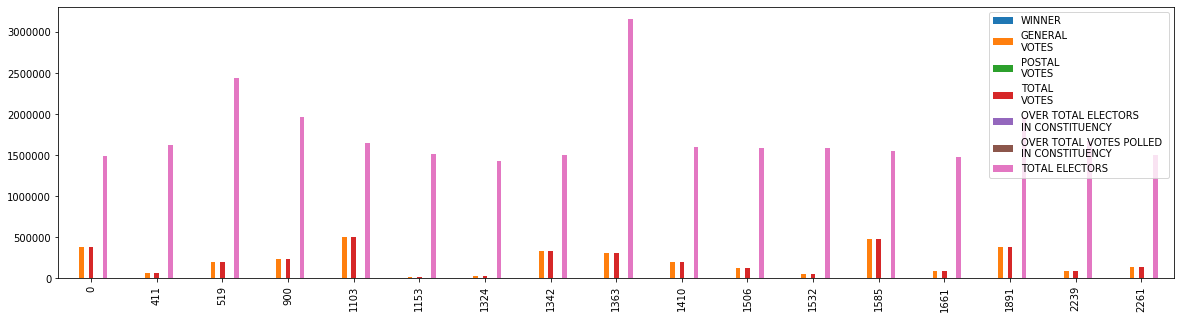

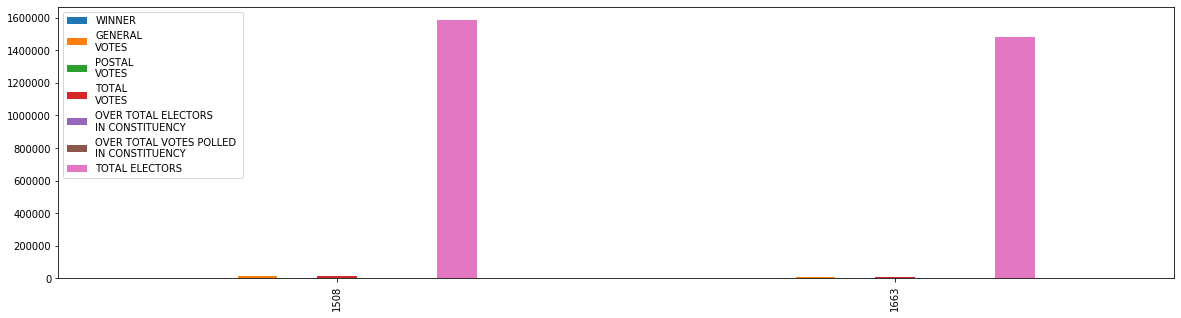

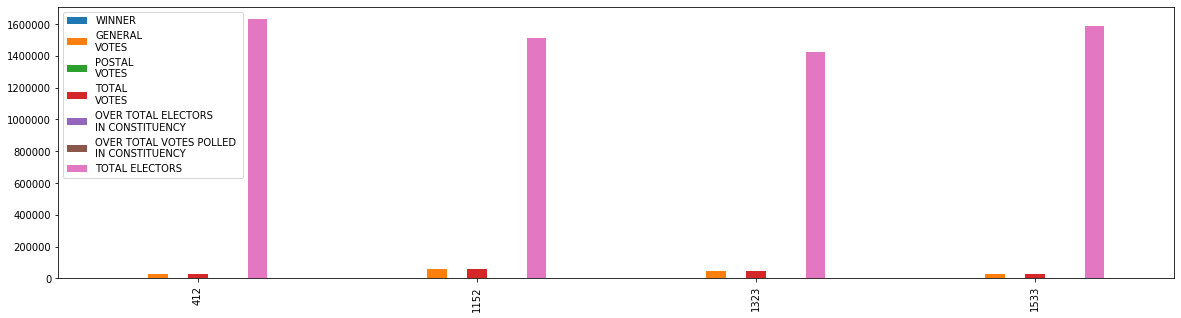

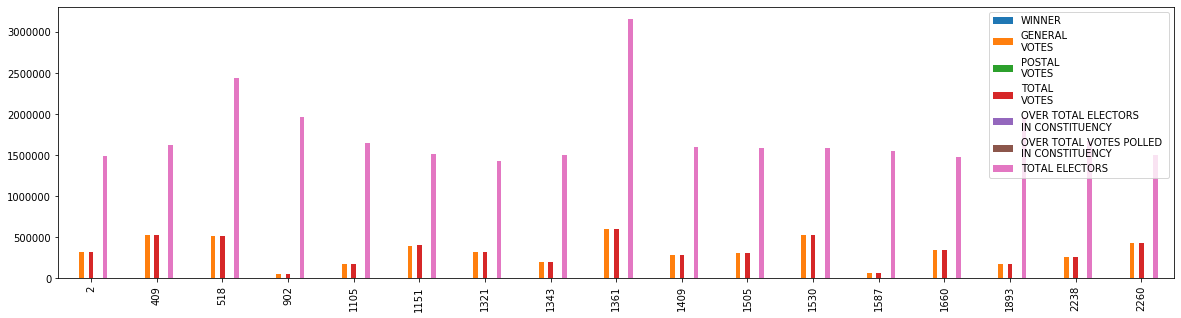

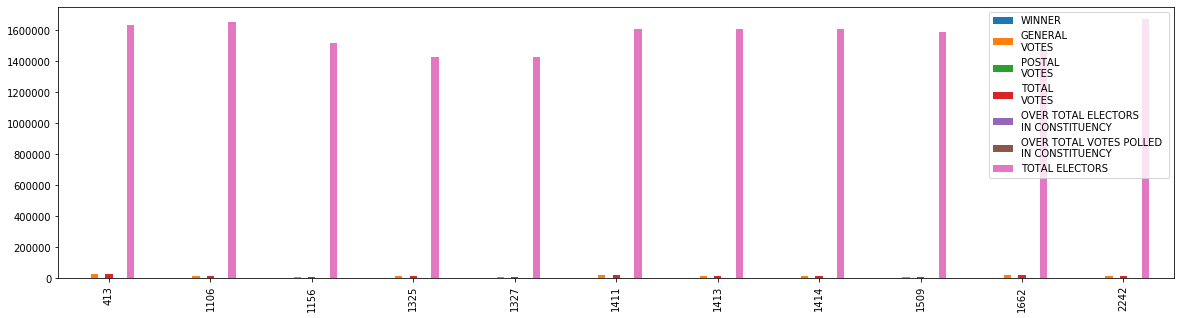

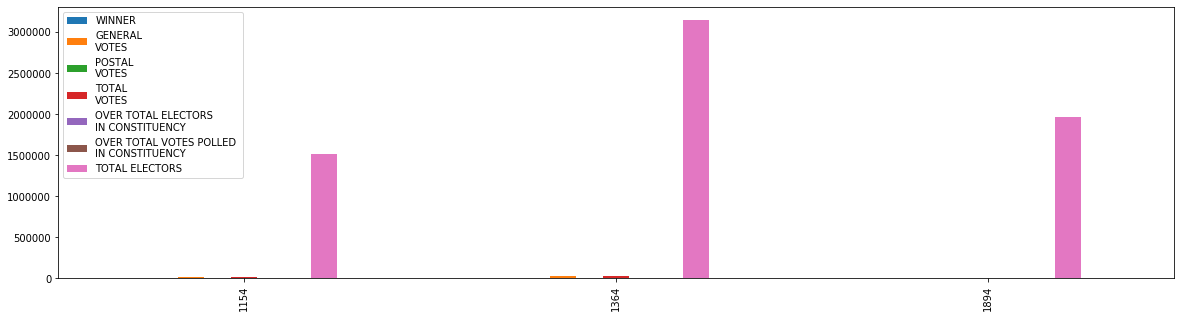

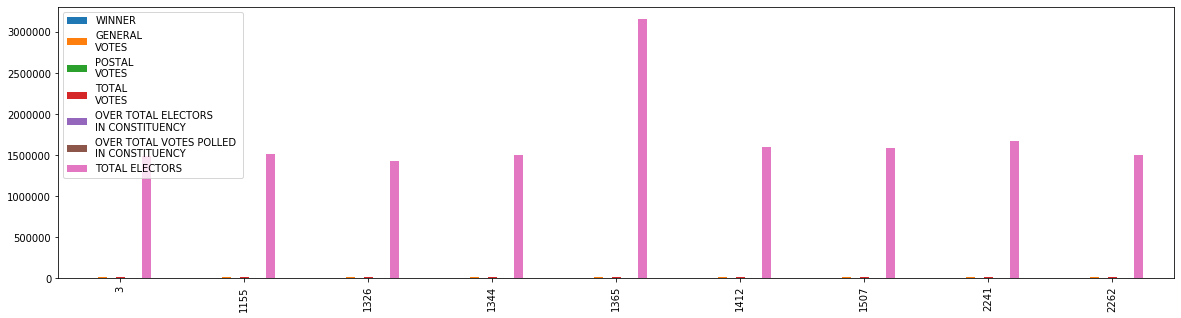

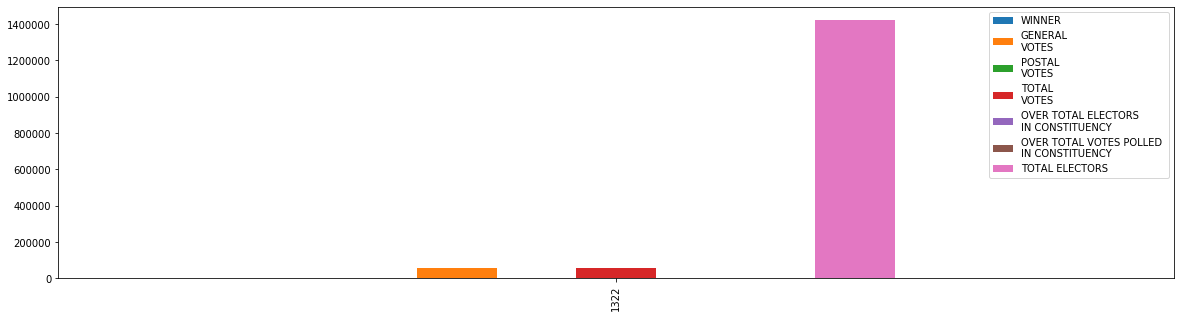

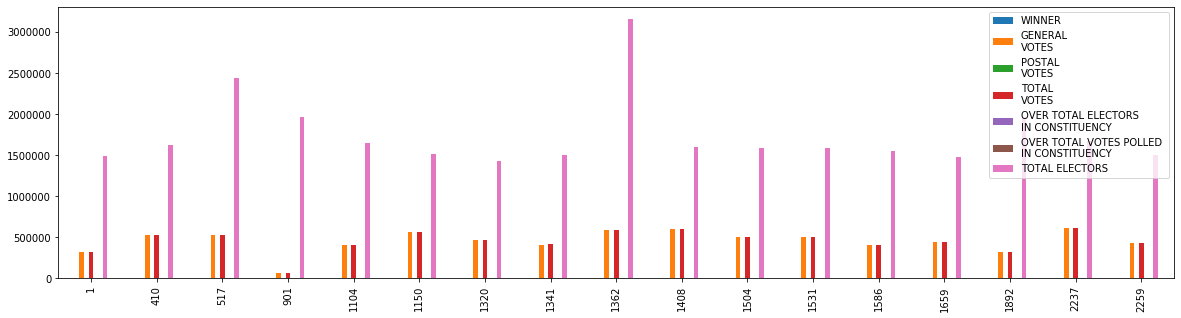

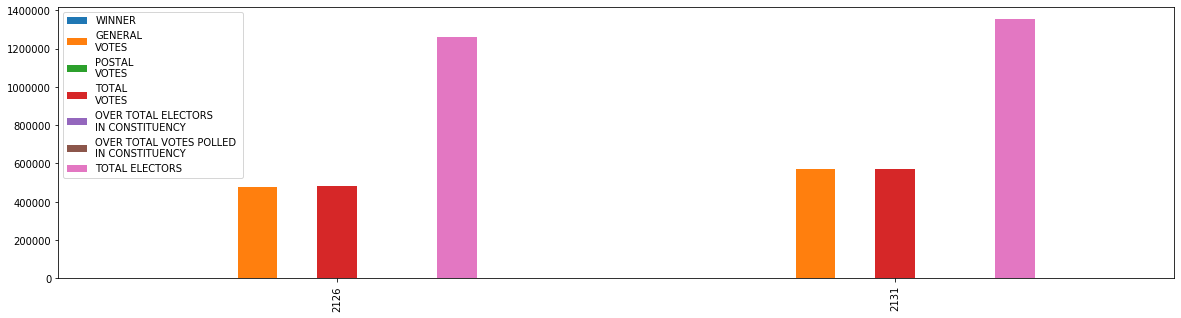

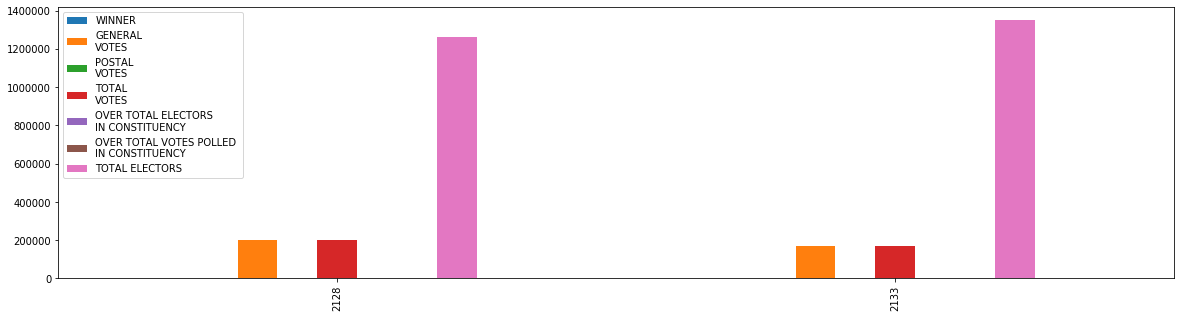

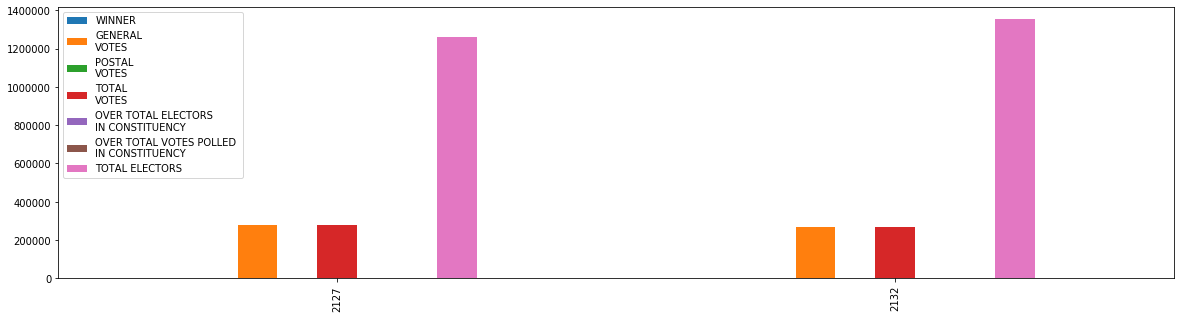

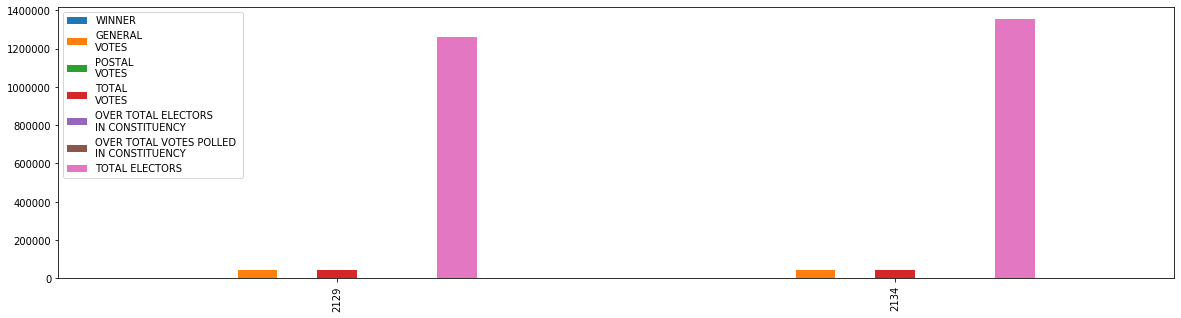

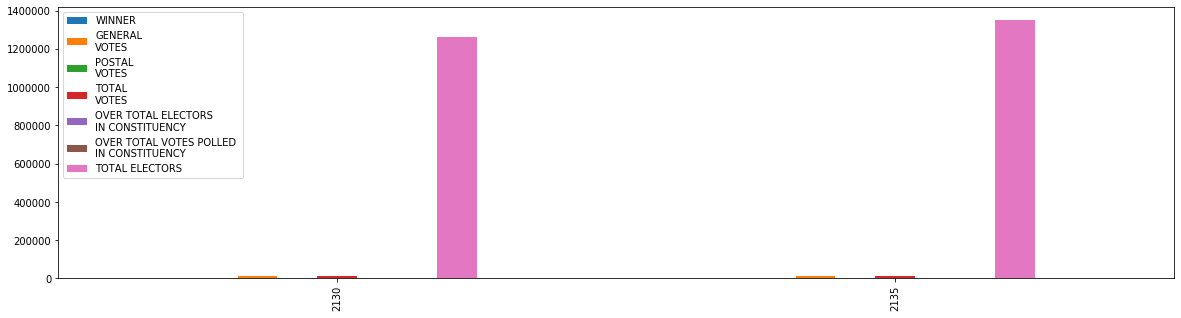

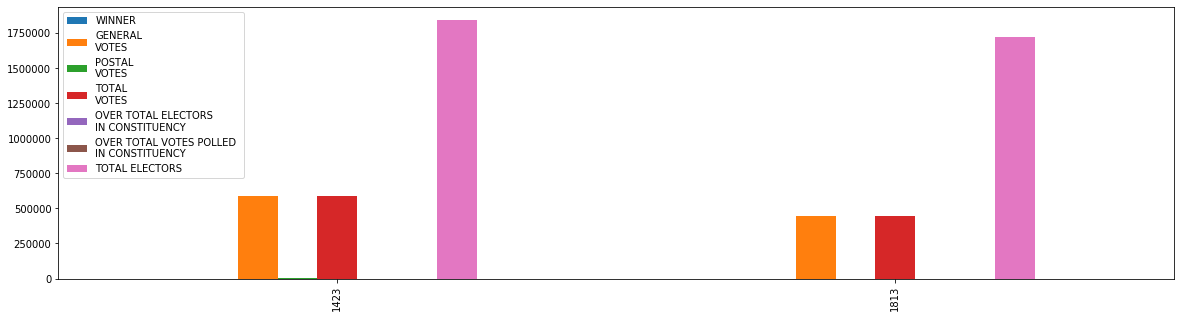

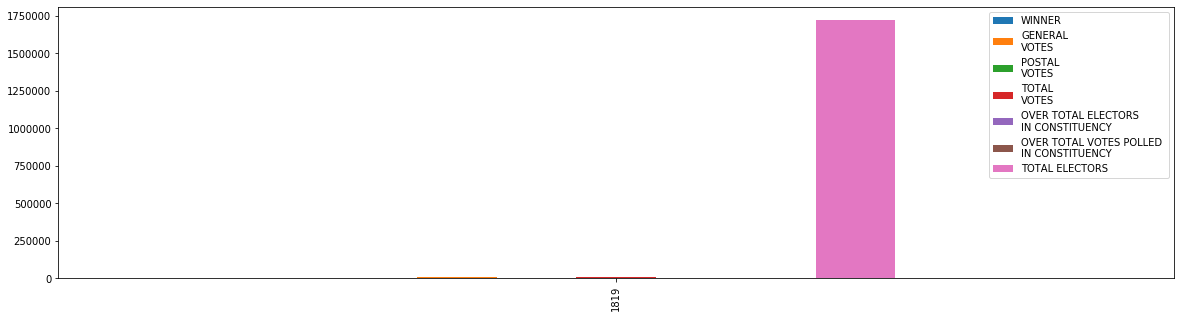

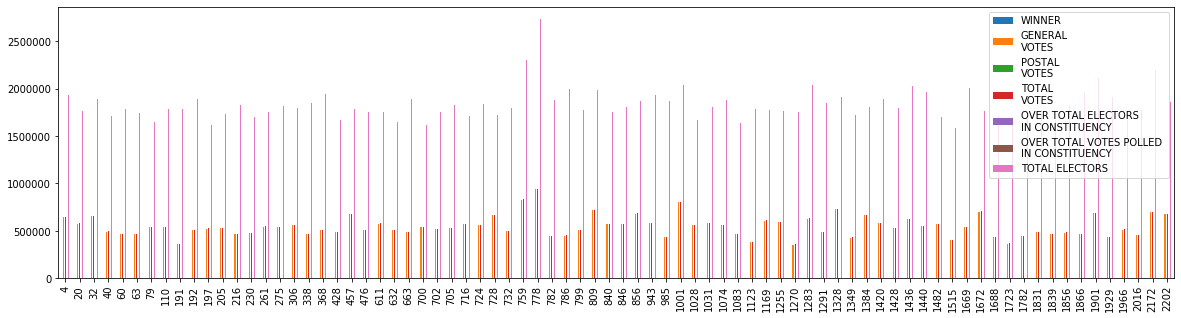

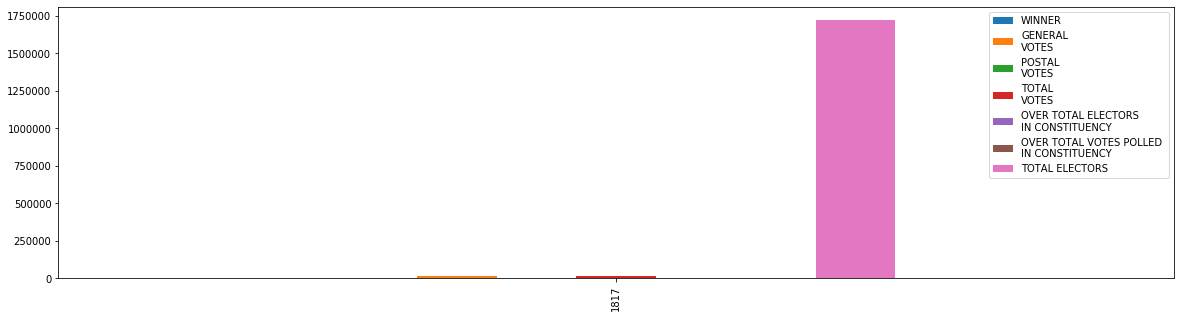

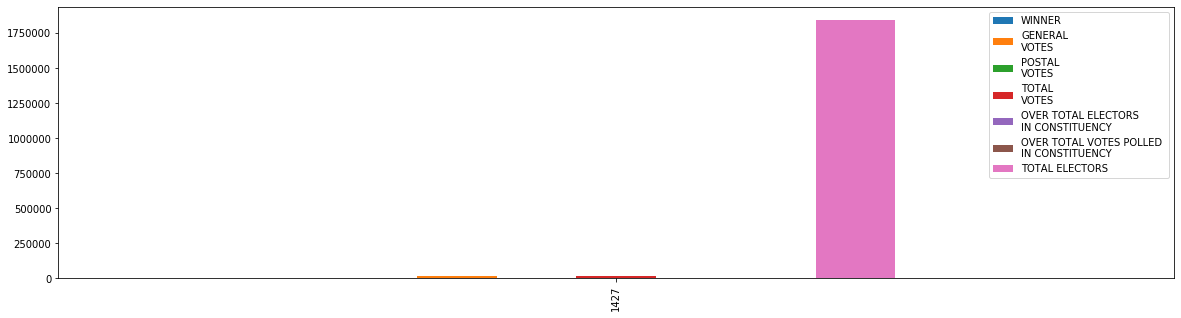

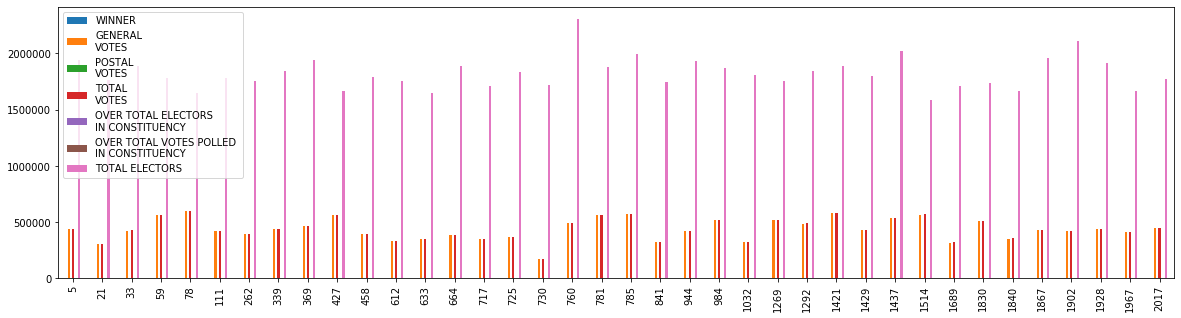

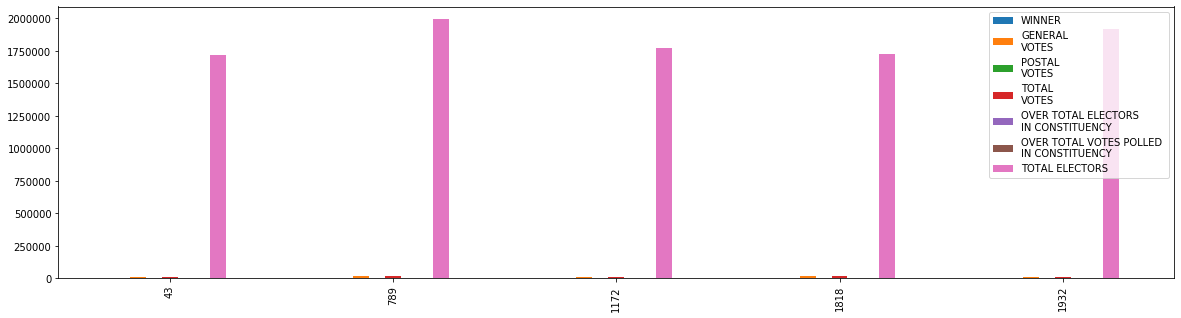

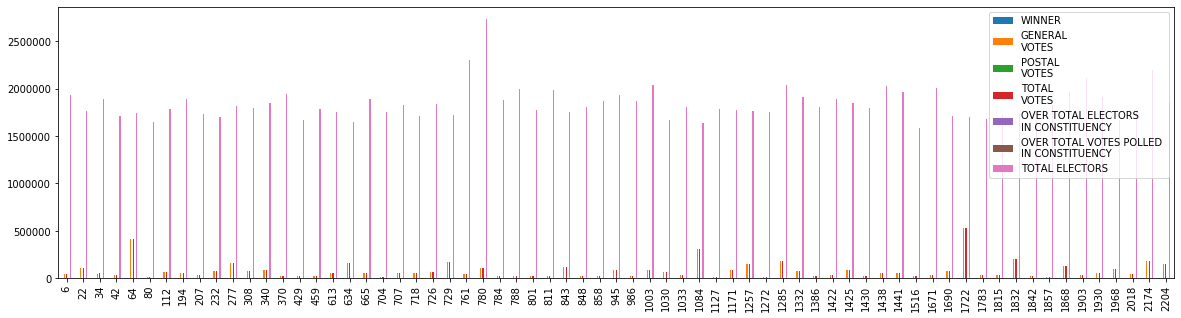

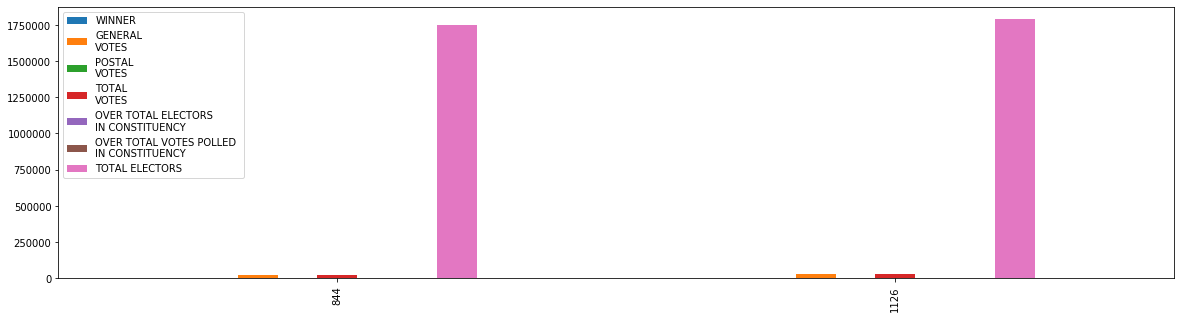

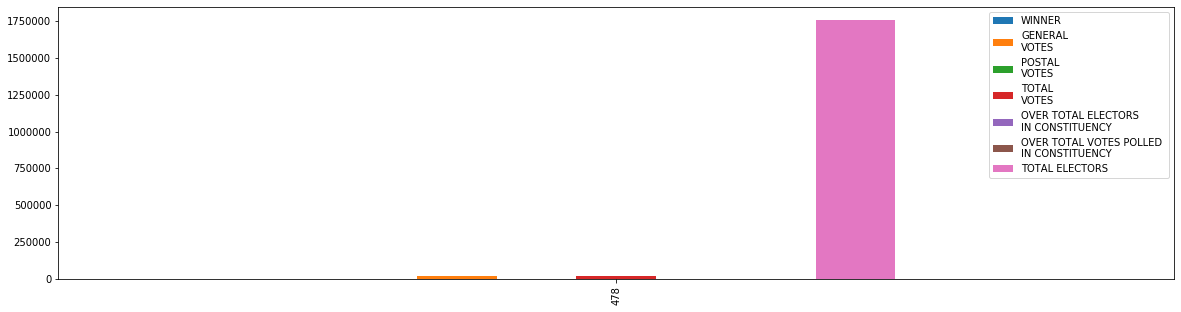

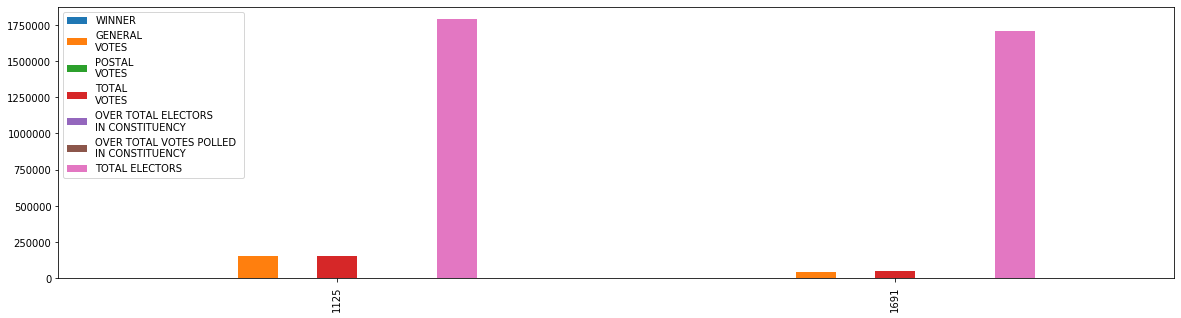

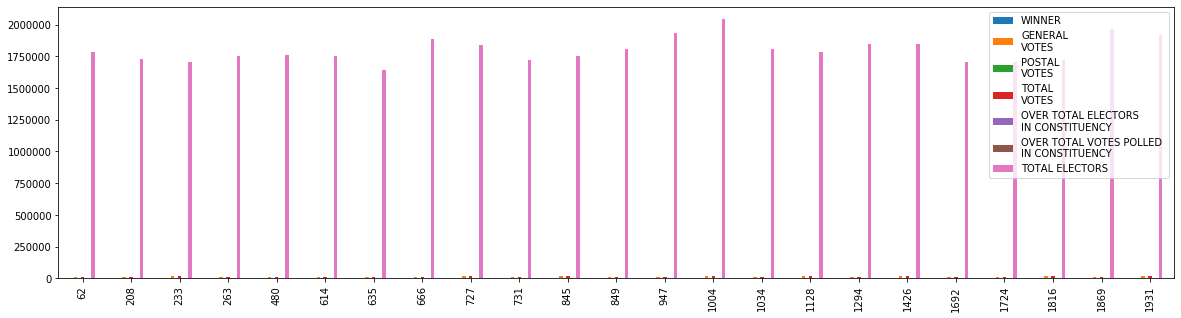

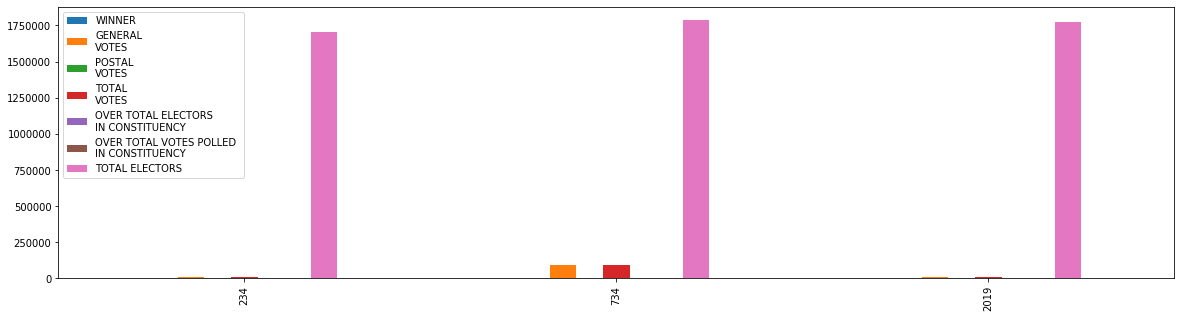

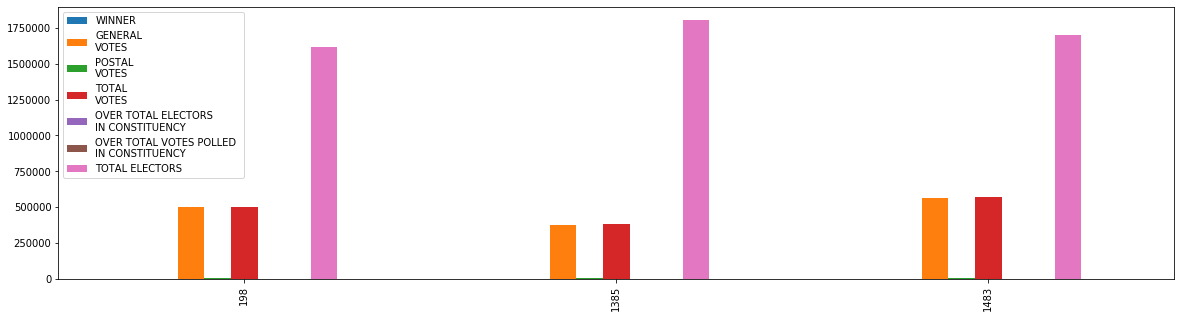

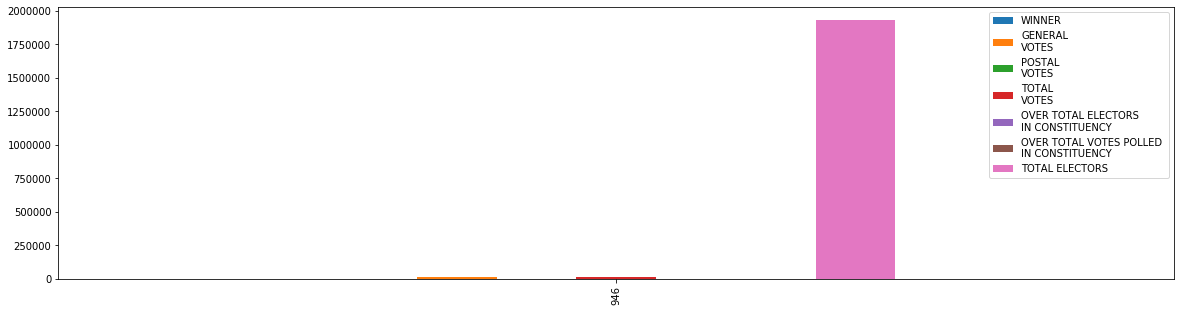

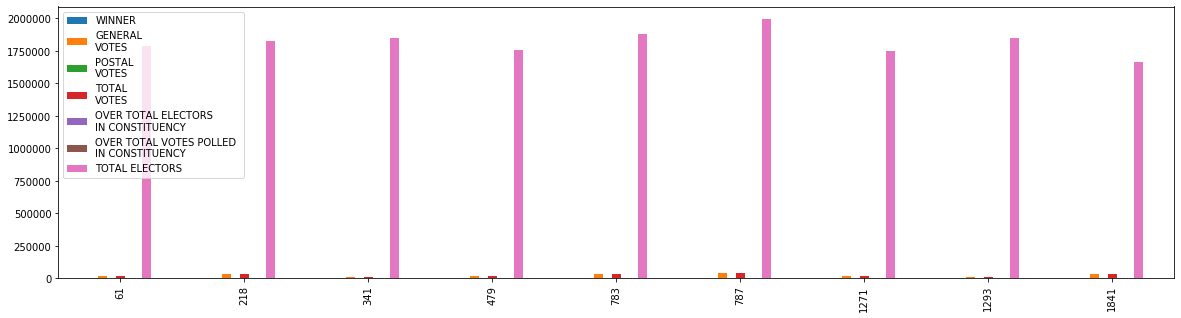

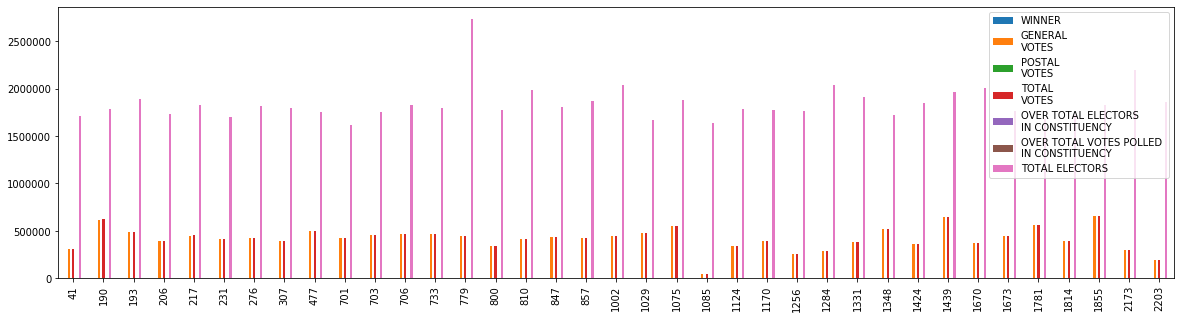

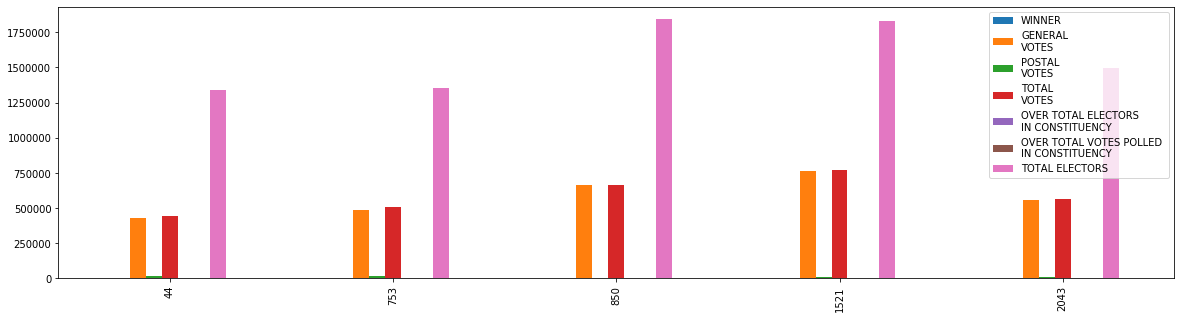

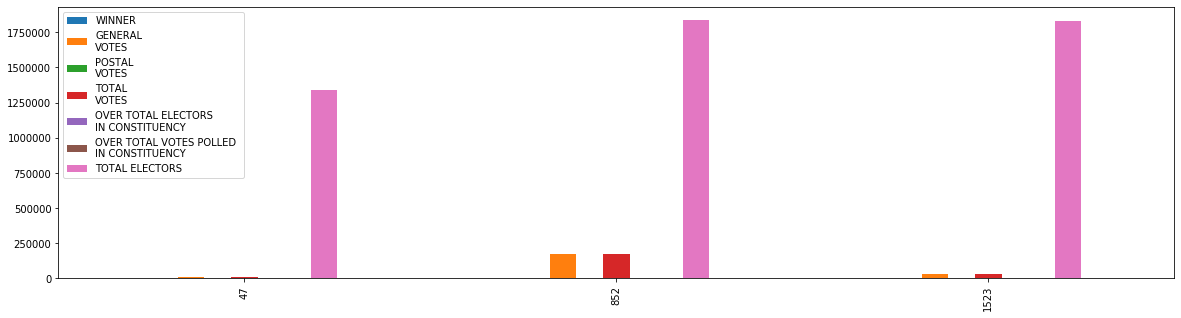

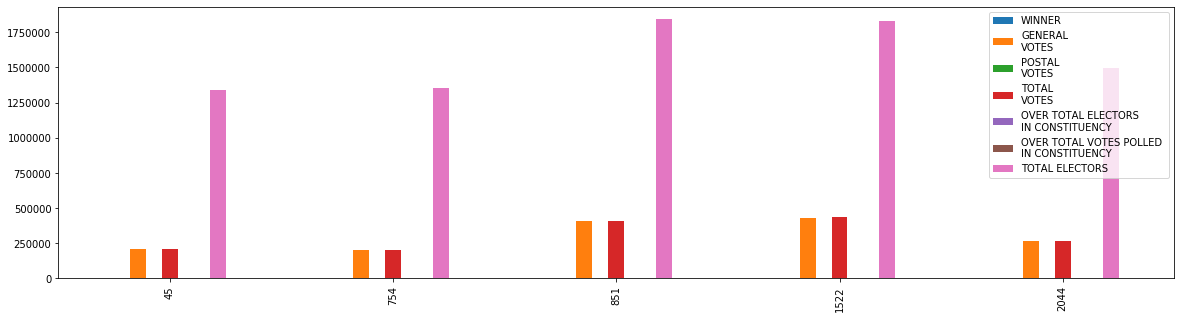

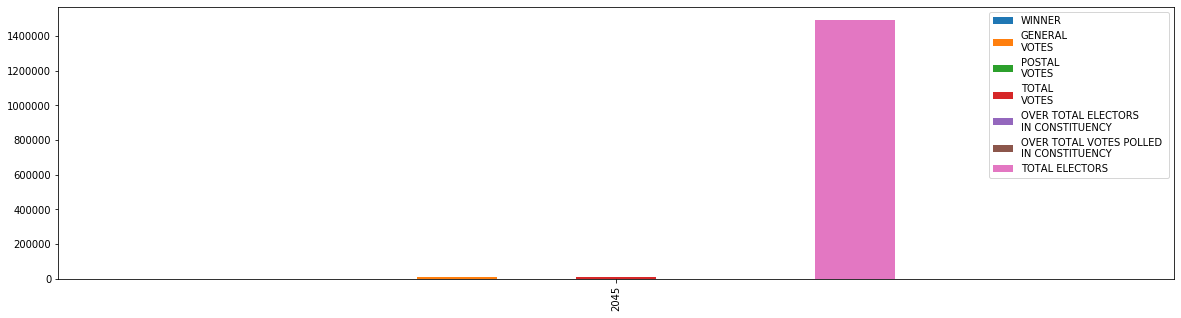

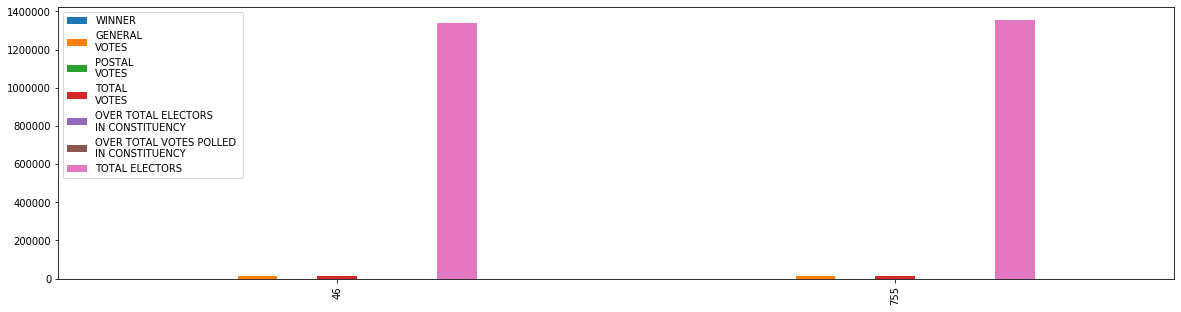

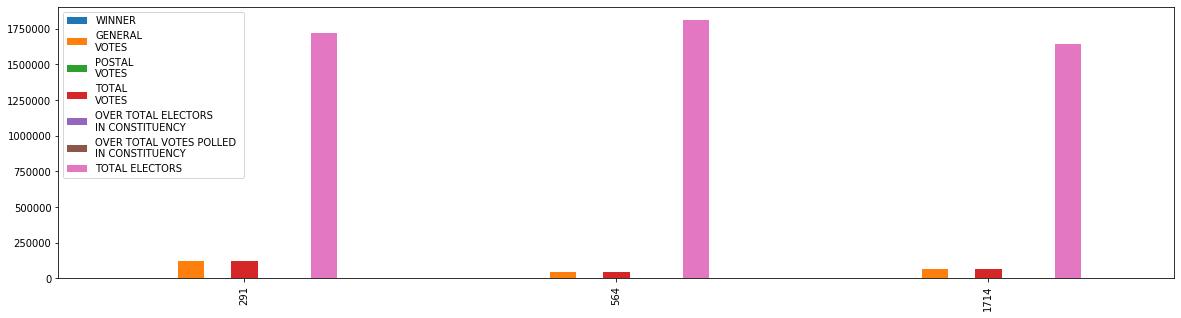

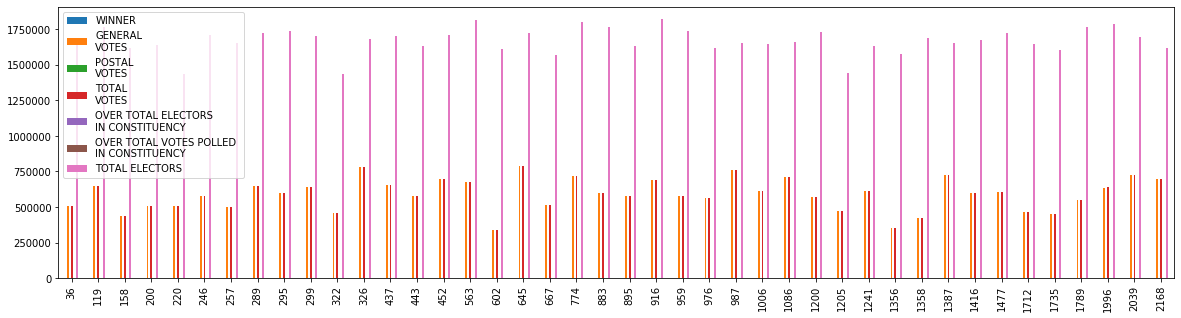

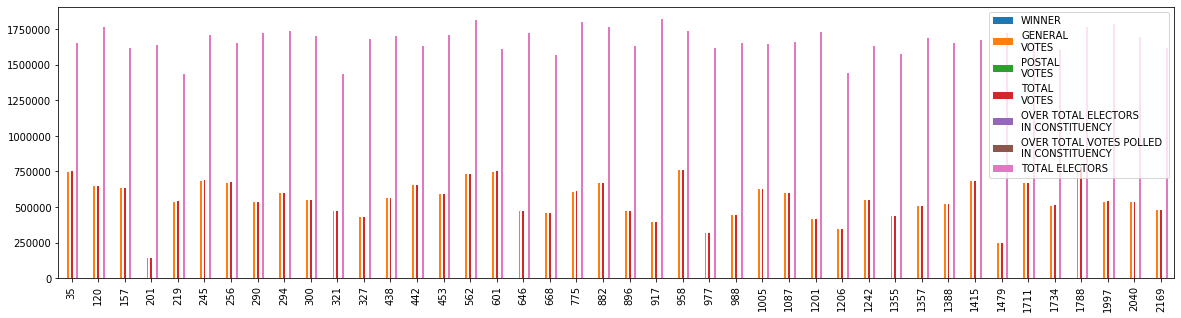

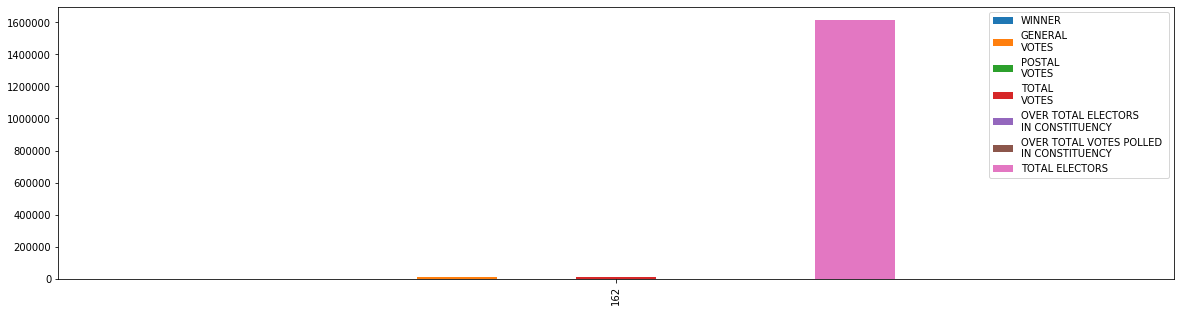

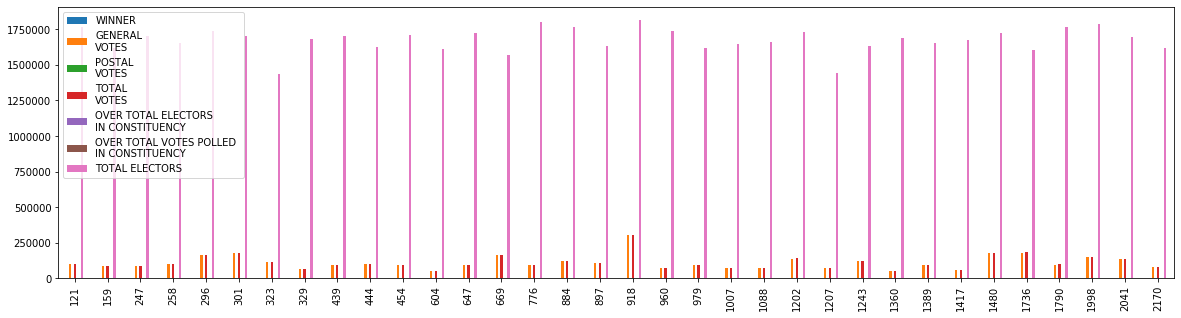

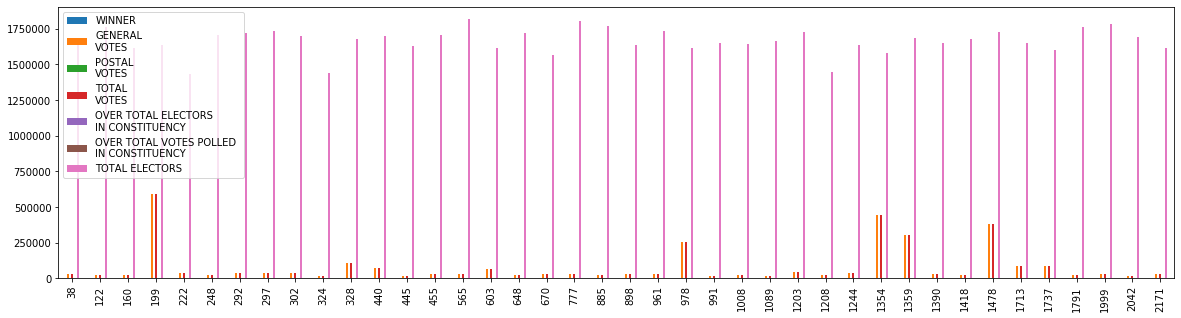

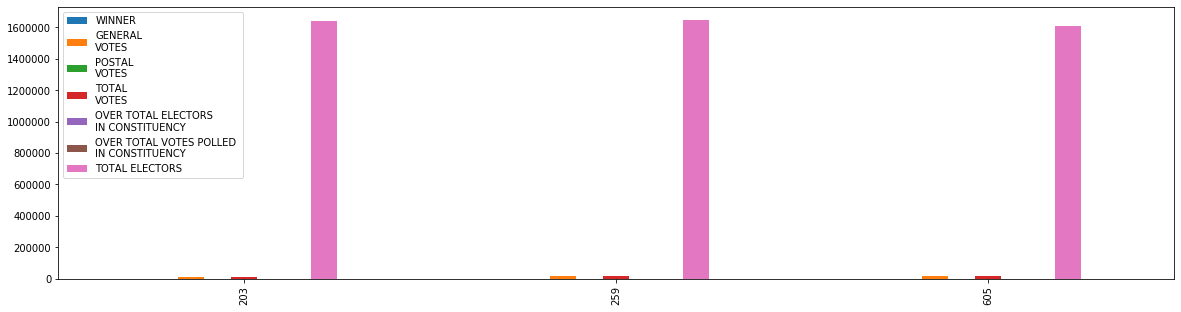

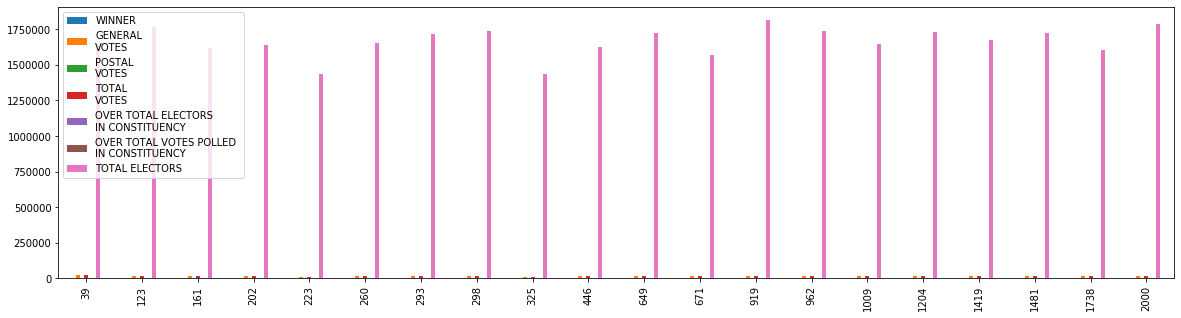

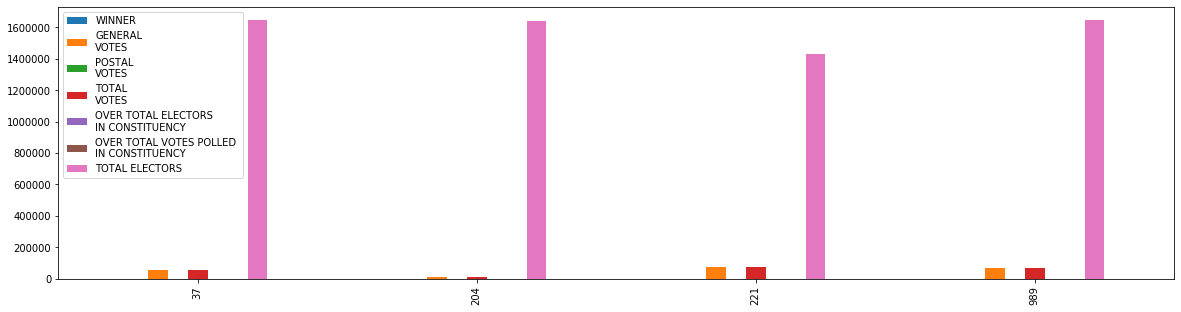

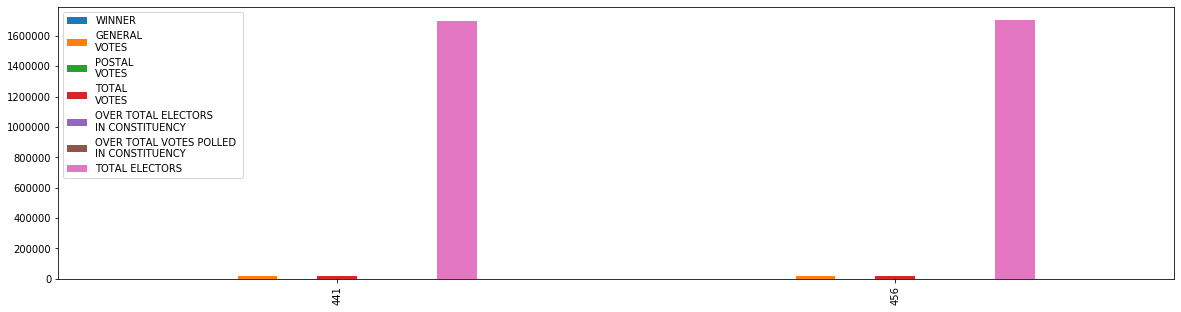

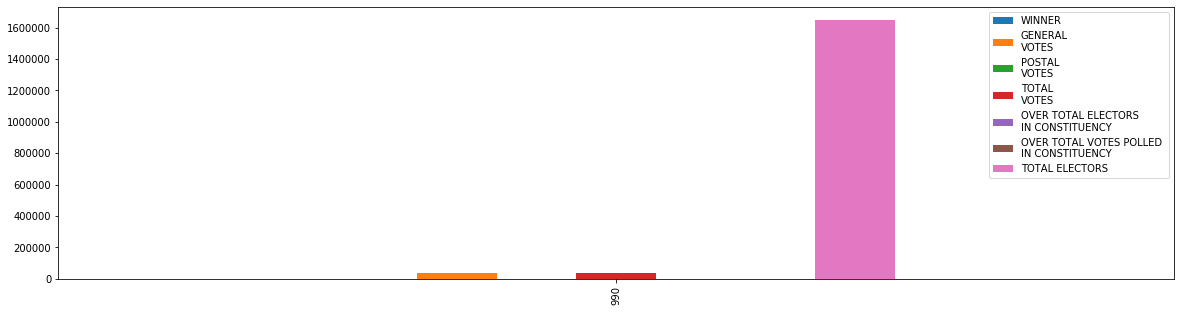

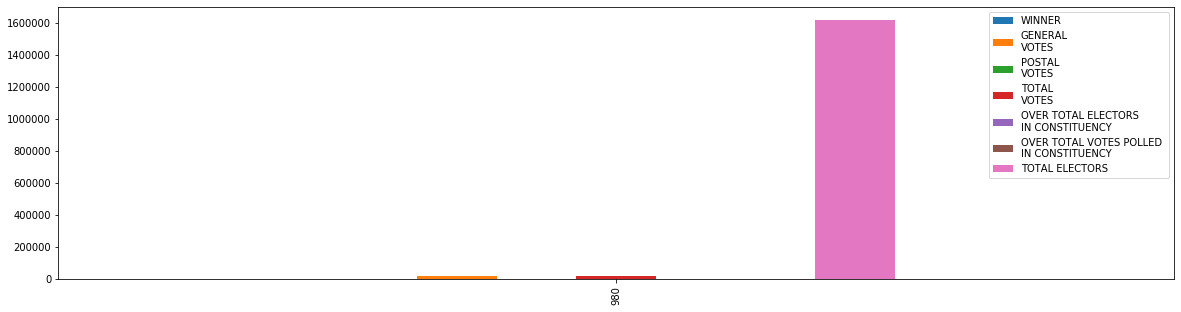

In [34]:
dff.plot(kind='bar', figsize=(20,5))